In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")

from local_plot import *
#plt.tight_layout(pad=1.0, w_pad=0.2, h_pad=1.0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rc("figure", figsize=(15,10))
bag = None

<Figure size 640x480 with 0 Axes>

In [2]:
nodes = [1, 4]
main_id = 4
P_align_pos_1 = np.array([-110.11, 113.44, -136.26]) # Position of putting right front gear on center
P_align_pos_4 = np.array([[-103.06, 113.44, -137.47]]) # Position of putting right front gear on center
P_align_corner = np.array([98.92,-117.94,-71]) + np.array([10, 10, 0]) - np.array([60, 0, 0])

P_vicon_in_imu ={
    1: (P_align_pos_1+P_align_corner)/1000,
    4: ( P_align_pos_4+P_align_corner)/1000
}  

if bag is not None:
    bag.close()
poses, poses_fused, poses_vo, poses_path, t0, bag = bag_read(f"/home/d/random_fly/outputs/fuse_all/swarm{main_id}/swarm_local_pc.bag", nodes, True,main_id=main_id)

Init. at 1.458745002746582. Avg. len. 42.2m


In [3]:
plt.close('all')
# detections = []
# loops = []
detections = [] #read_detections_6d(bag, t0, "/swarm_drones/node_detected_6d")
loops = [] #read_loops(bag, t0, "/swarm_loop/loop_connection")
#plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes, use_offline=False, figsize=(10,10), id_map={1:1, 4:2})
plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes ,show=False,main_id=main_id, outlier_thres=10)
plot_relative_pose_err(poses, poses_fused, poses_vo, 1, [4], figsize=(15, 10), outlier_thres=10, show=False)
#plt.show()

Absolute Trajectory Statistics
EST:	ATE P	Ang	Yaw	Pitch	Roll		RMSE			COV/m		POS			YAW			KF:	ATE P	Ang	|	VO:ATE_P	Ang	Yaw	Pitch	Roll			ATE			COV/m	POS		YAW	
1by4	0.110	2.732°	0.631°	1.003°	2.470°	0.086,0.044,0.053	7.5e-04,2.1e-03,1.1e-03	1.3e-04rad/m		0.132	2.557°	|	0.147	2.697°	0.736°	0.831°	2.465°	0.106,0.054,0.088	7.3e-04,6.2e-04,3.9e-04	5.5e-05rad
Ego4	0.093	2.054°	0.804°	1.157°	1.492°	0.078,0.044,0.027	6.5e-04,7.9e-04,2.2e-04	2.0e-04rad/m		0.109	2.210°	|	0.105	2.080°	0.773°	1.185°	1.523°	0.093,0.044,0.022	8.2e-04,3.8e-04,2.6e-04	7.5e-05rad
Avg	0.102	0.402°																				|	0.126		0.386°
Relative Trajectory Statistics
EST RMSE:		POS		YAW	|	BIAS: POS			YAW	|VO	RMSE:	POS		YAW
1->4	0.041,0.049,0.051	0.78°	|0.017,-0.017,+0.033	-0.19°	|	0.062,0.075,0.105	0.6°


(0.08156749424116258,
 0.013686119041804567,
 0.14290184811923046,
 0.010746548944752325)

Outlier rate 0.00% total loops 44 inter_loops 0 outlier_num 0
Pos cov 8.6e-03, 2.2e-02, 3.2e-03
Yaw cov 6.9e-04
Pos std 9.3e-02, 1.5e-01, 5.6e-02
Yaw std 2.6e-02


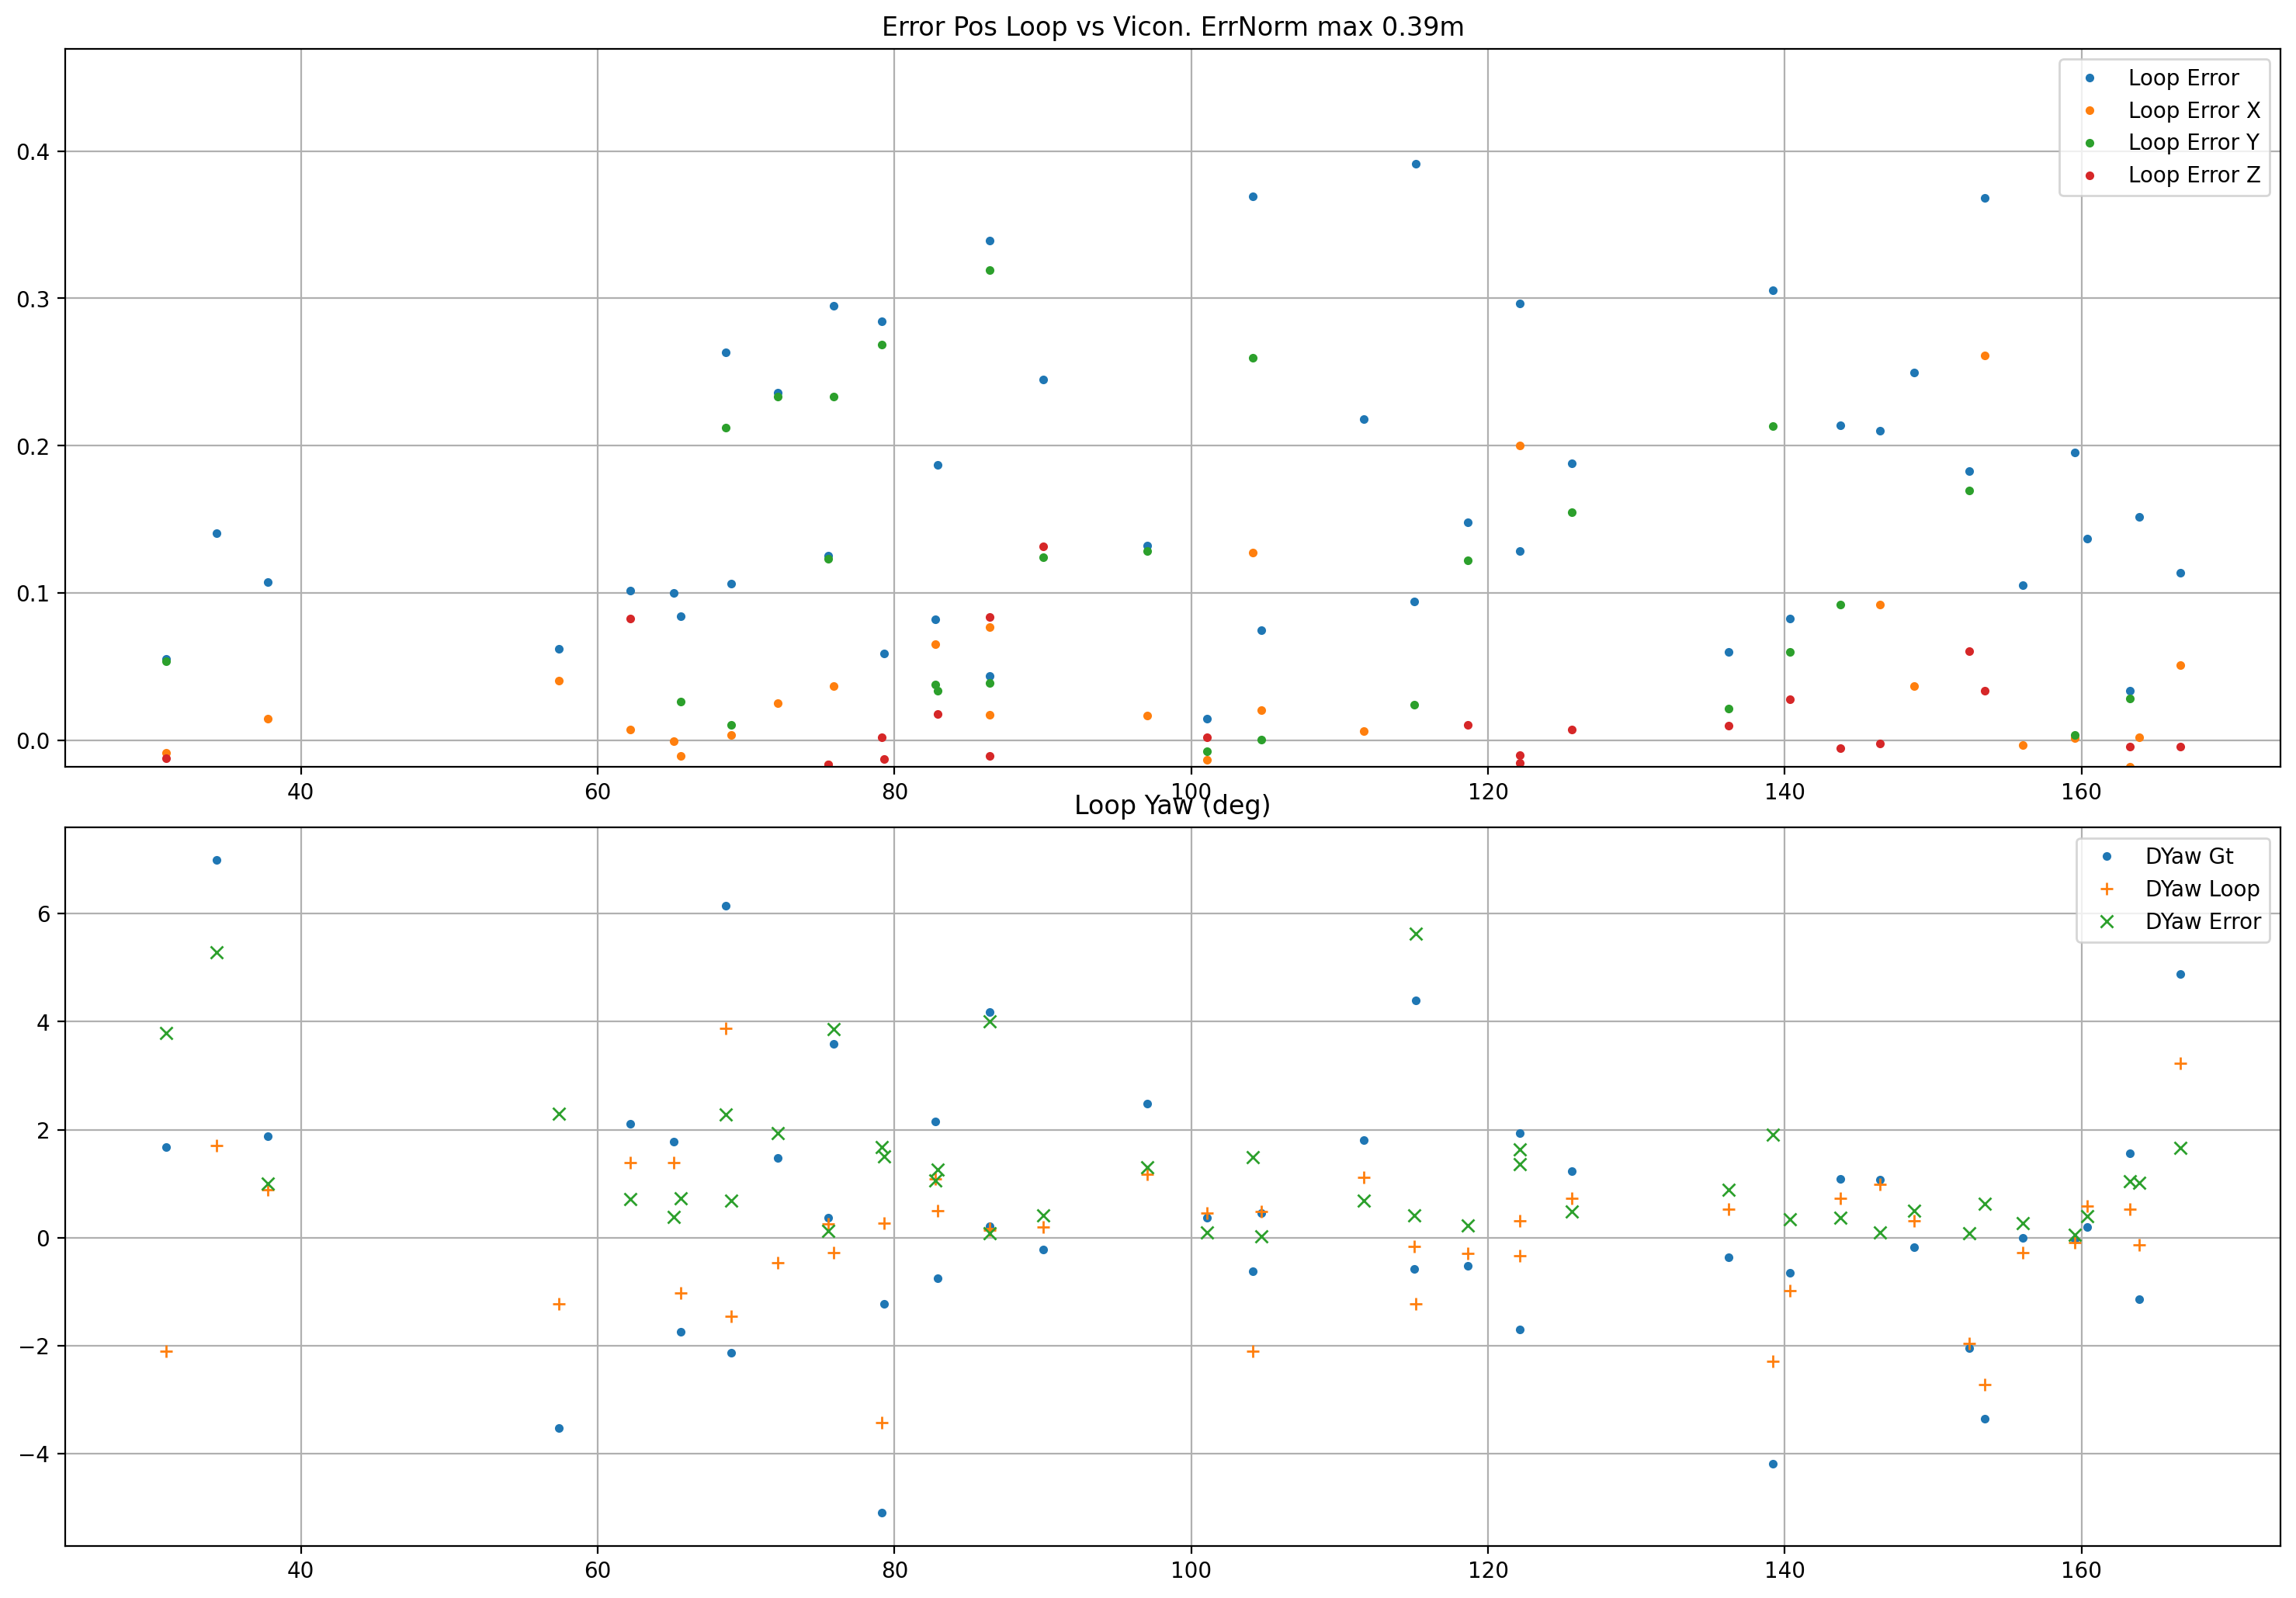

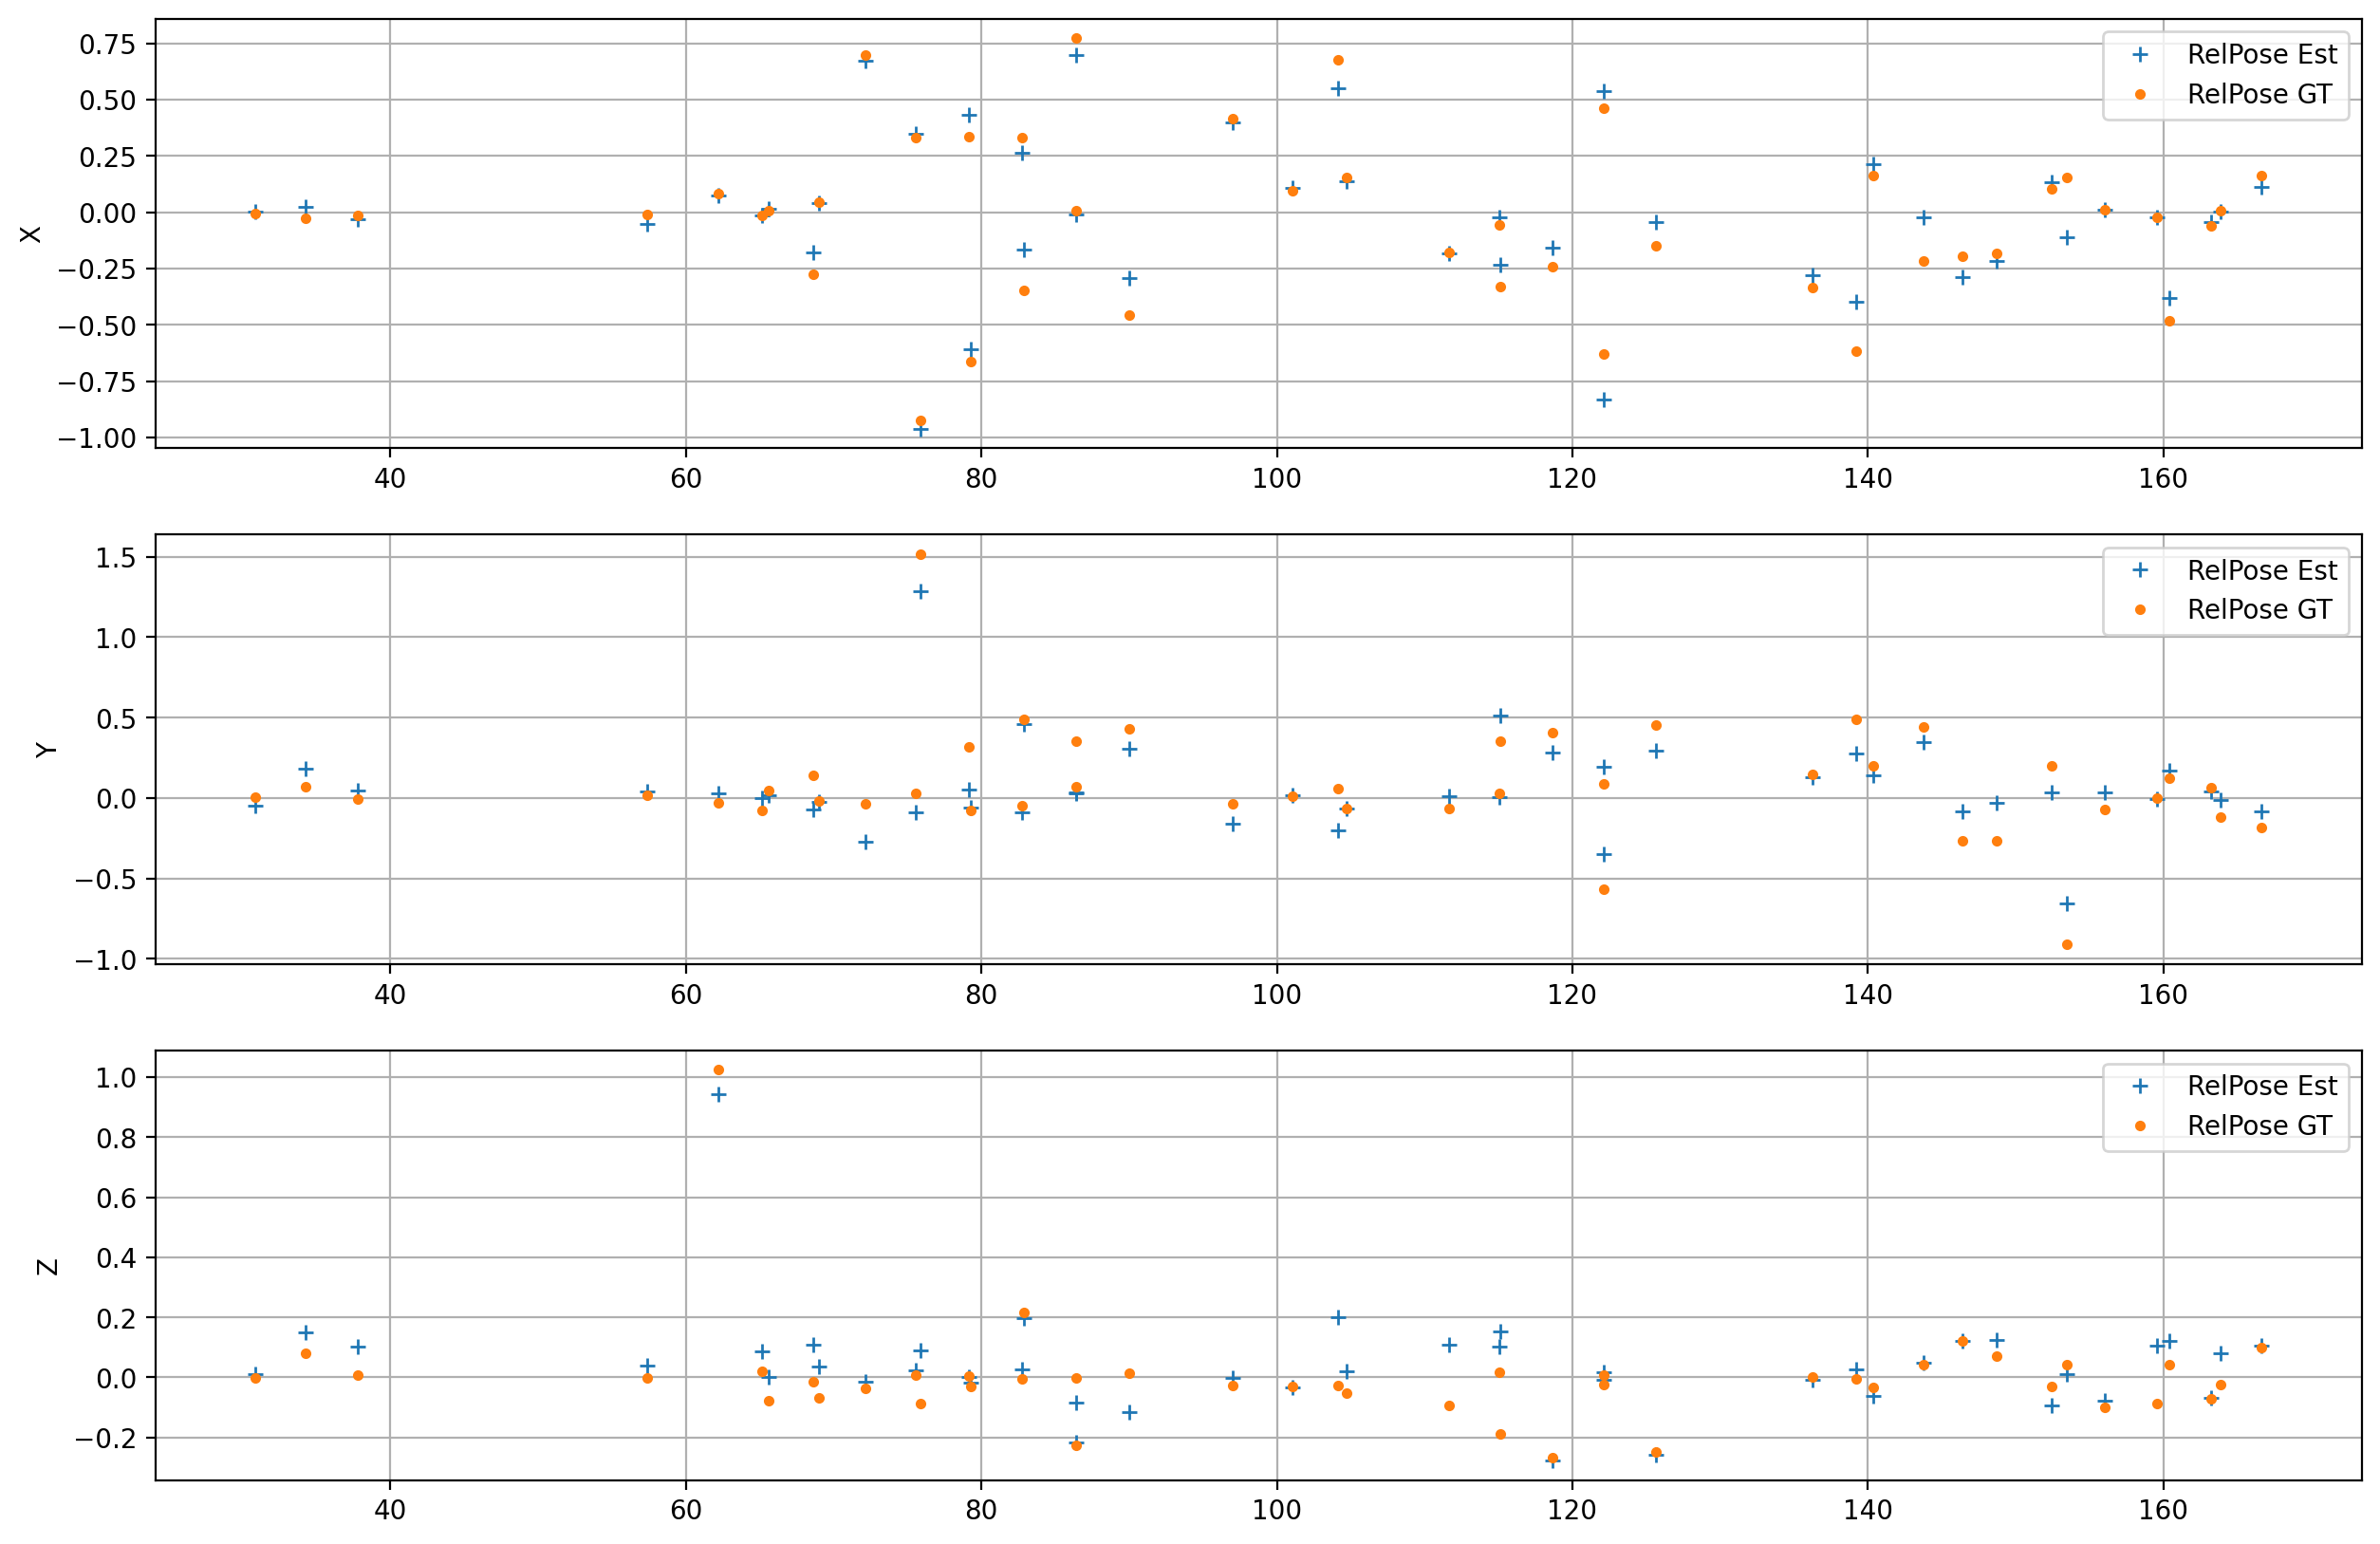

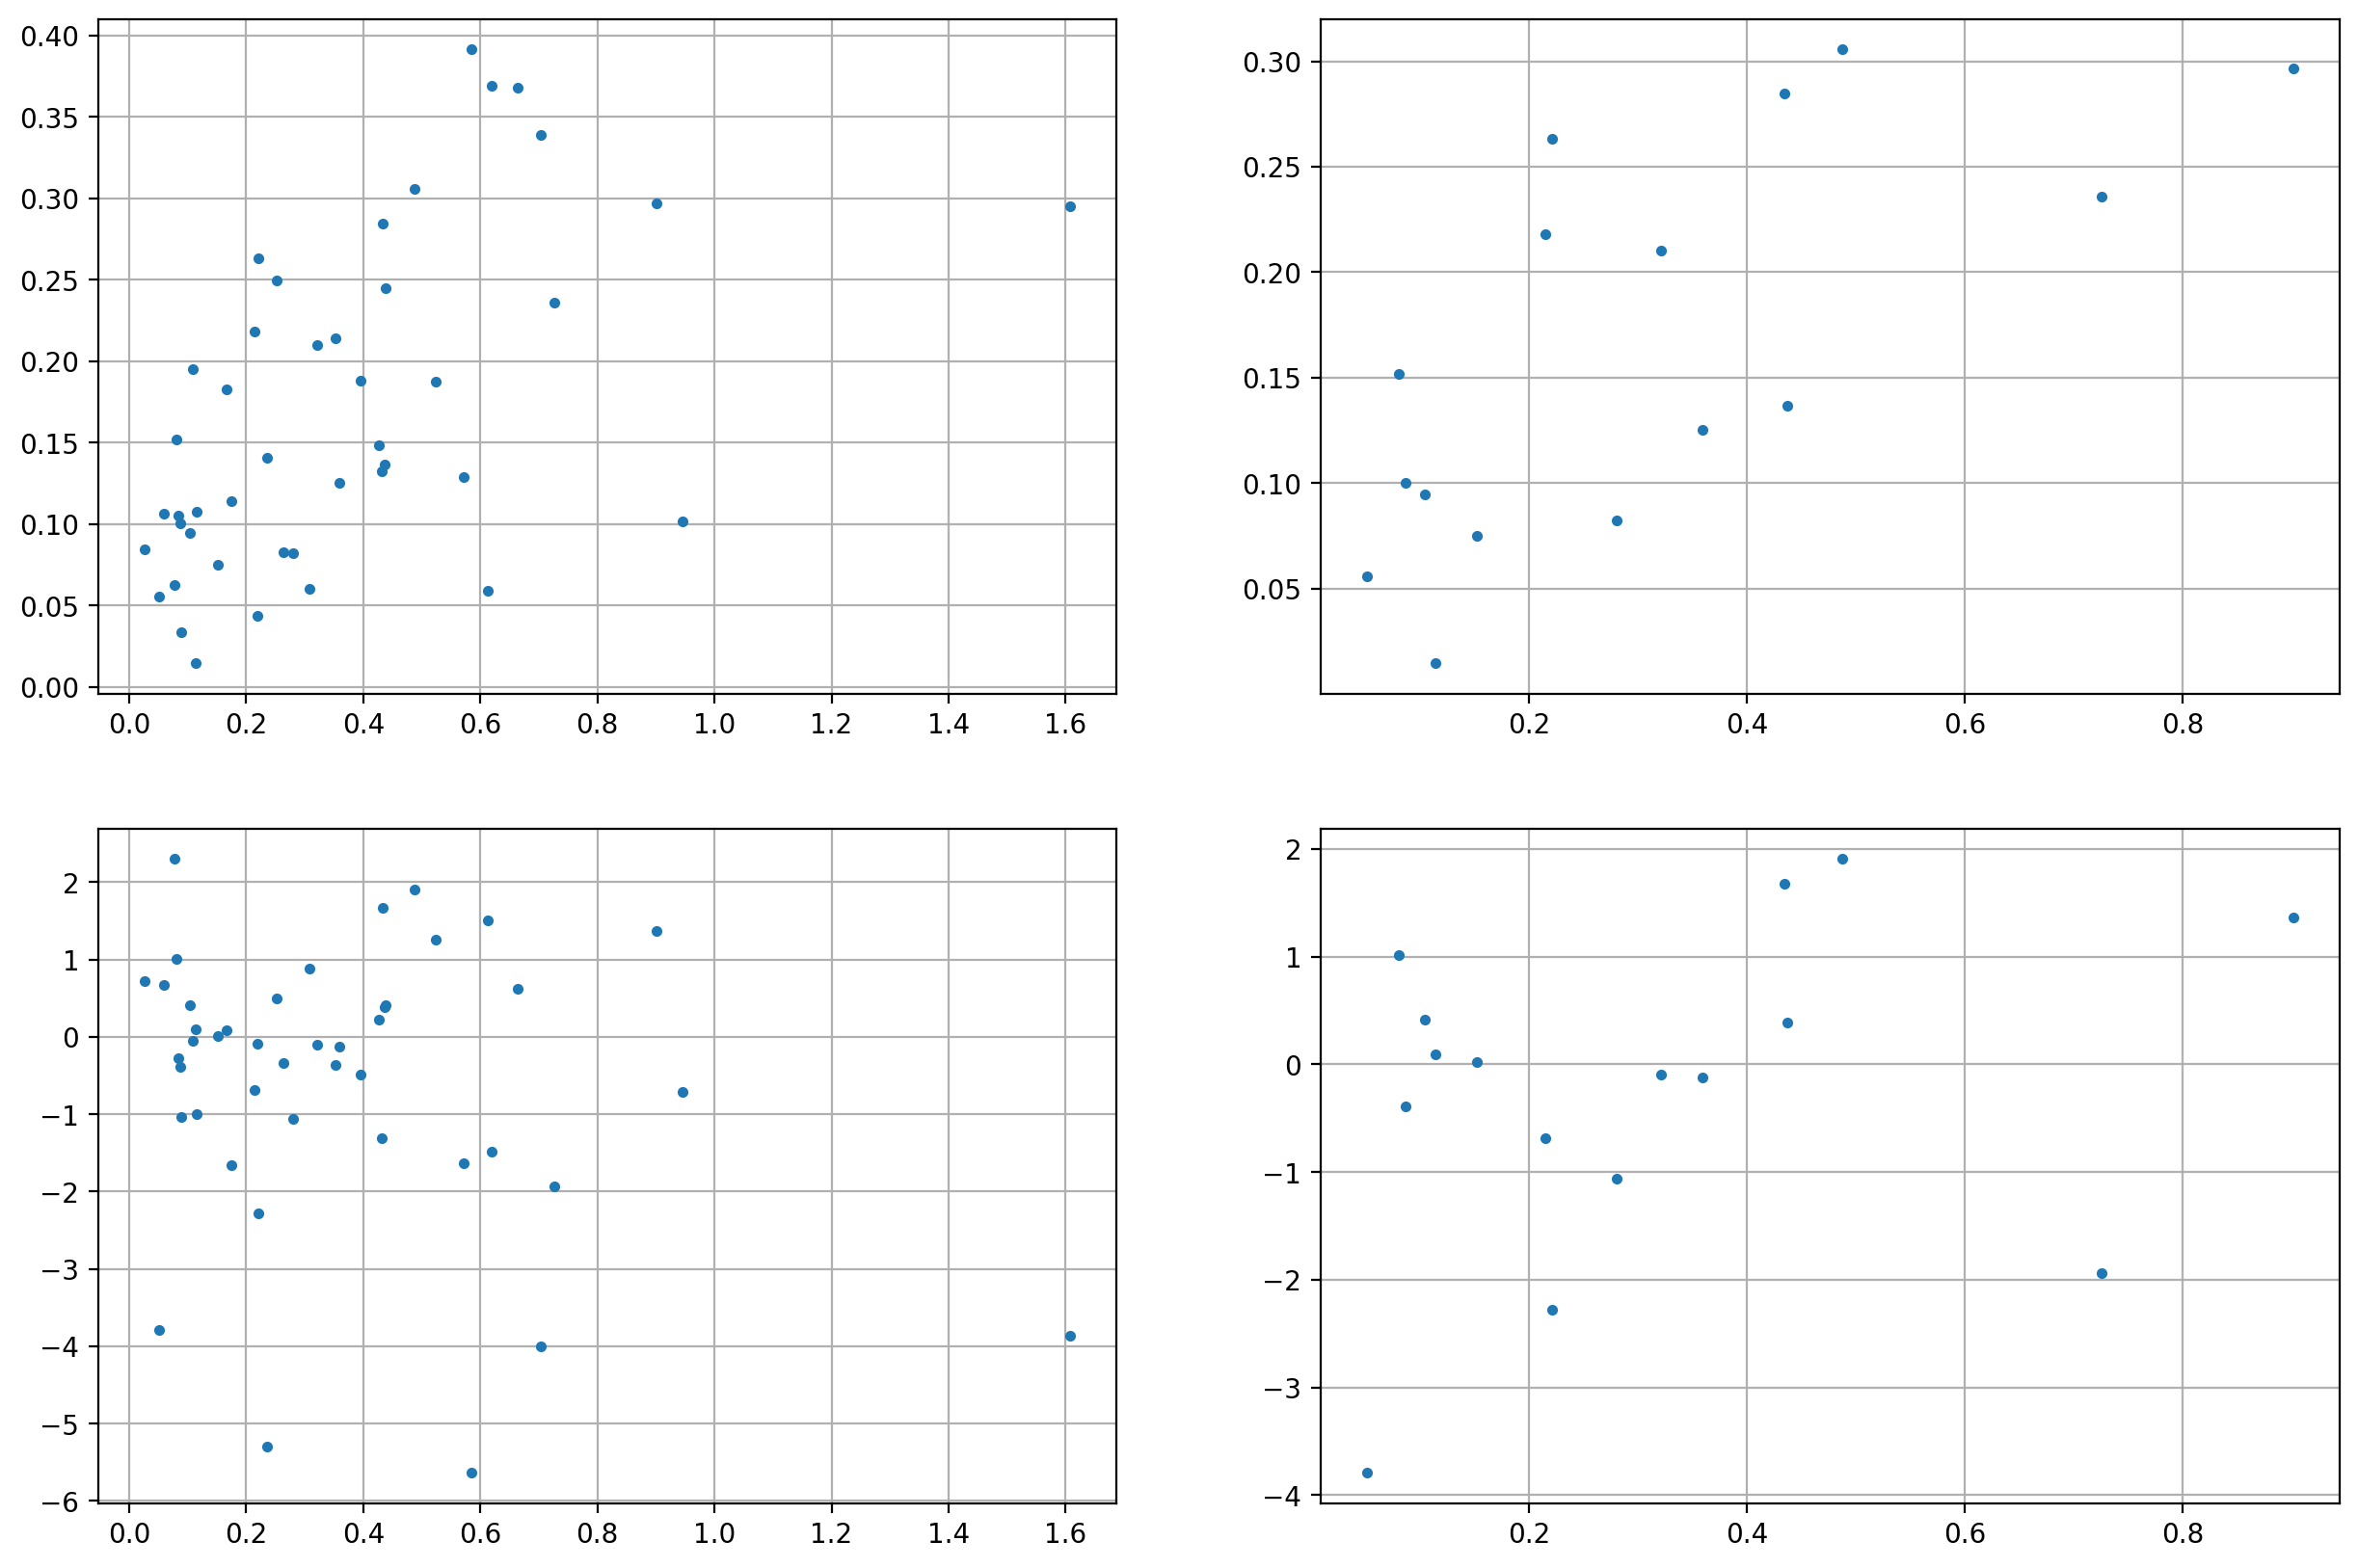

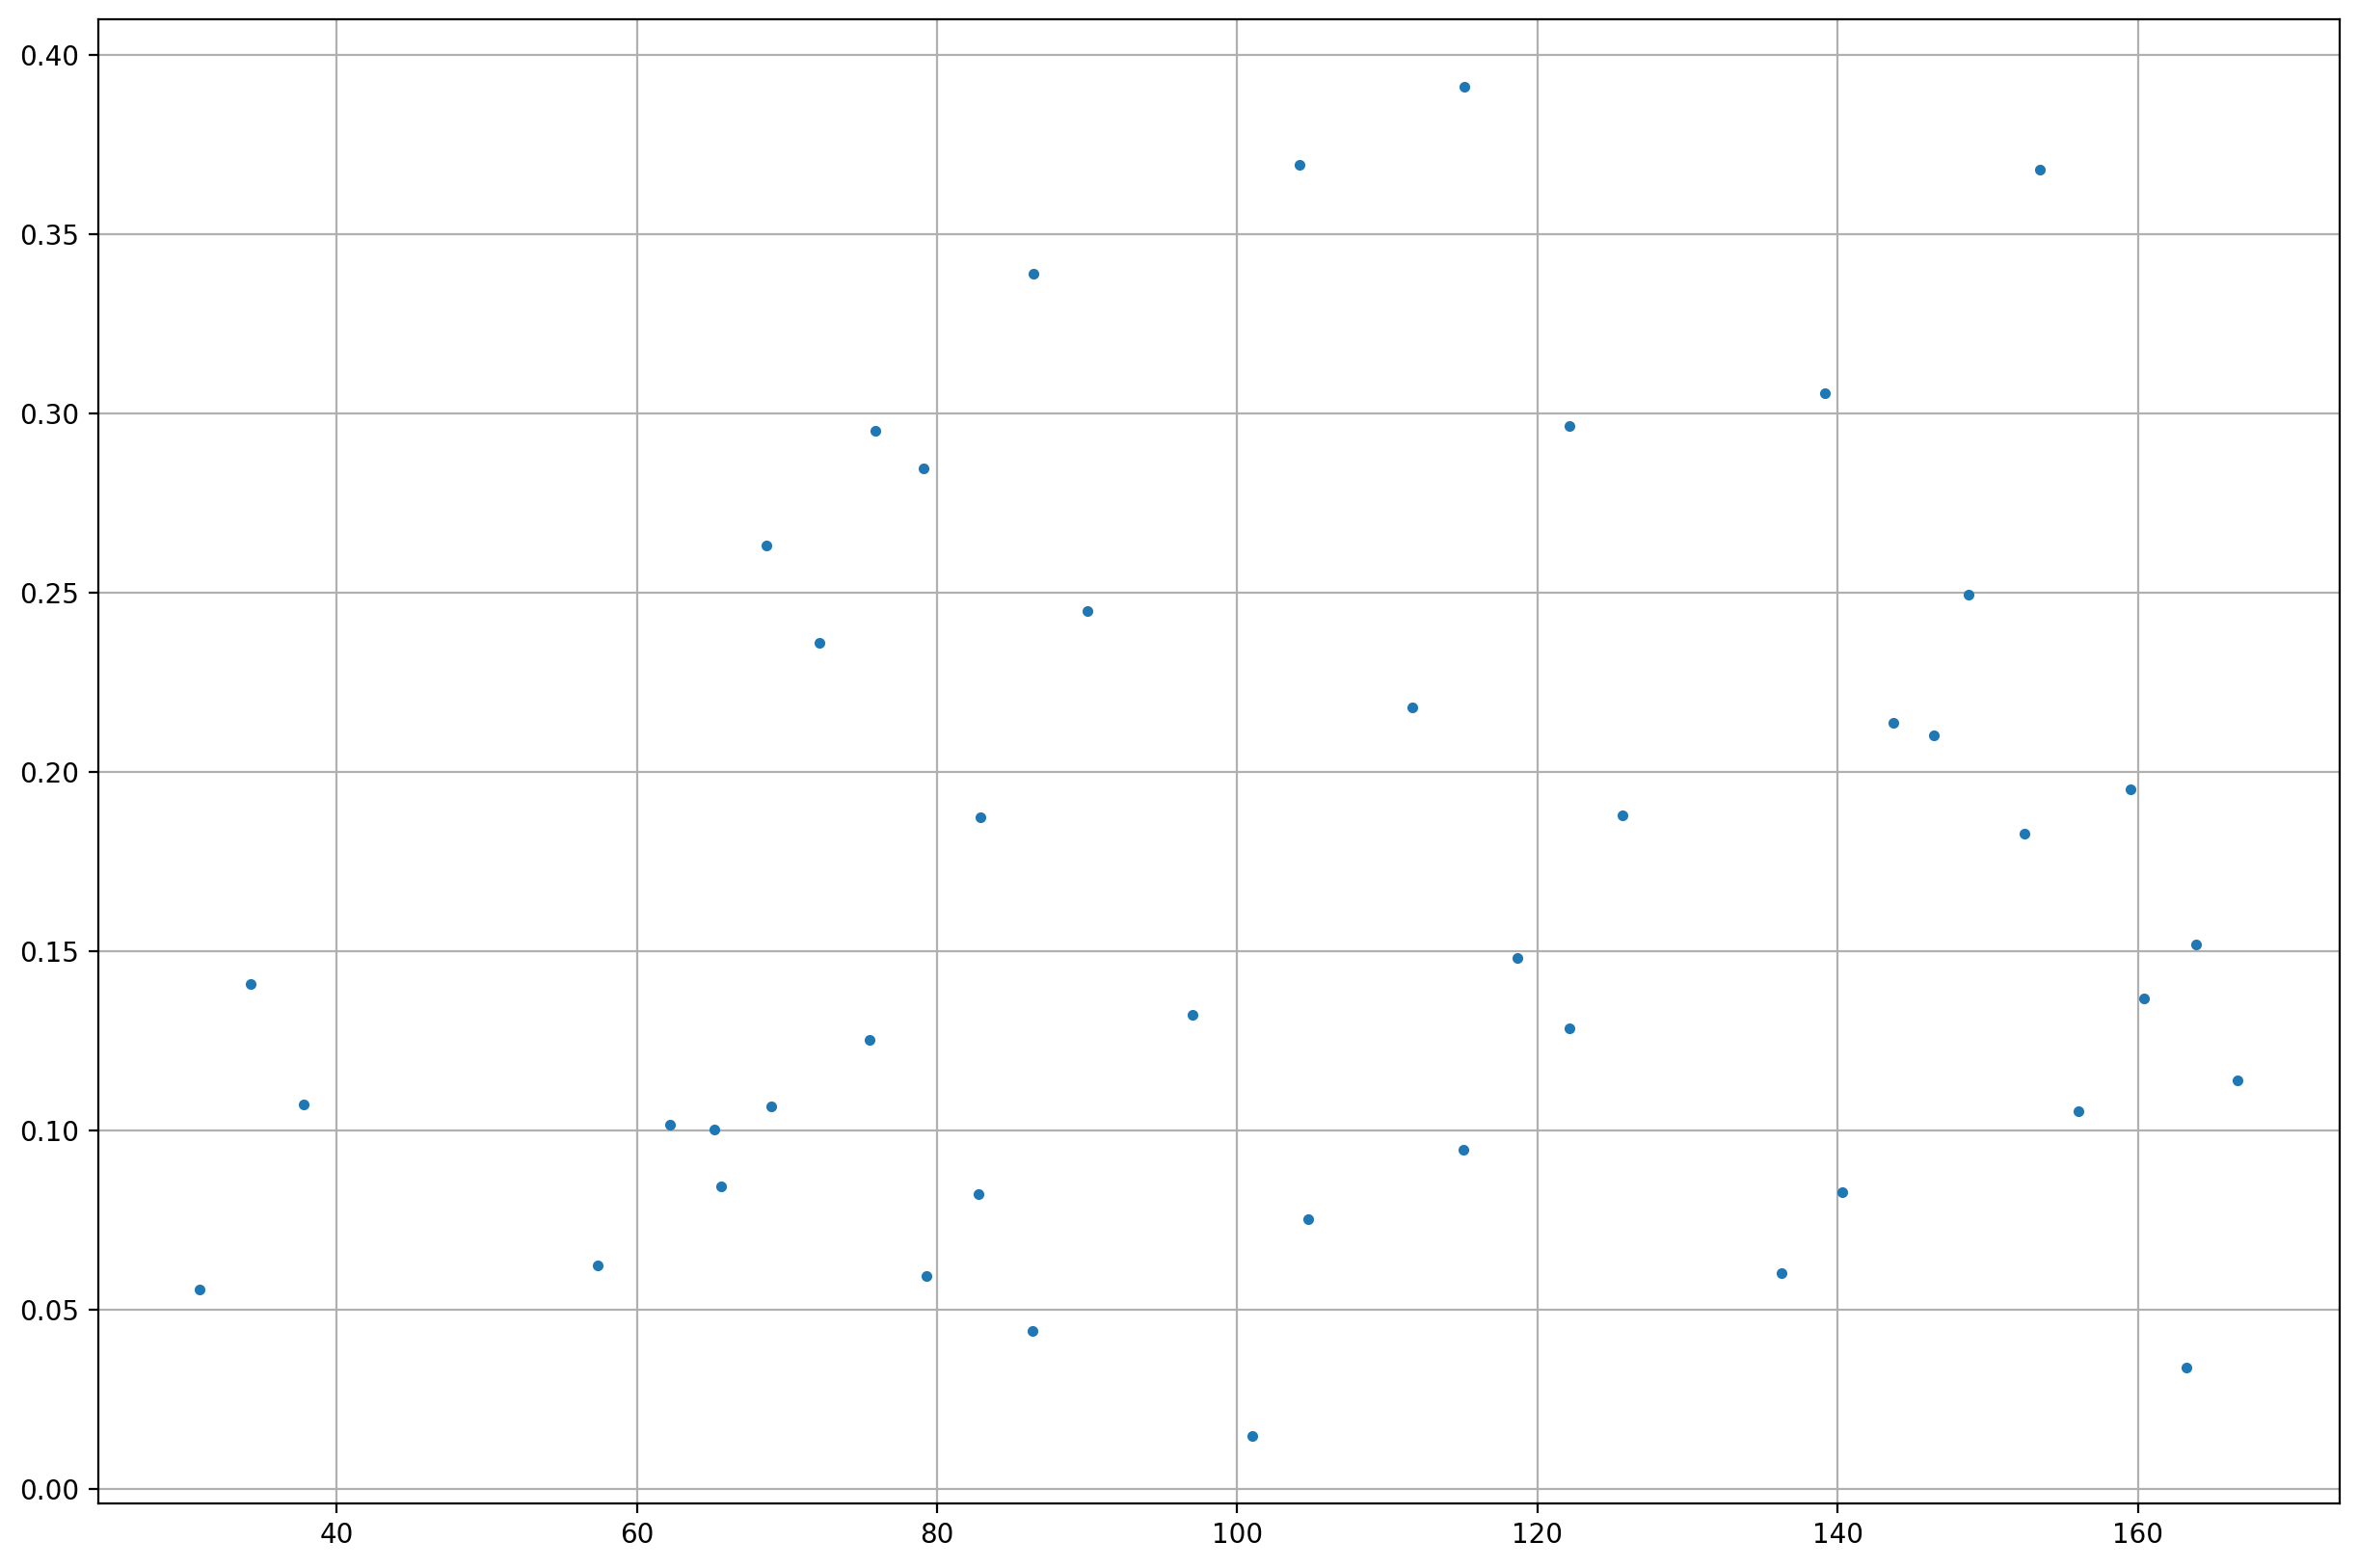

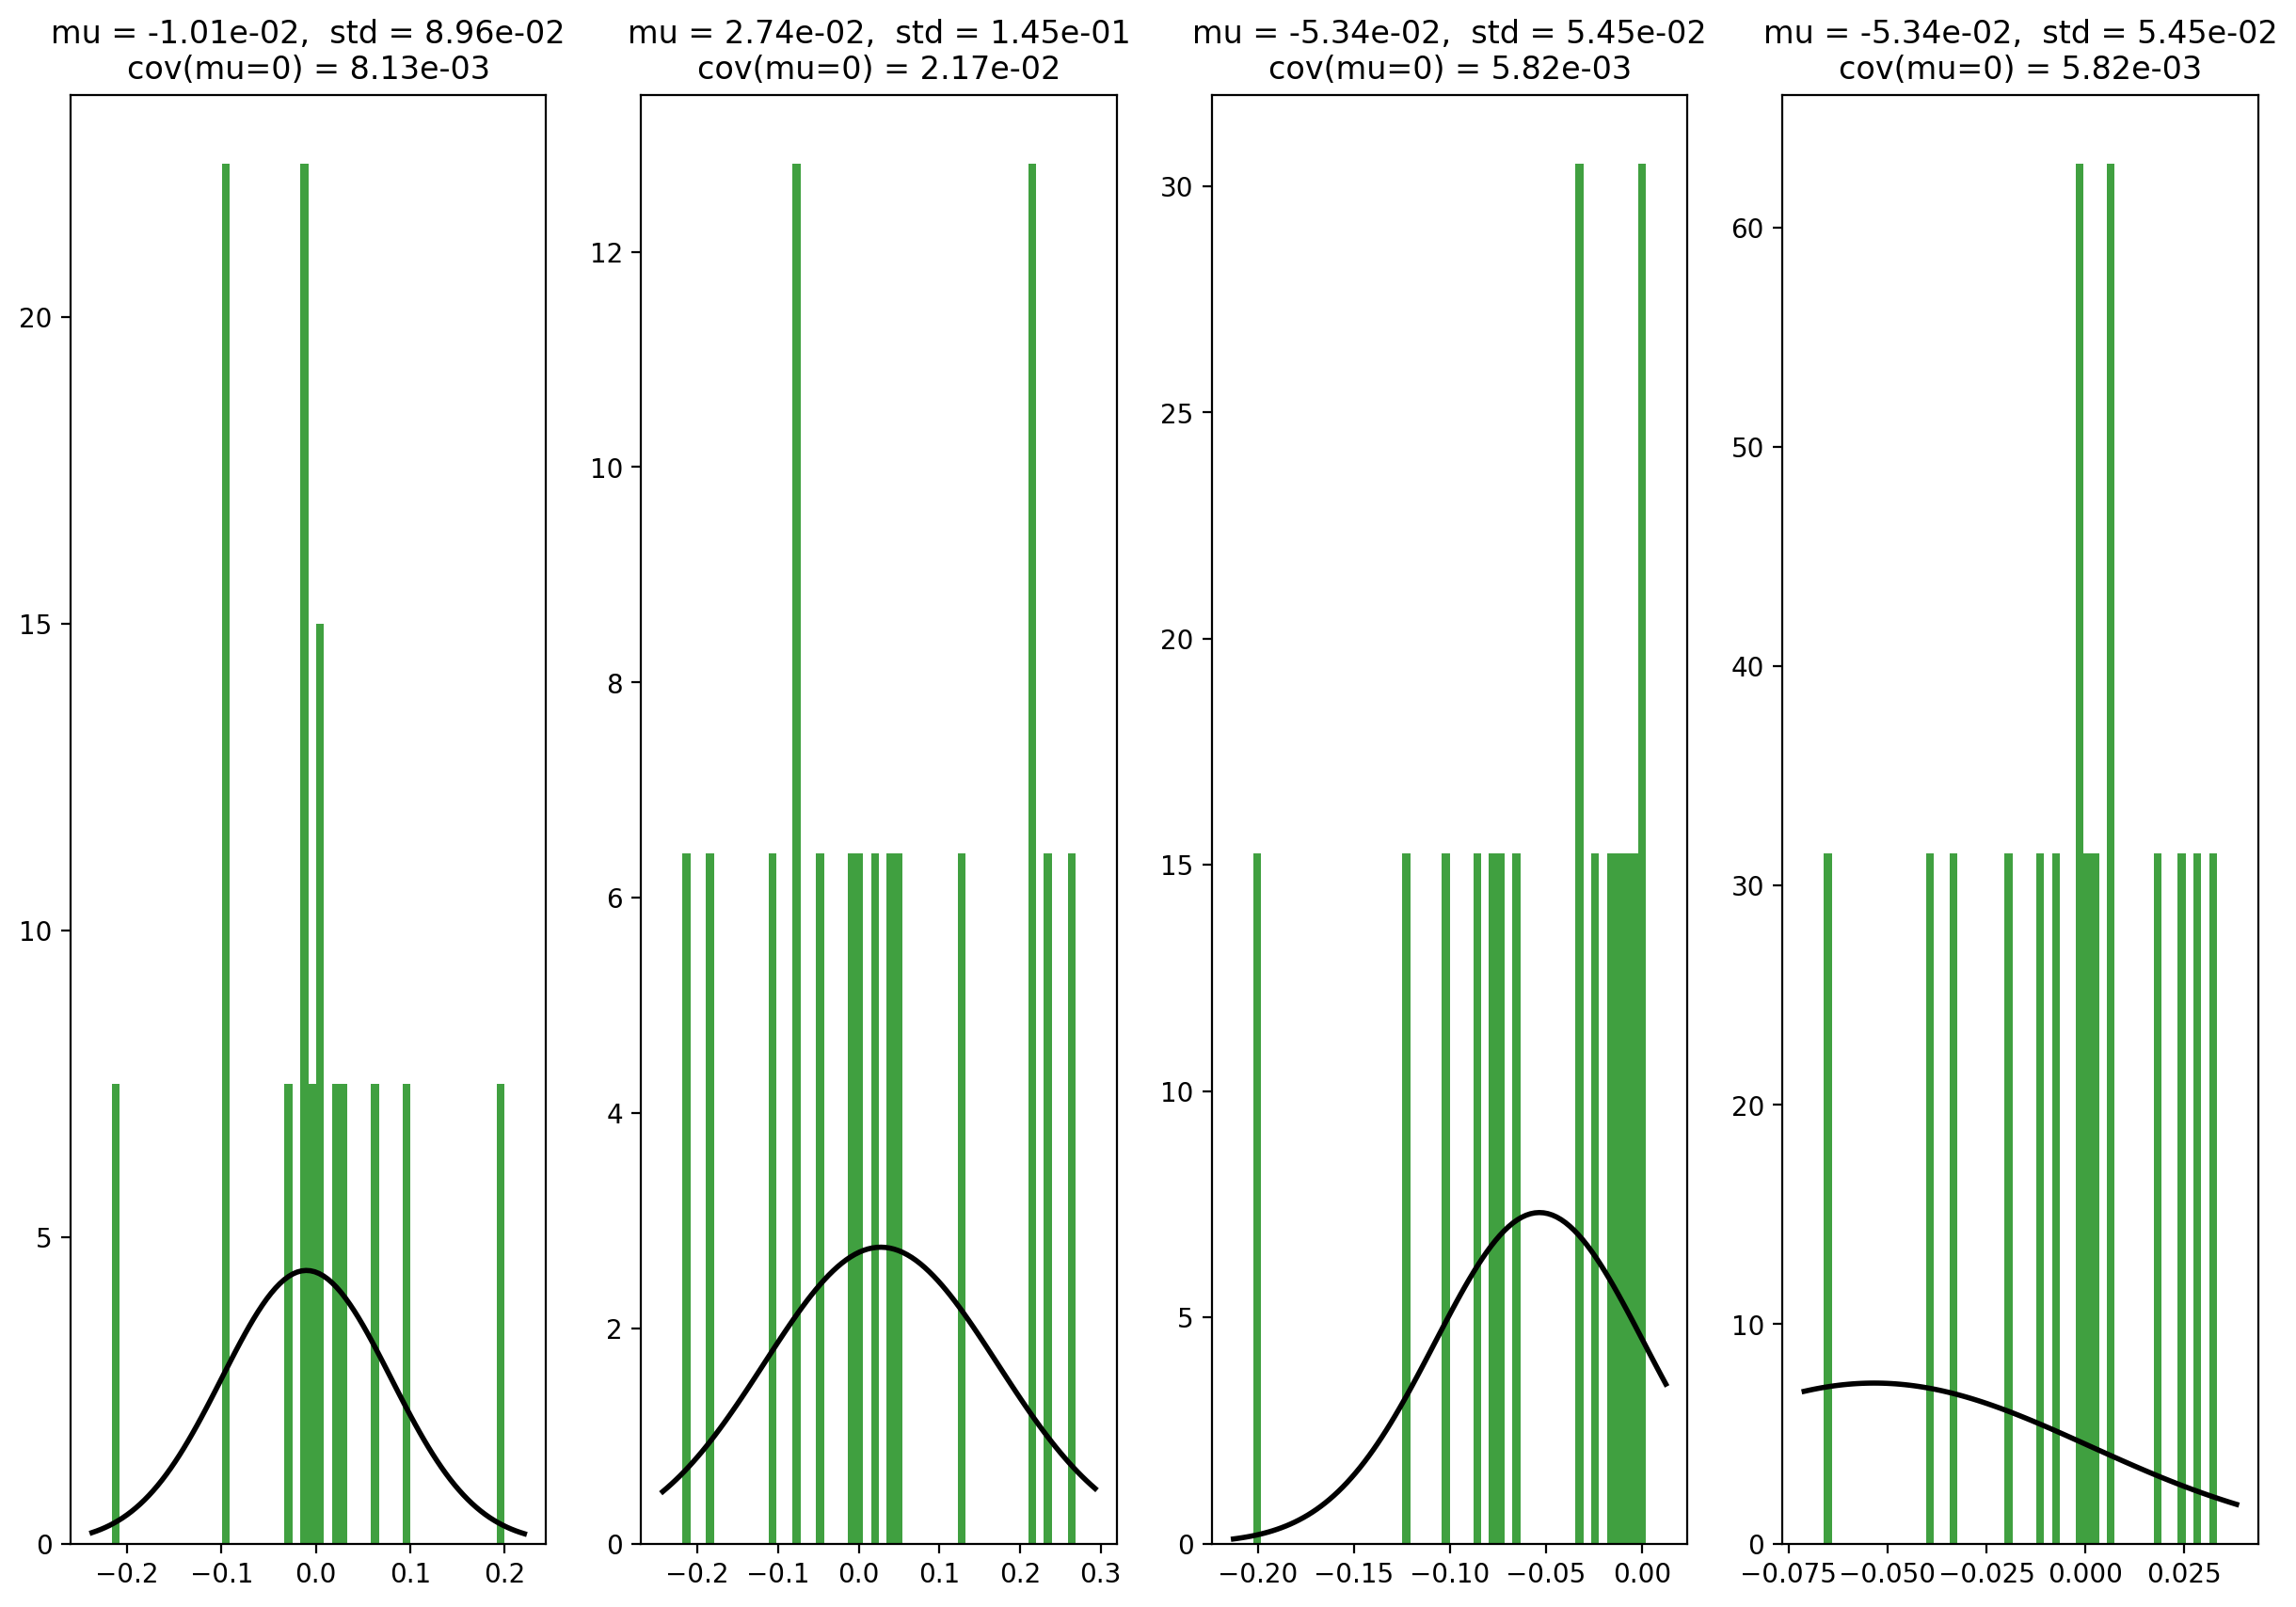

In [4]:
plt.close("all")
inliers = read_loop_inliers(bag, "/swarm_drones/loop_inliers")
loops = read_loops(bag, t0, "/swarm_loop/loop_connection")
loops_error = plot_loops_error(poses, loops, good_loop_id=inliers[-1], outlier_show_thres=0.4)
#_= debugging_pcm("/home/xuhao/bags/swarm_raw_parallel2_2021-10-18_17-09/outputs/fuse_all/swarm1/", inliers[-1], loops_error, 1.635)

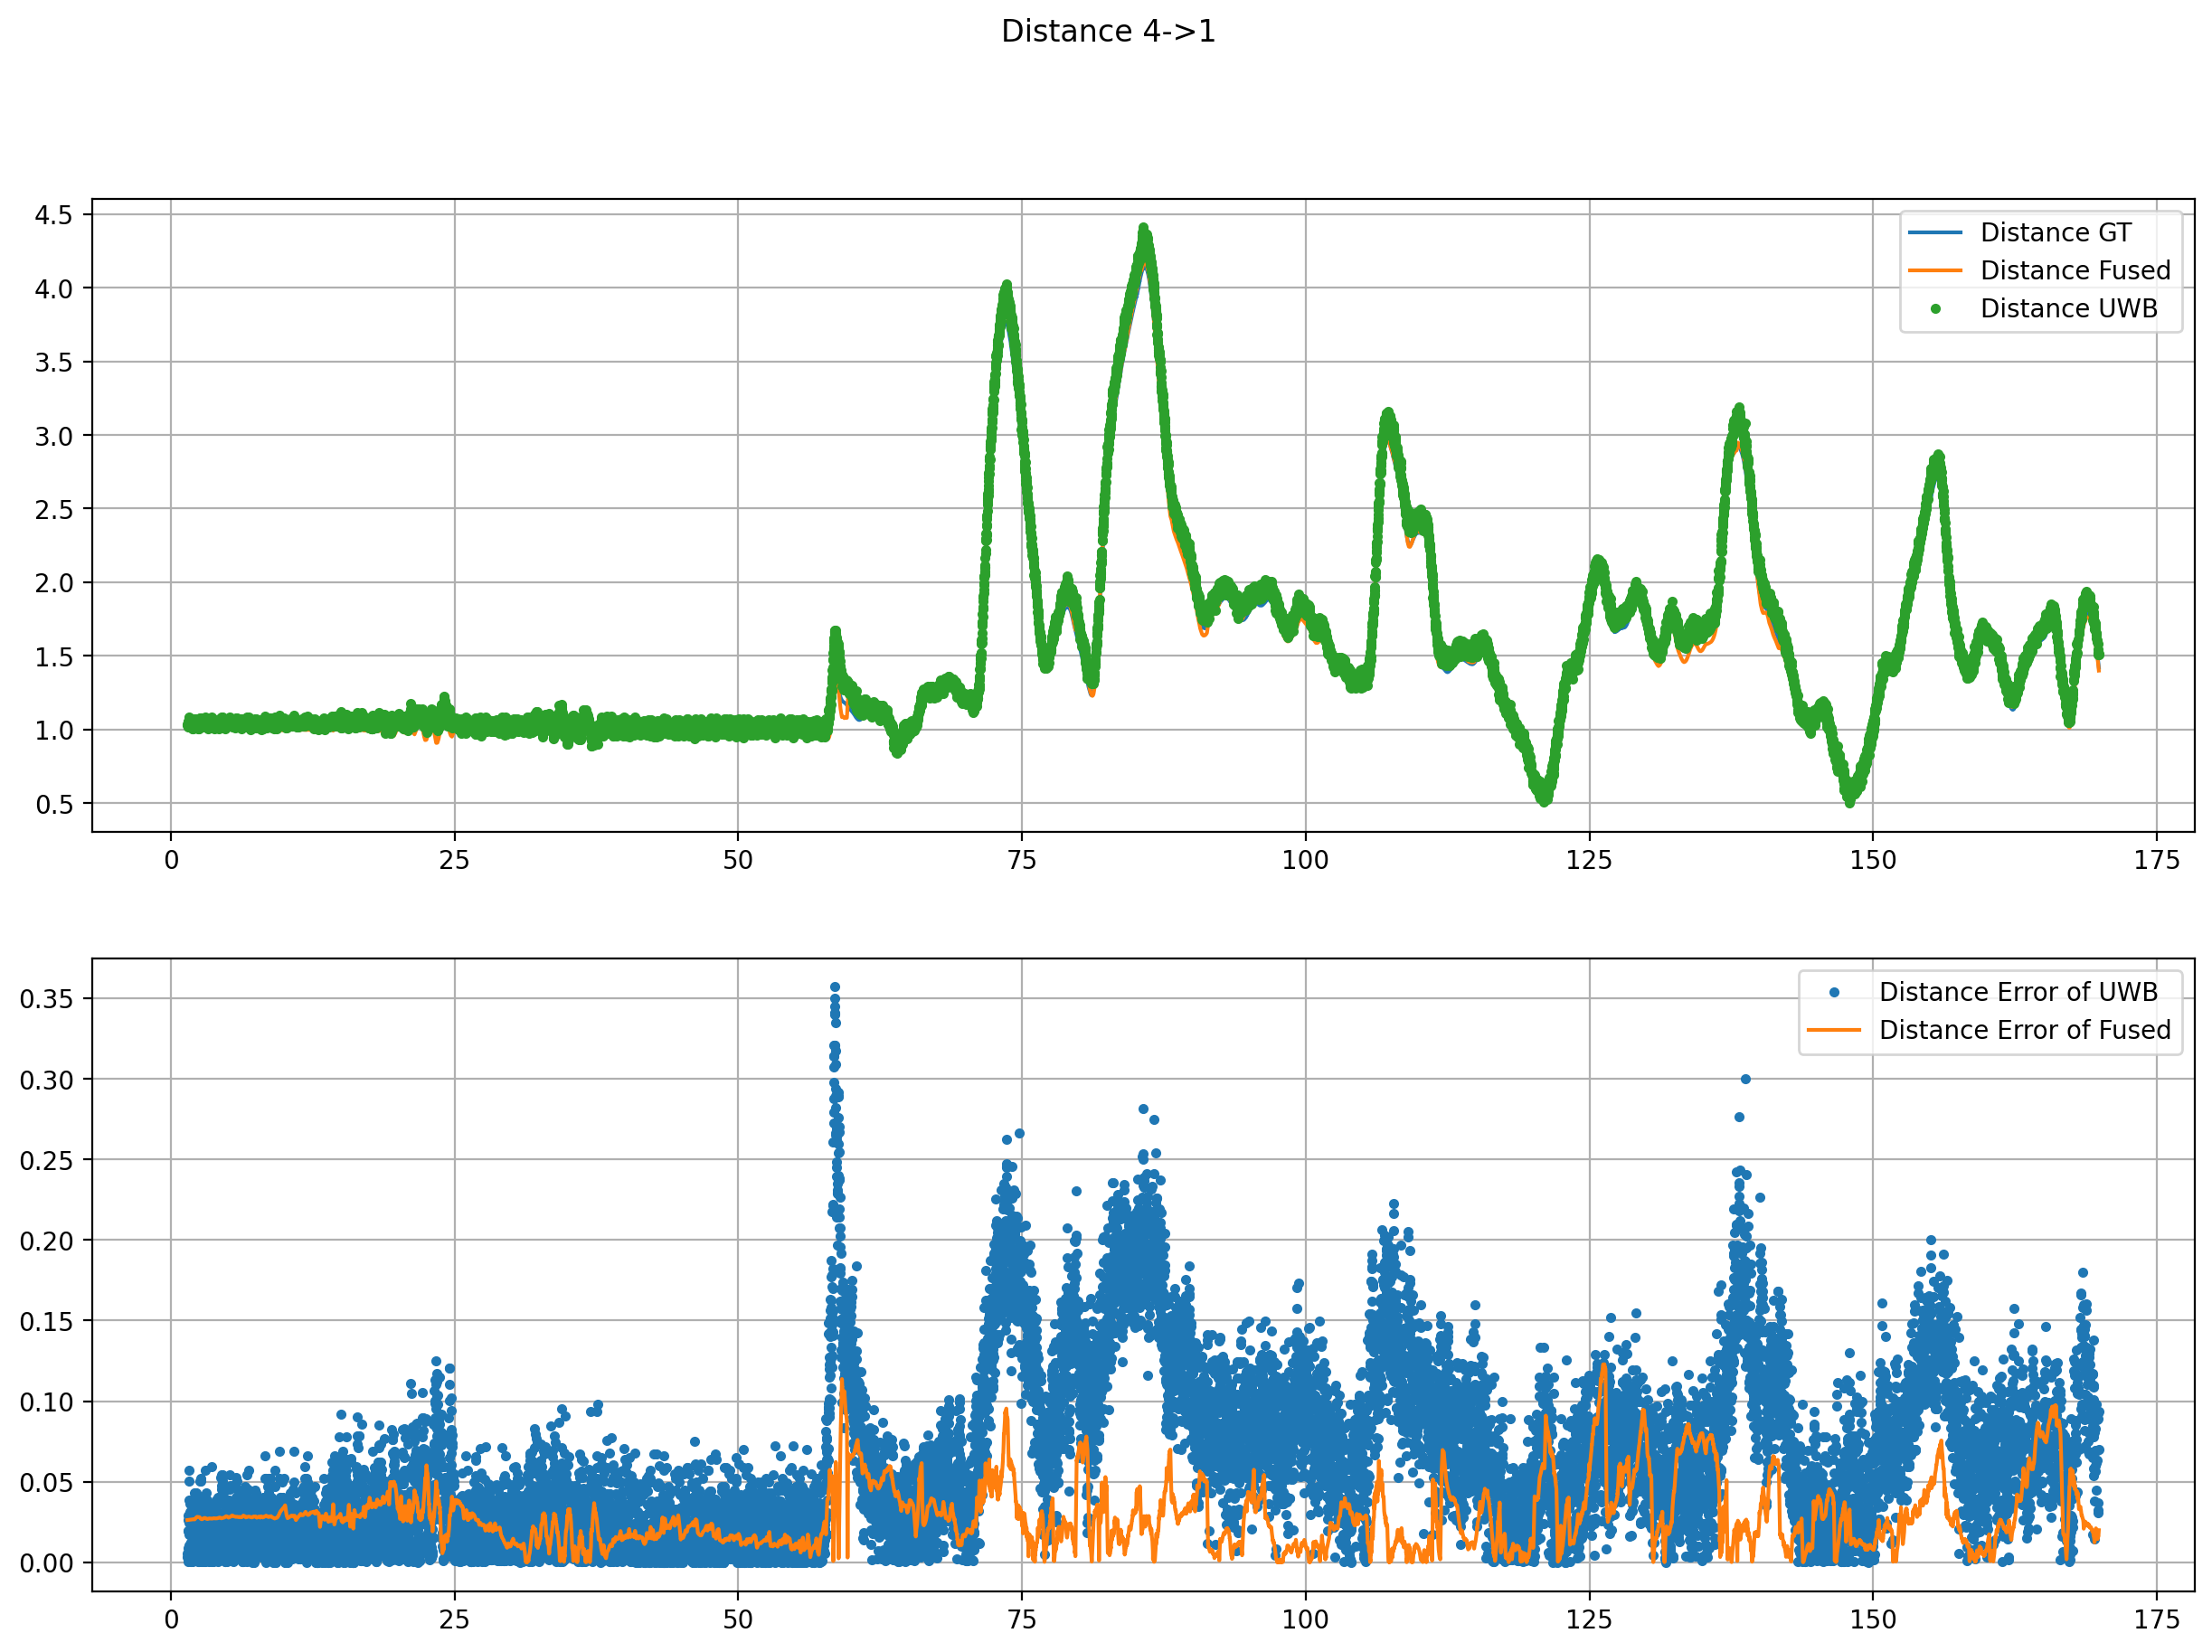

Distance 4->1 RMSE 0.08330713459709442
Fit 0.9308387609249599, 0.04860053770411069
Cov Fitted 0.001218486395763873
Cov Raw 0.0036305988421591567


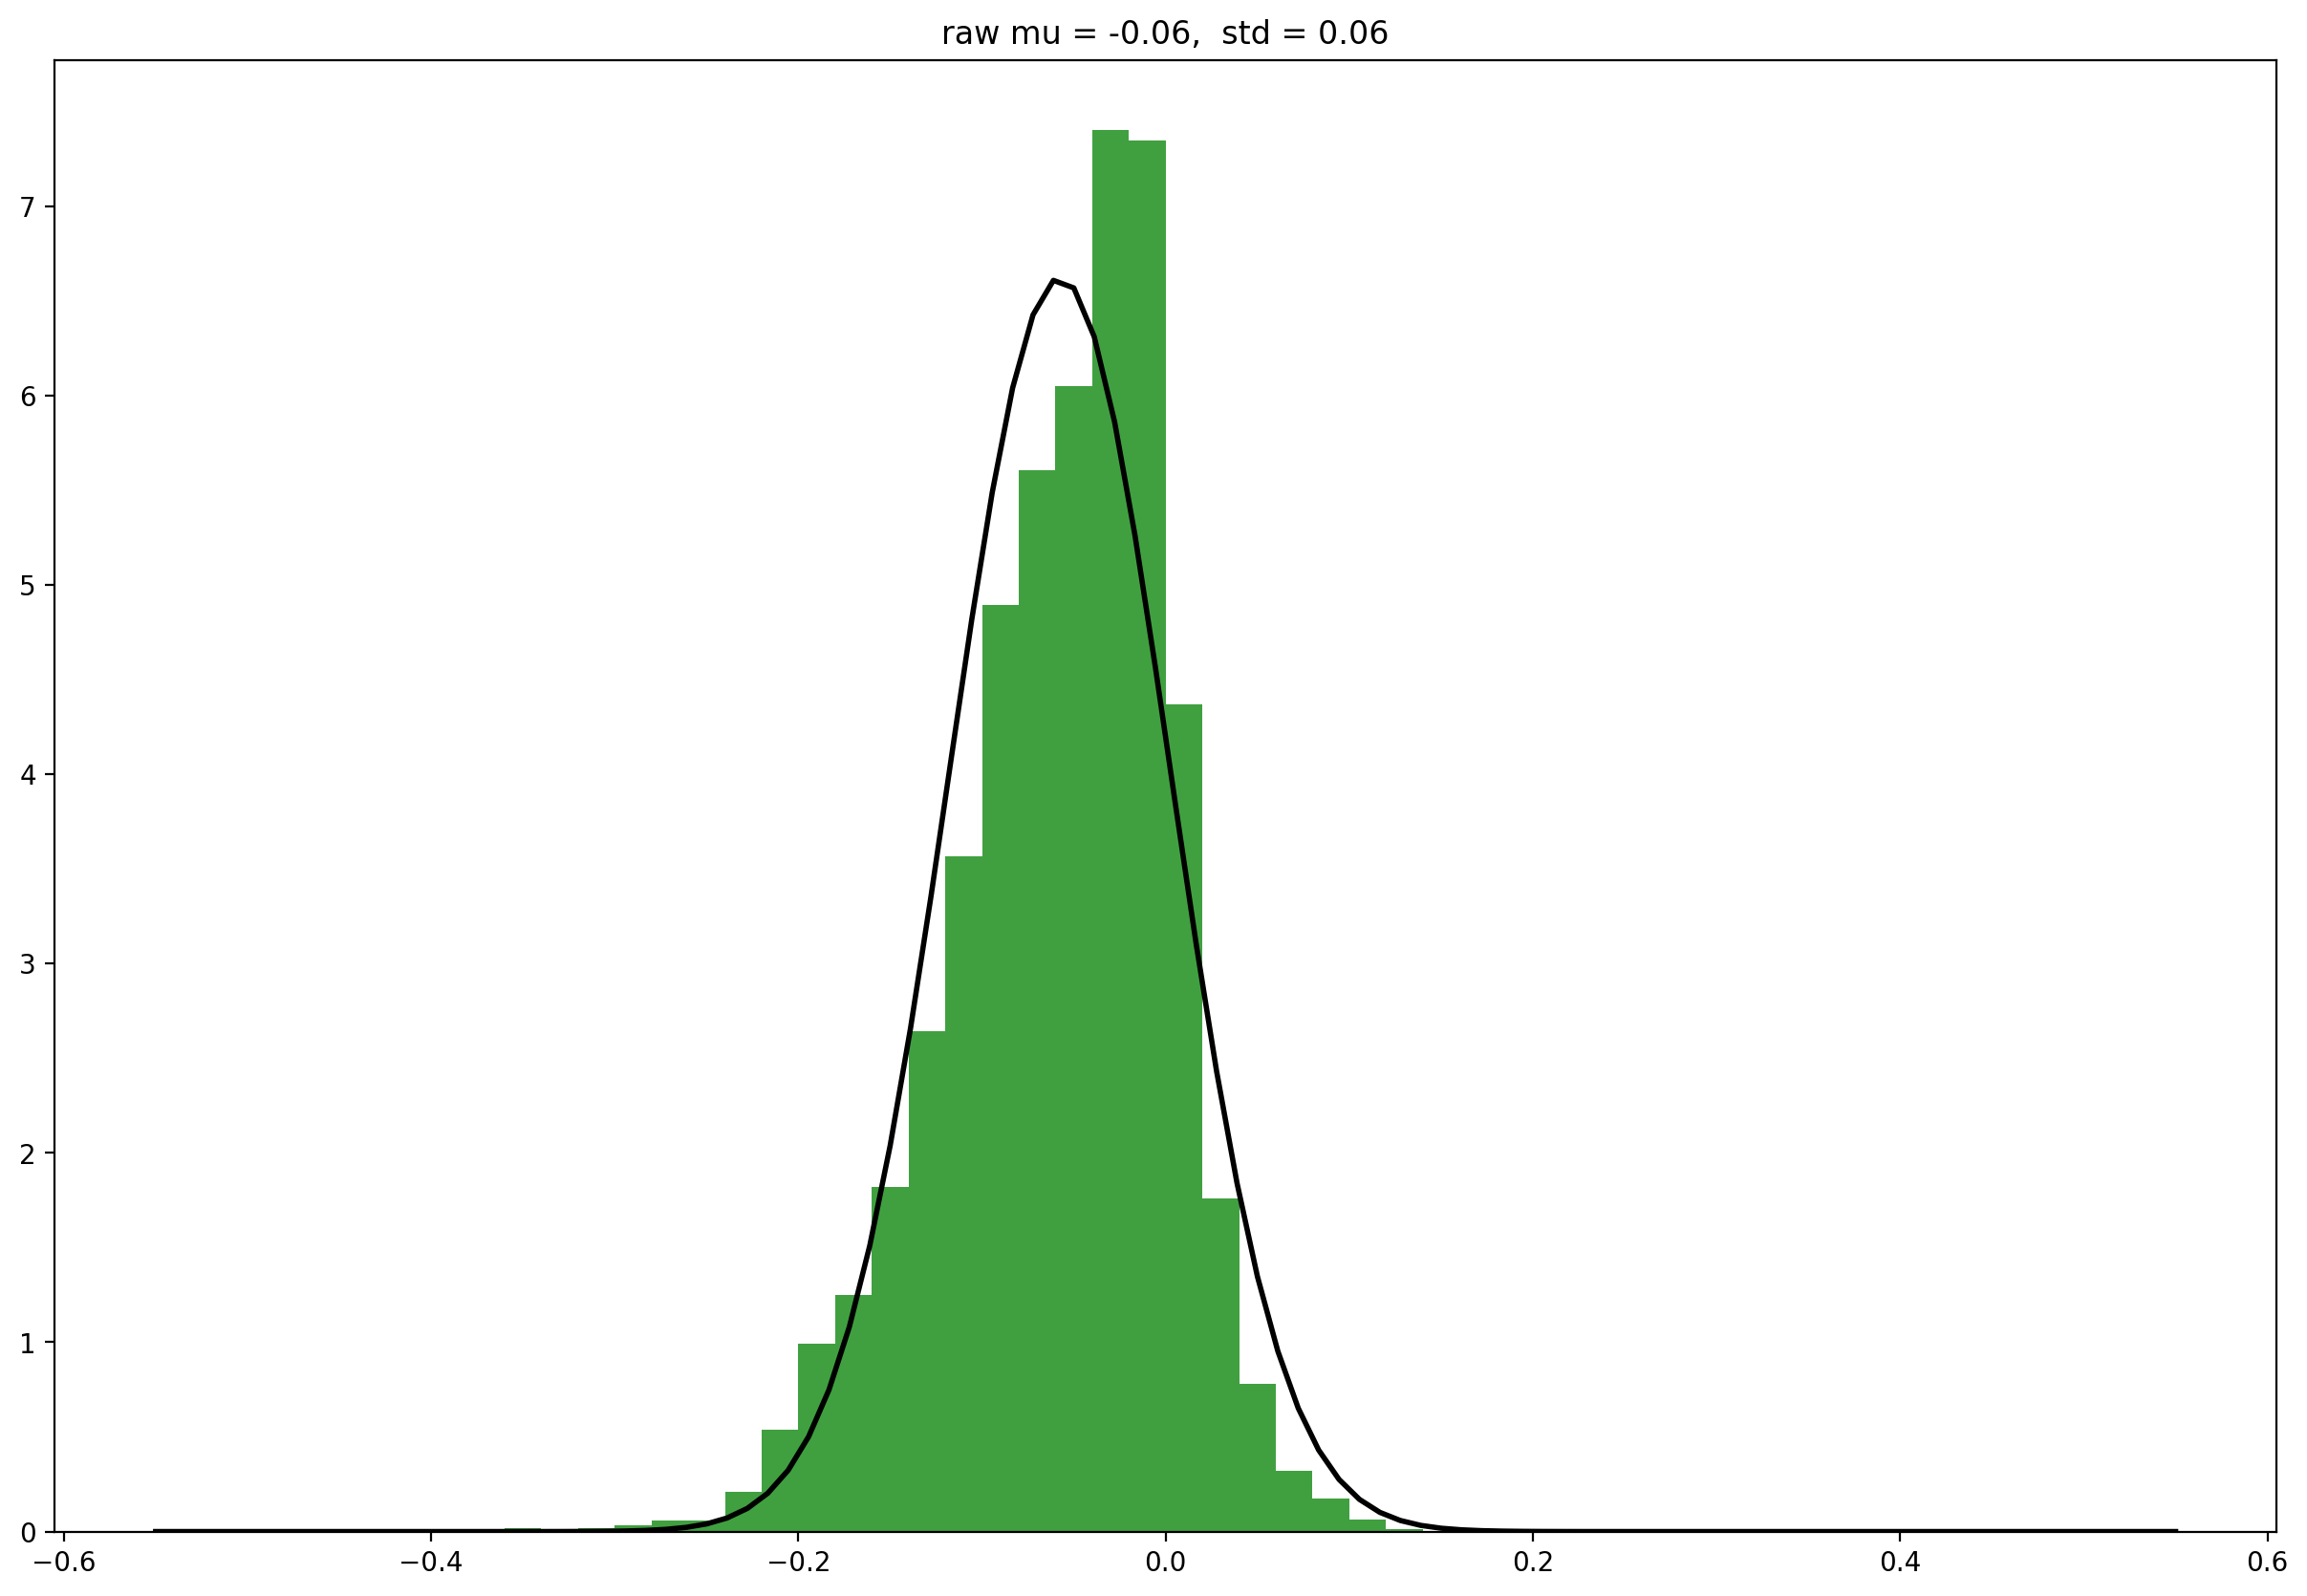

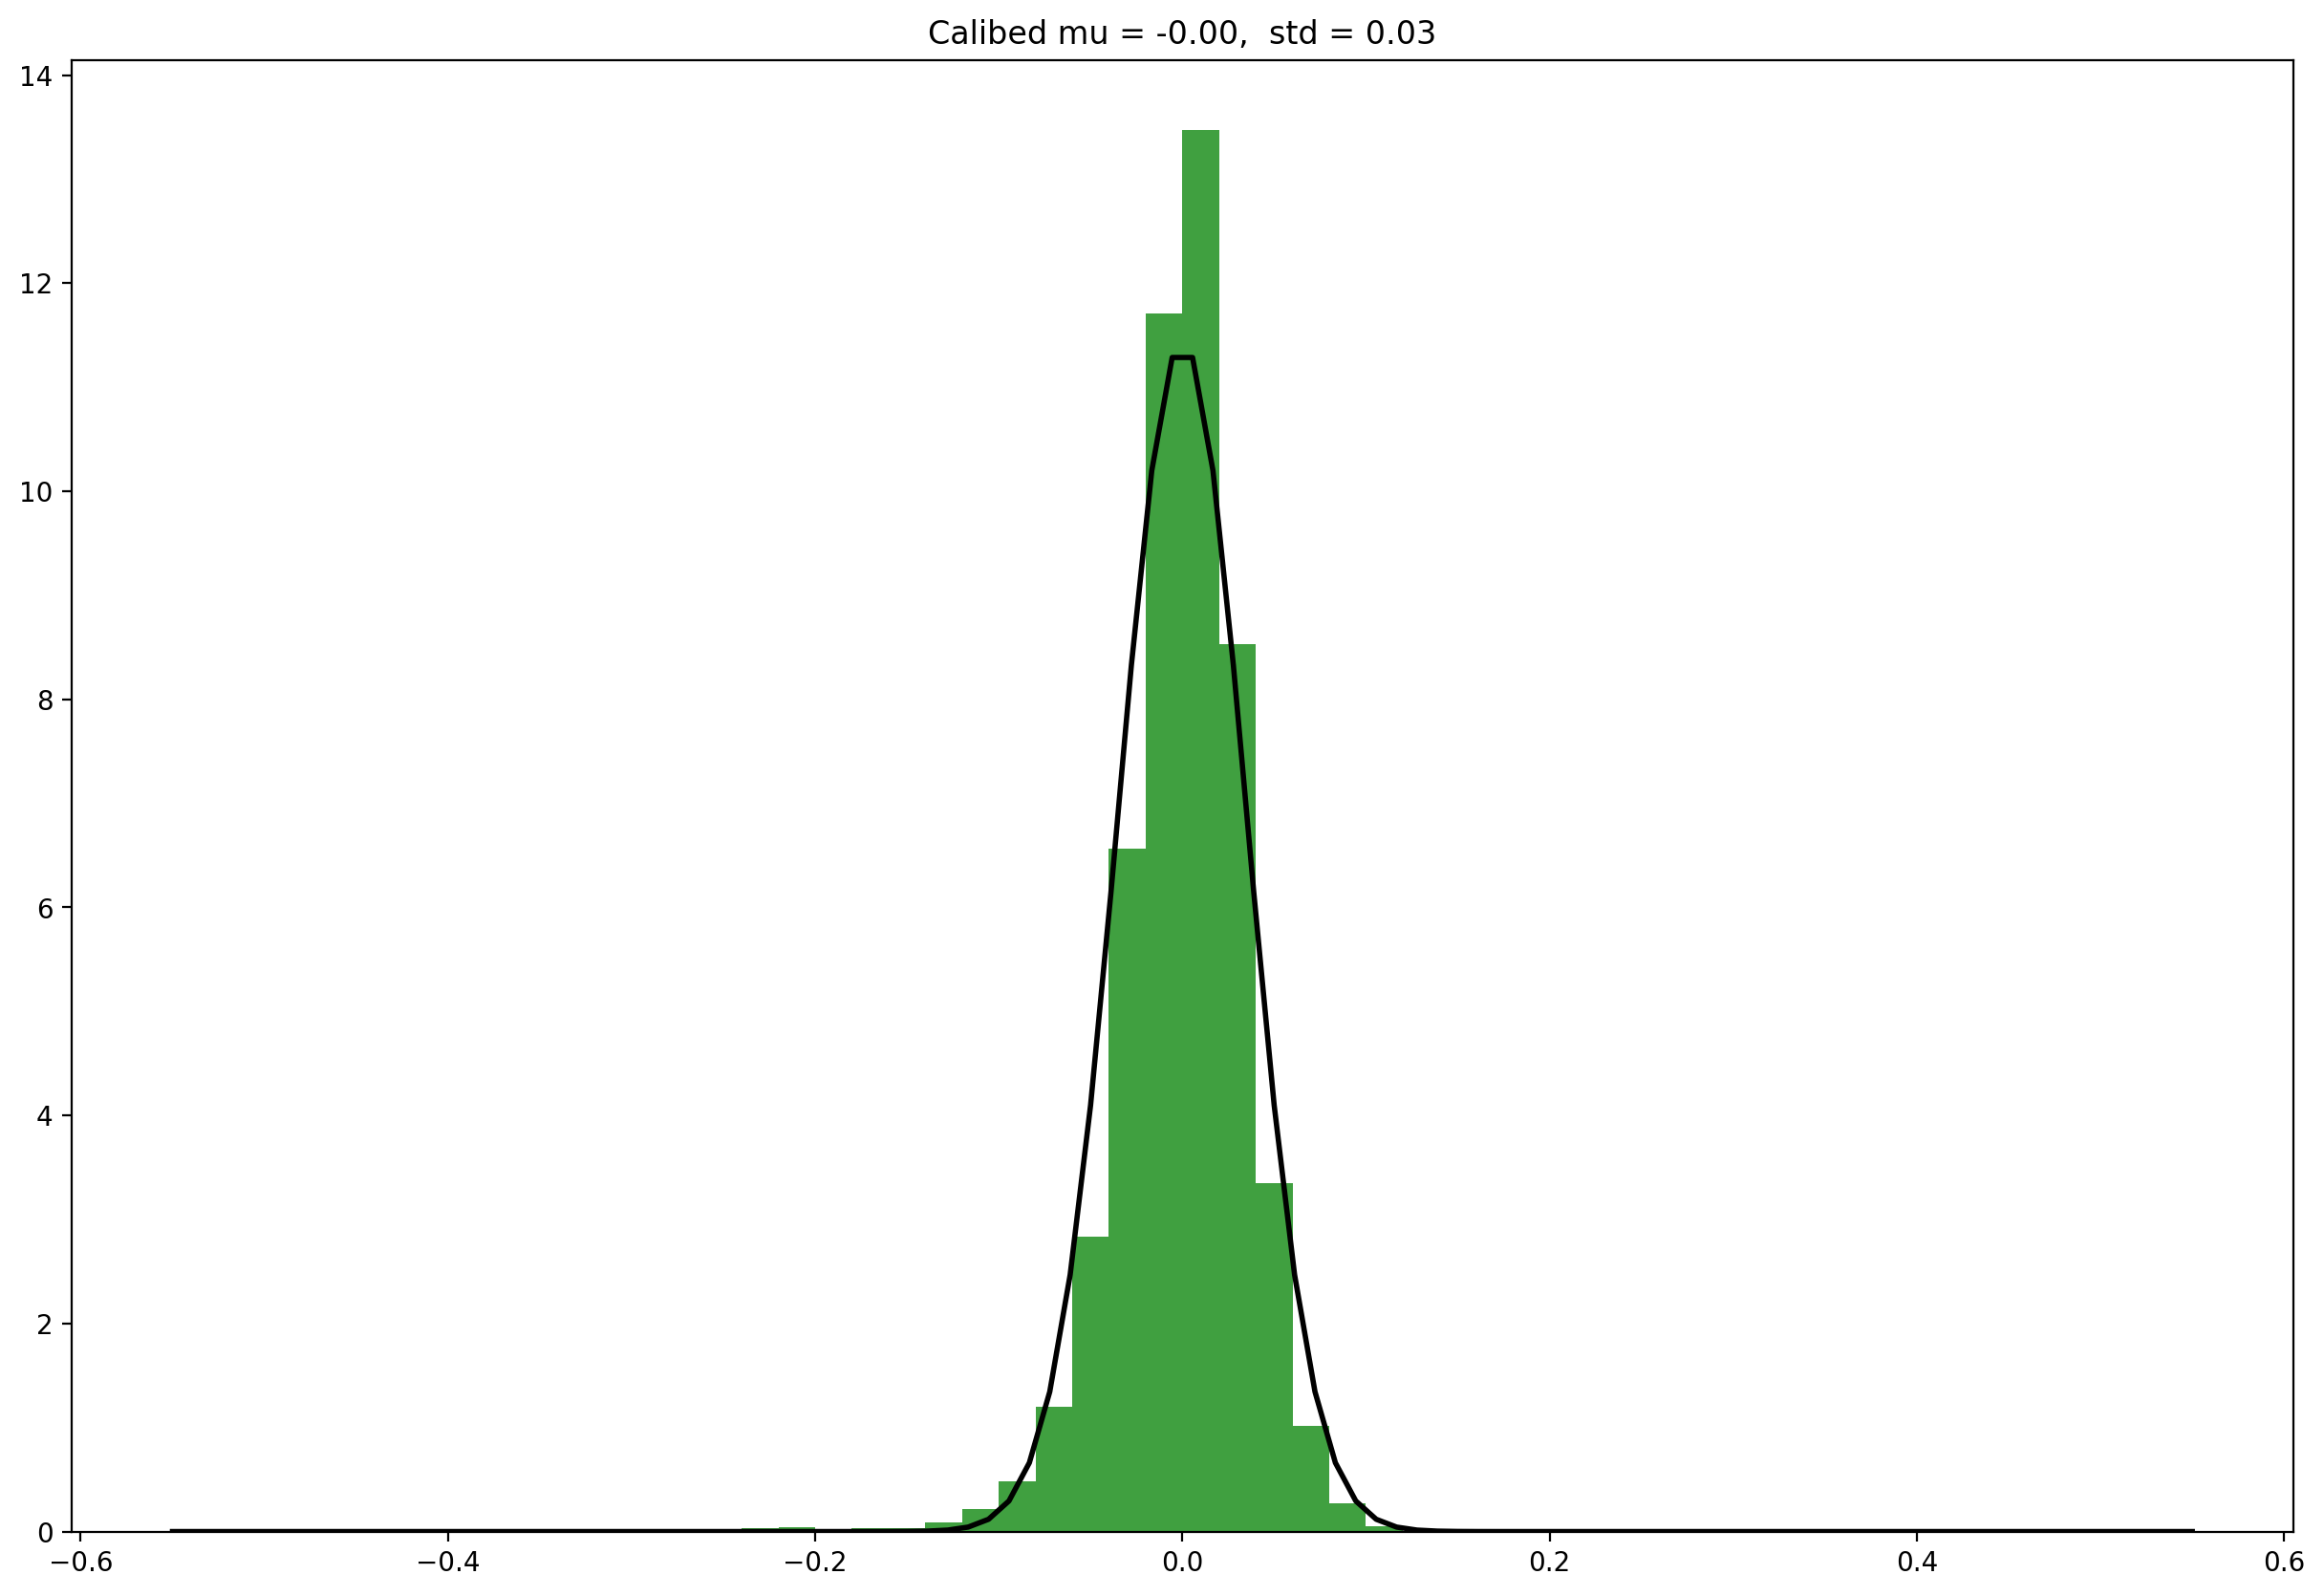

In [5]:
plt.close("all") 
distance_calib = {
    1: {}
}
distances = read_distances_swarm_frame(bag, "/swarm_drones/swarm_frame", t0)

plot_distance_err(poses, poses_fused, distances, main_id, nodes, distance_calib, is_show=True)

Outlier rate 0.00% total loops 118 inter_loops 156 outlier_num 0
Pos cov 5.3e-03, 3.0e-03, 2.1e-03
Yaw cov 1.6e-02
Pos std 7.3e-02, 5.5e-02, 4.6e-02
Yaw std 1.2e-01


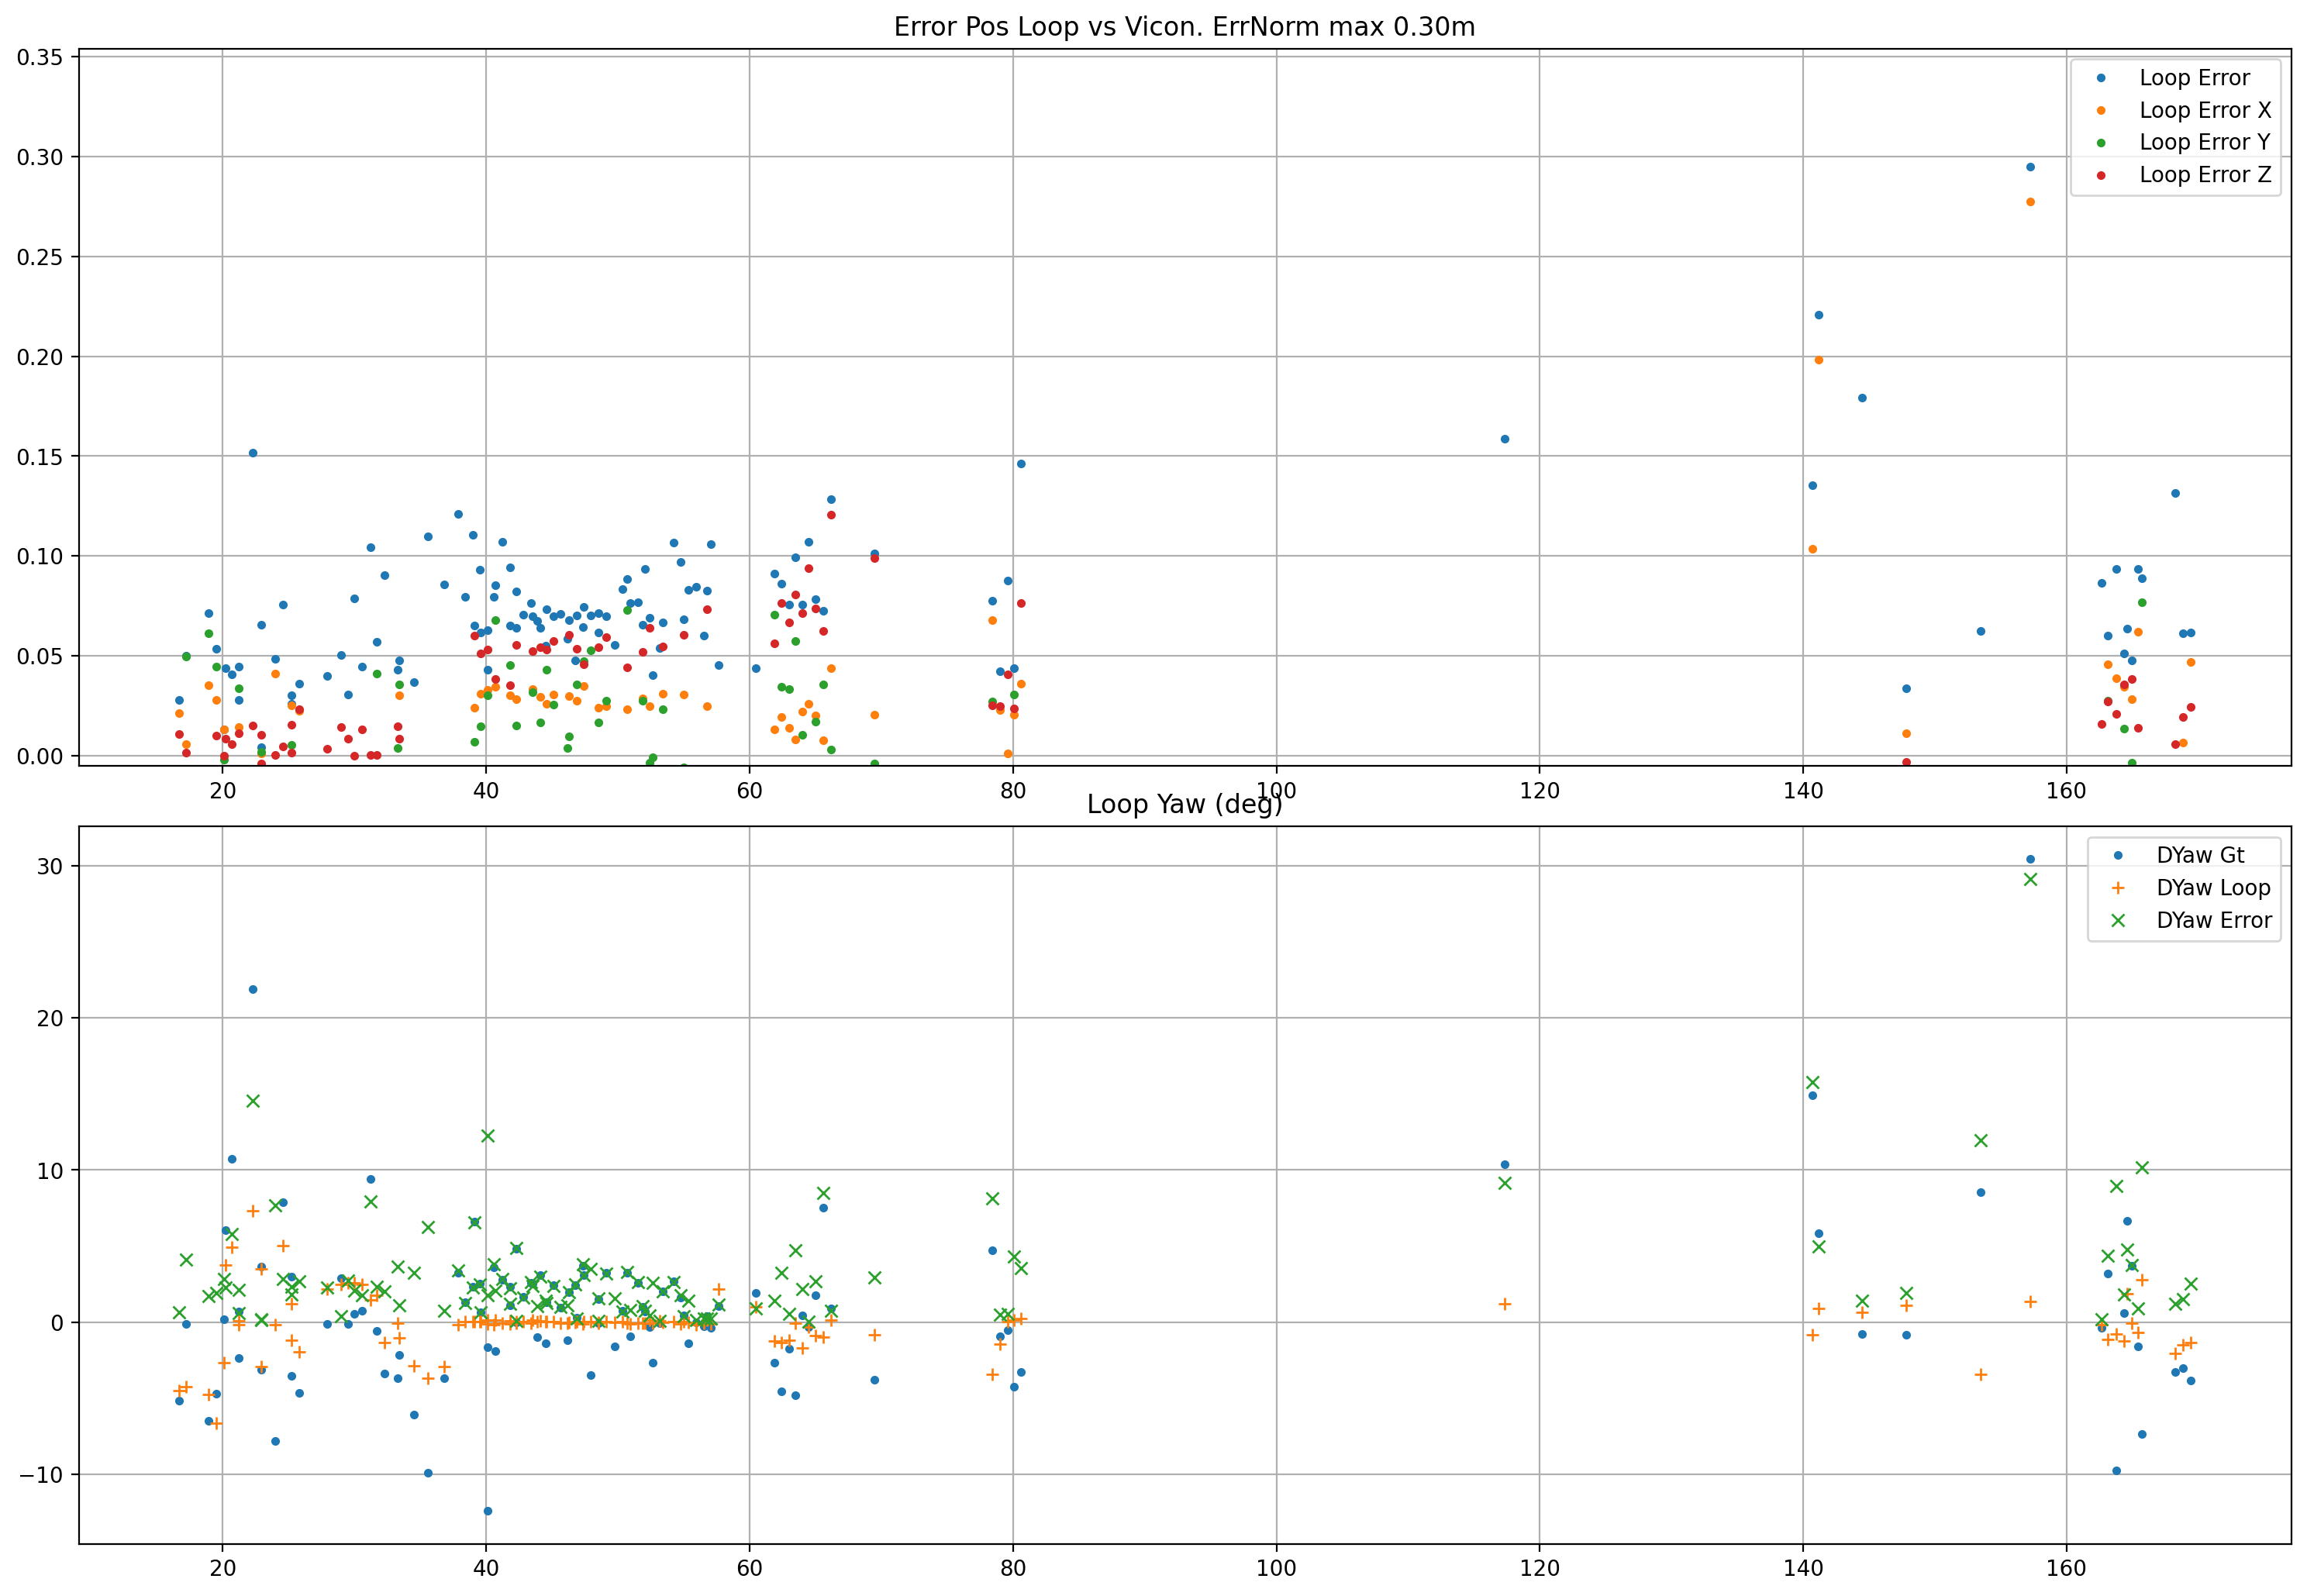

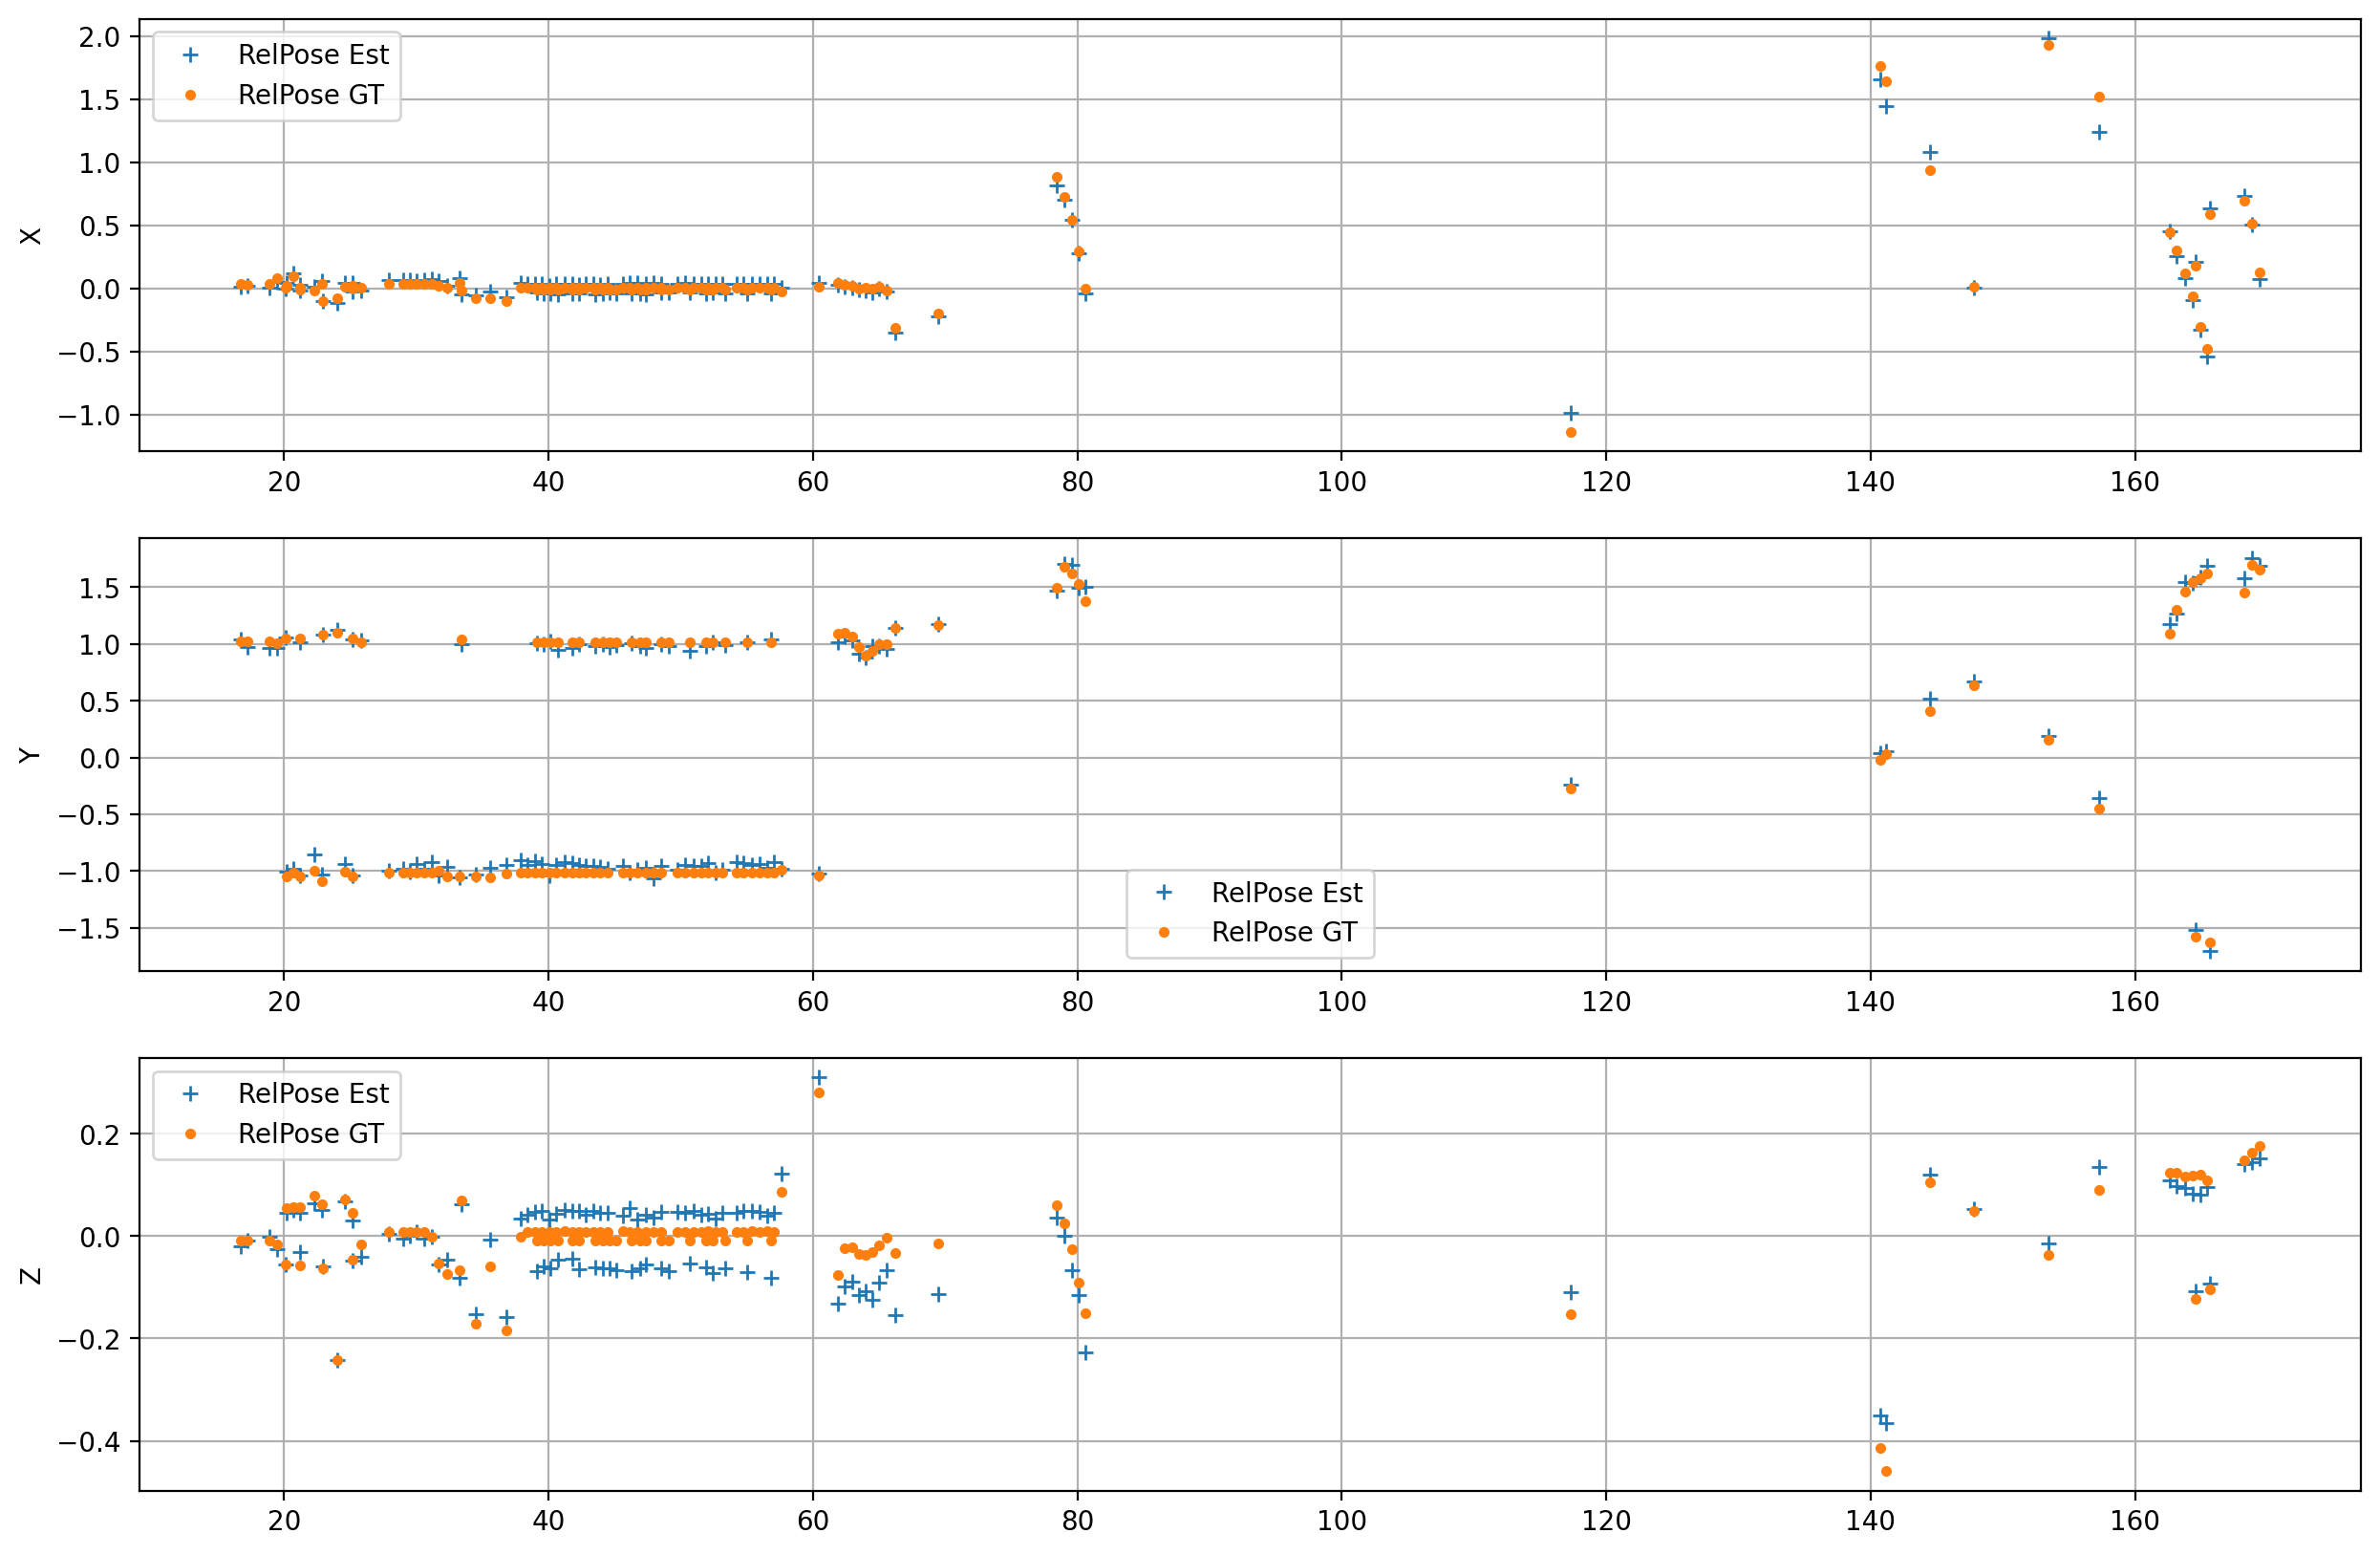

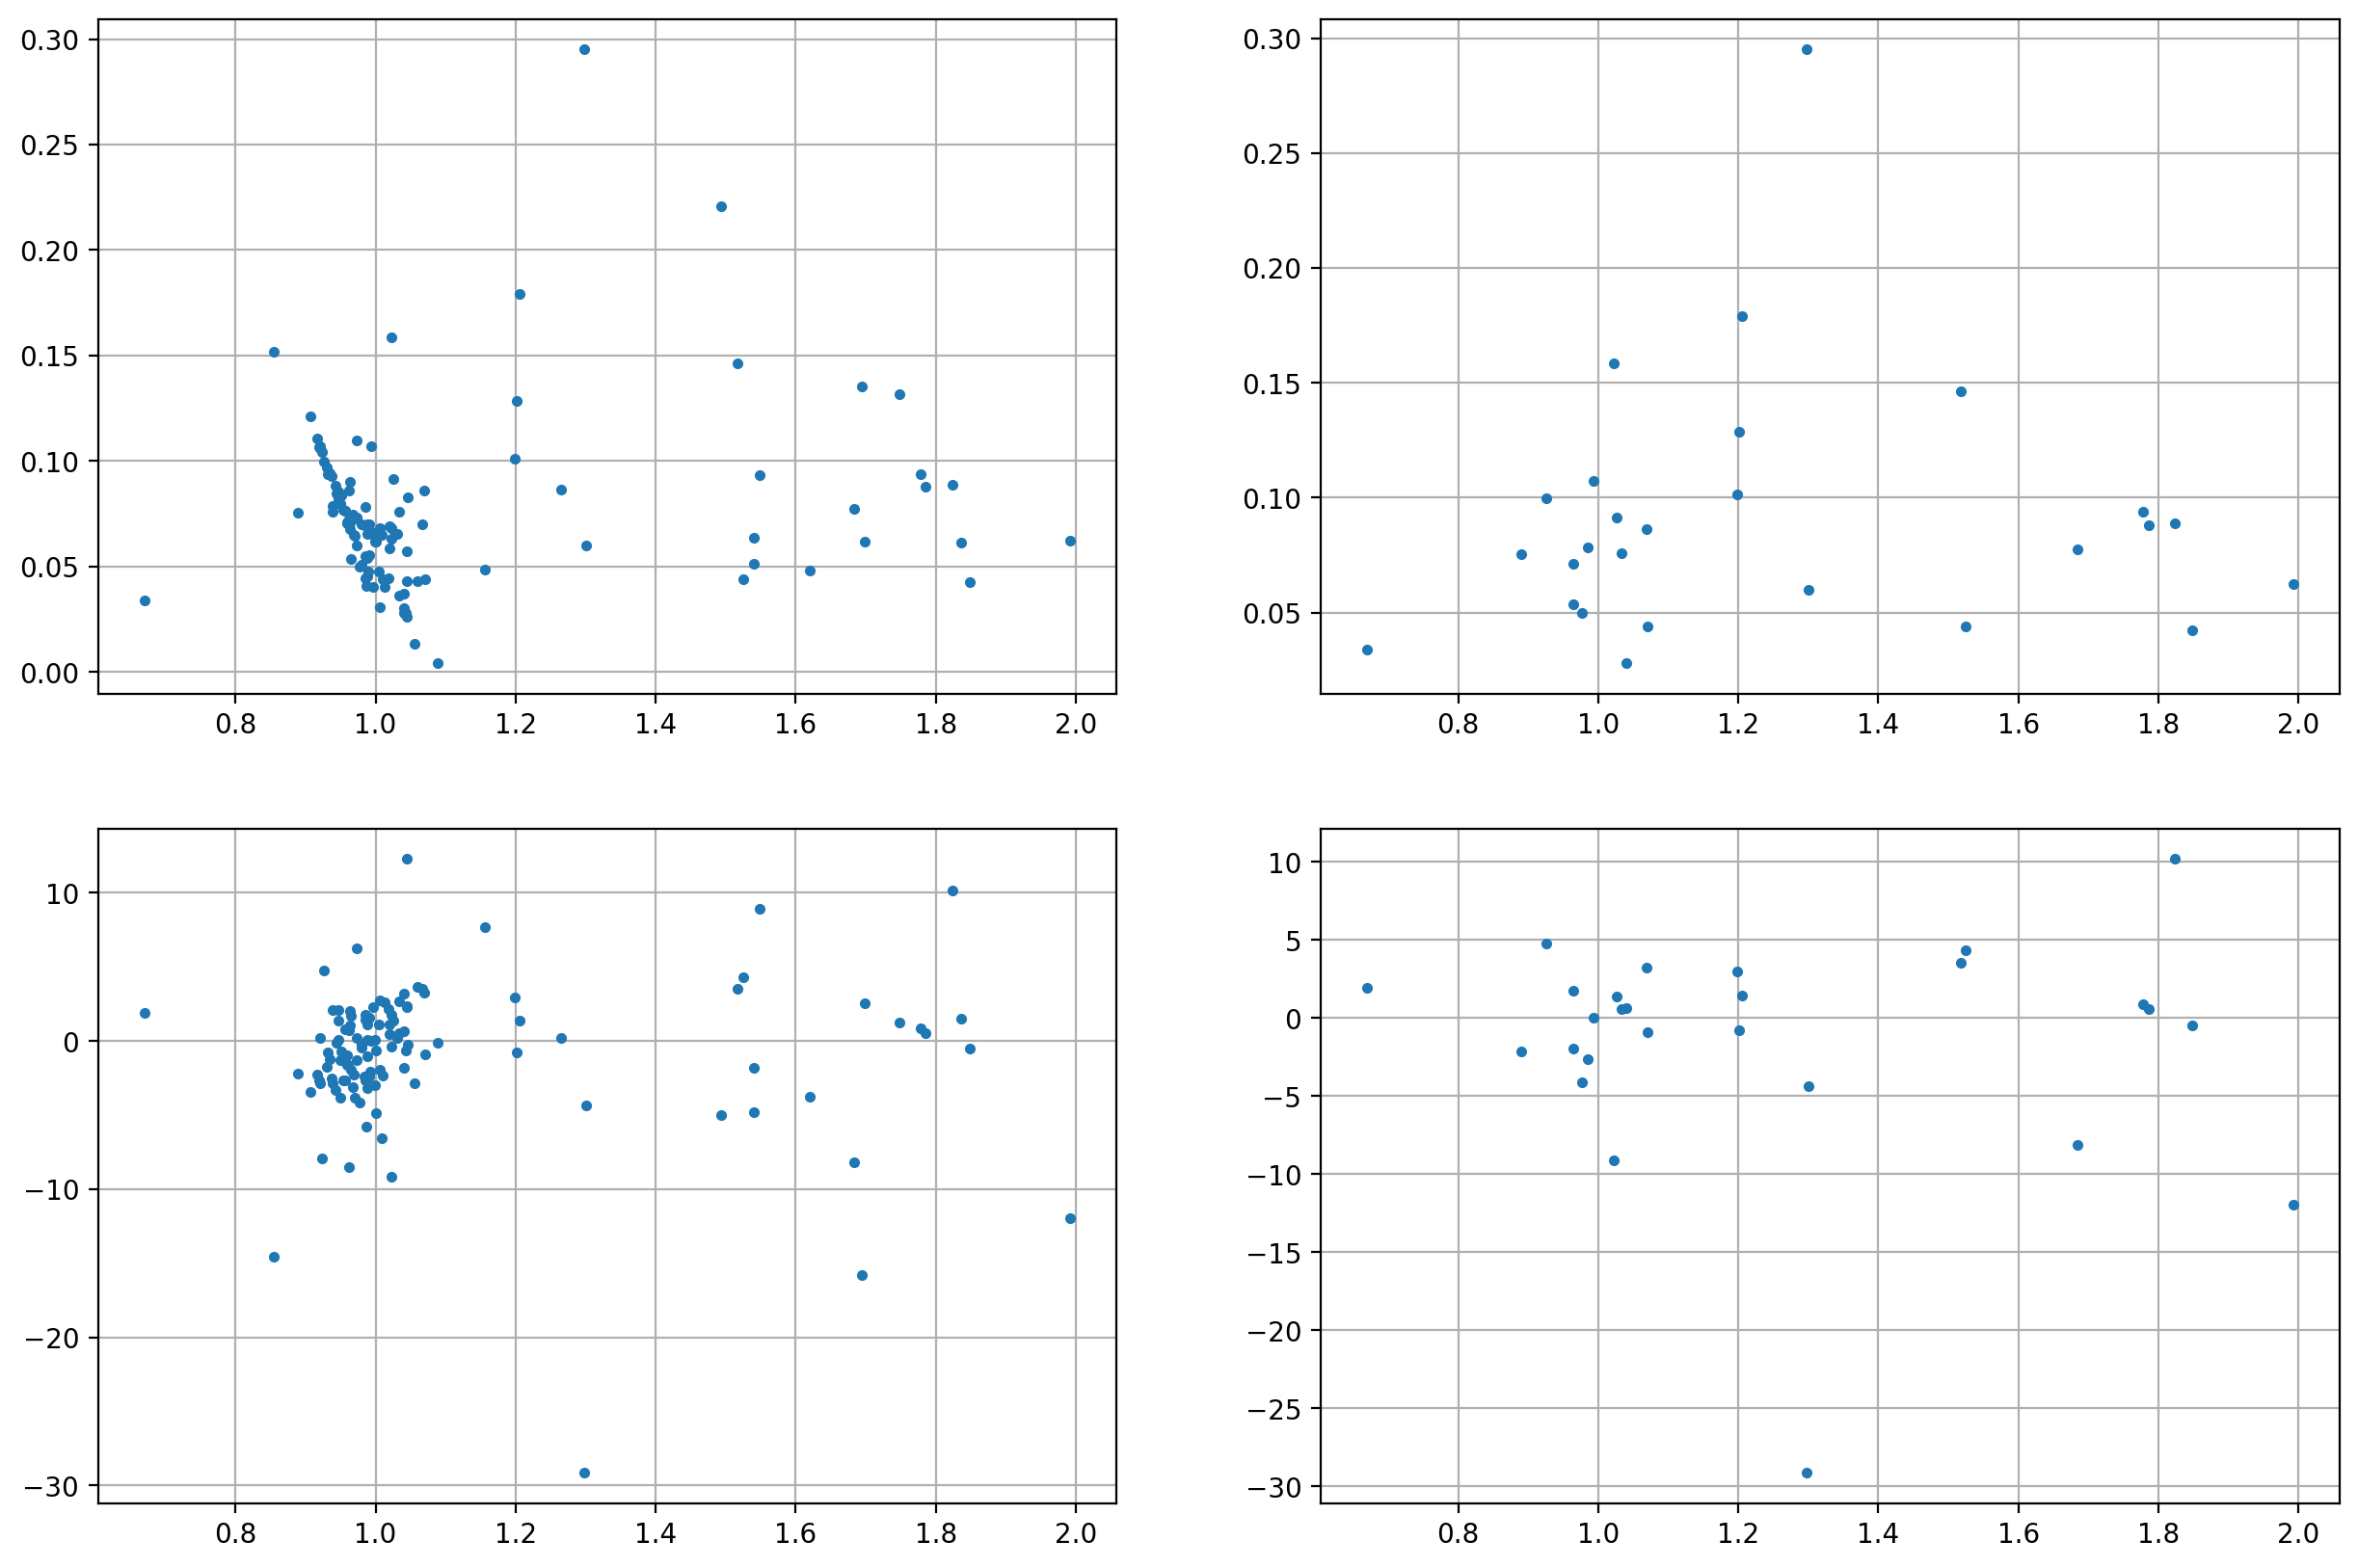

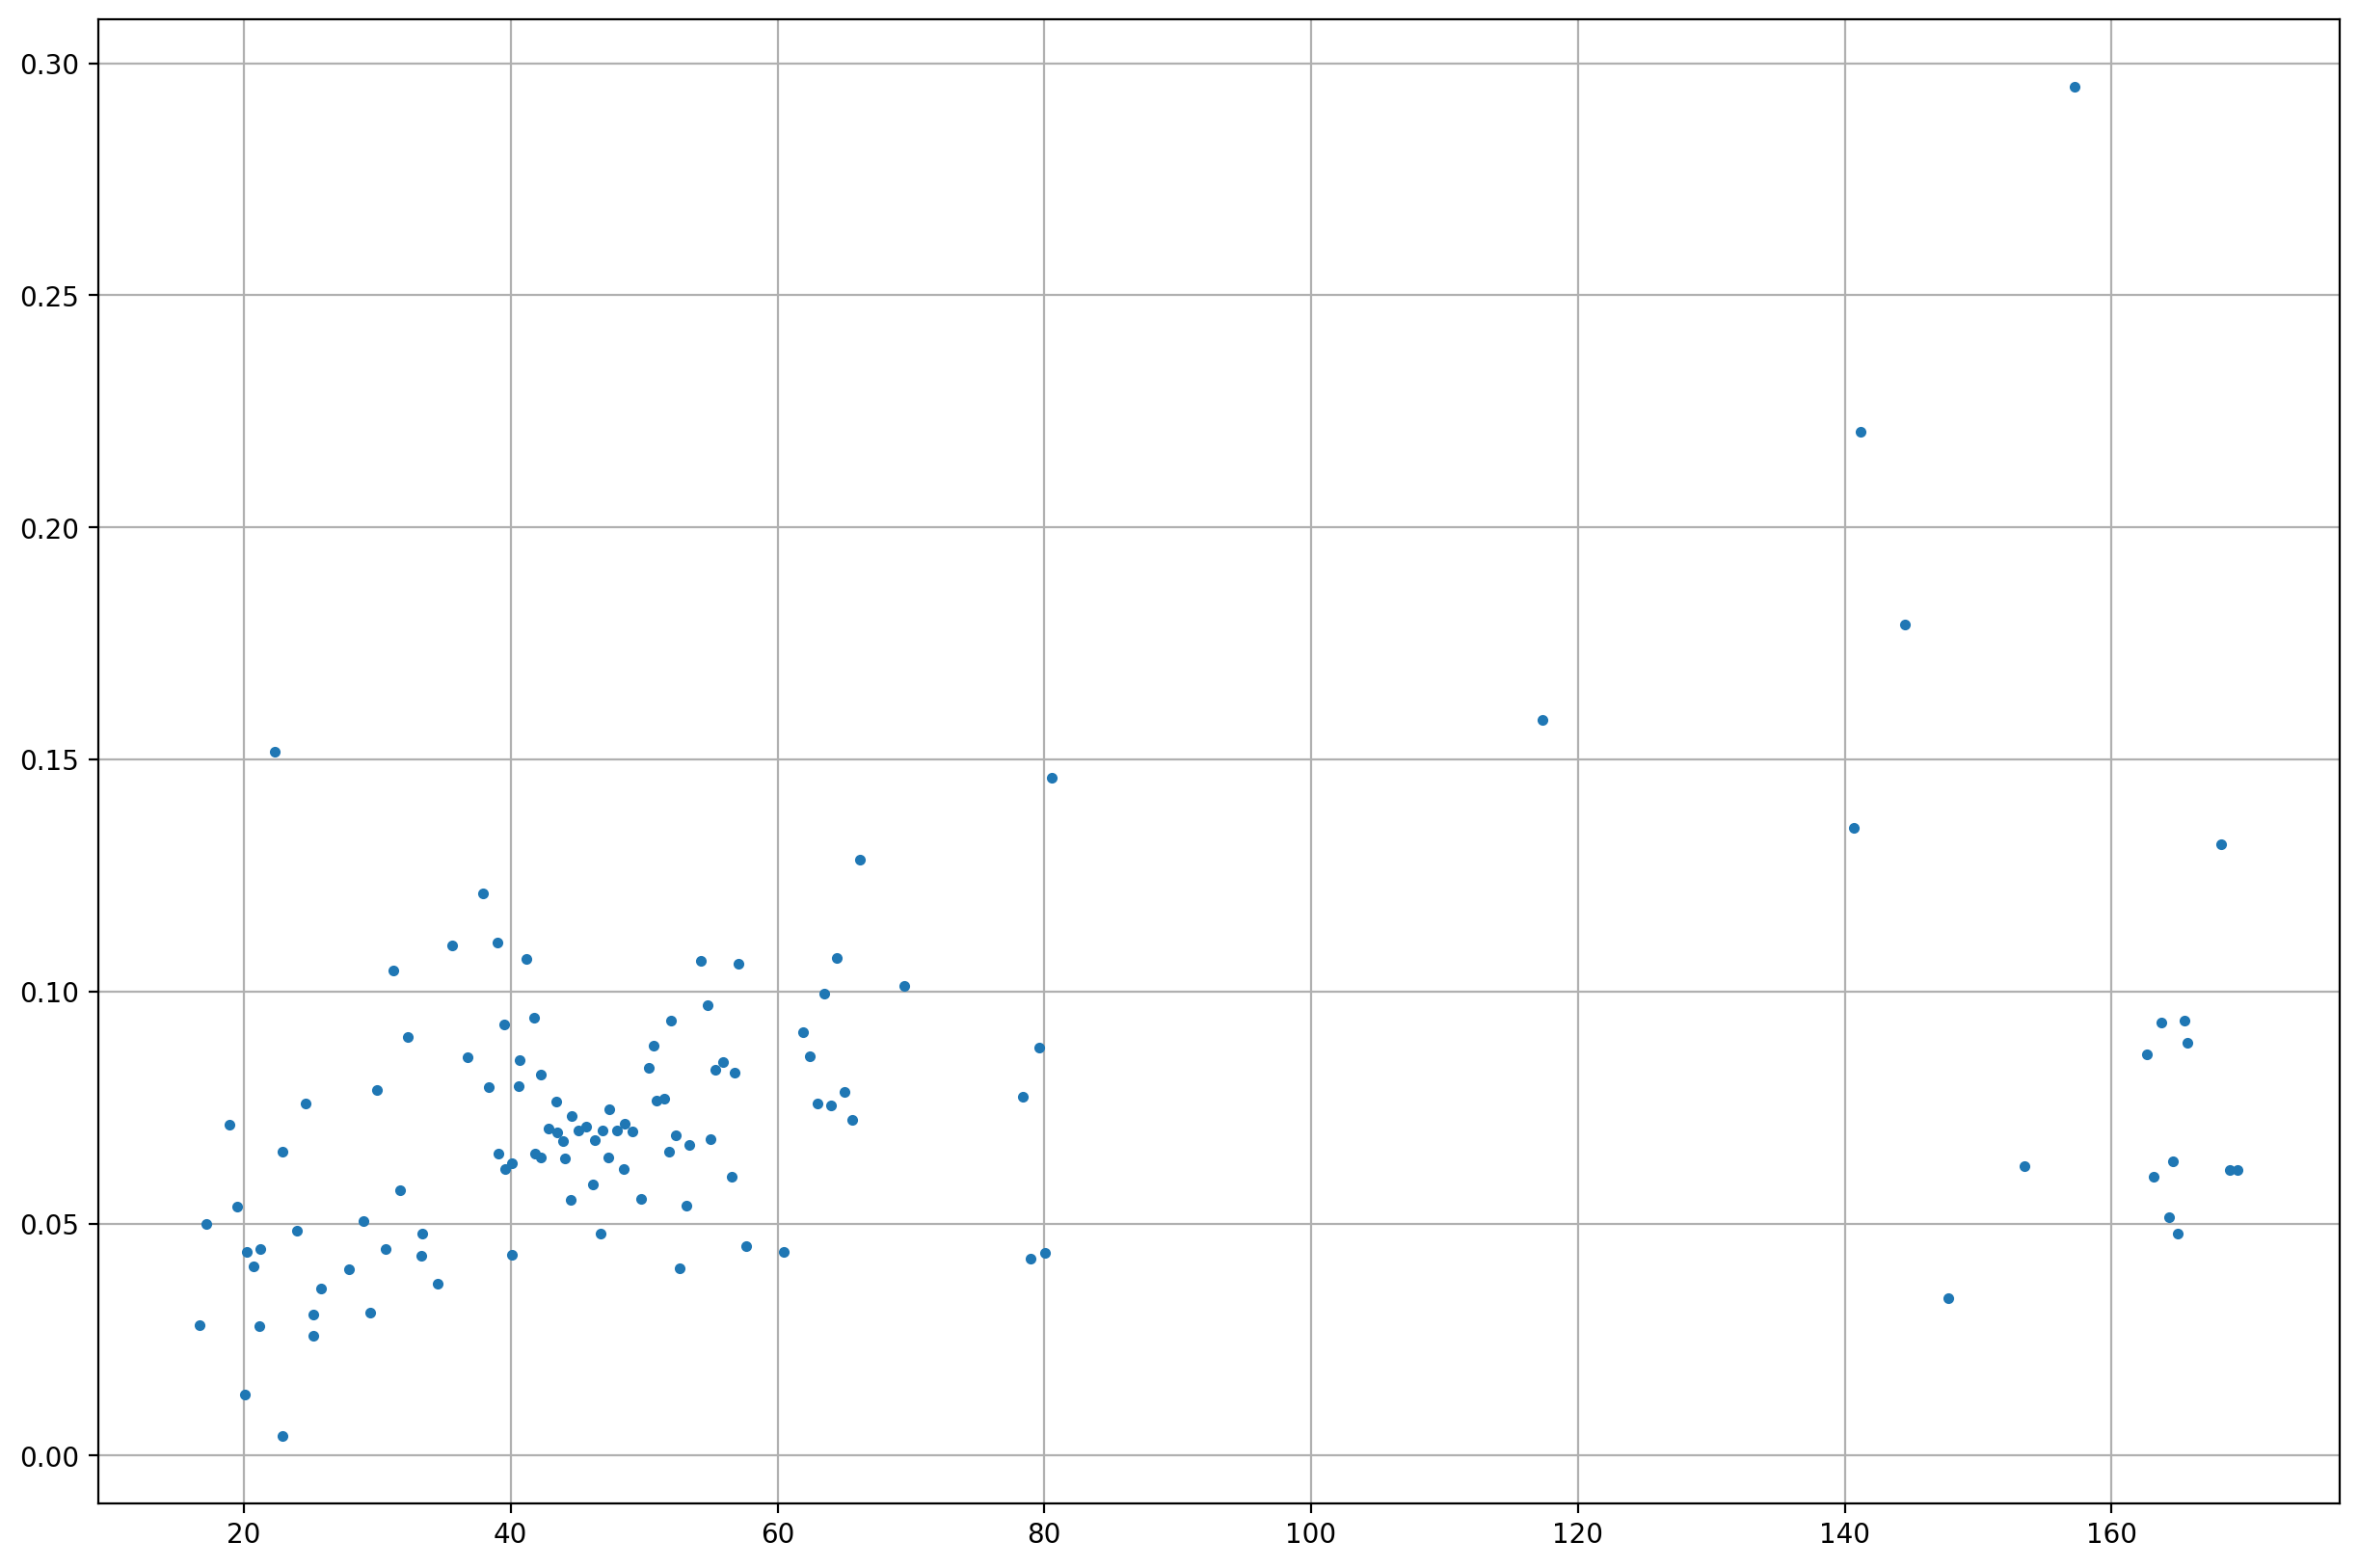

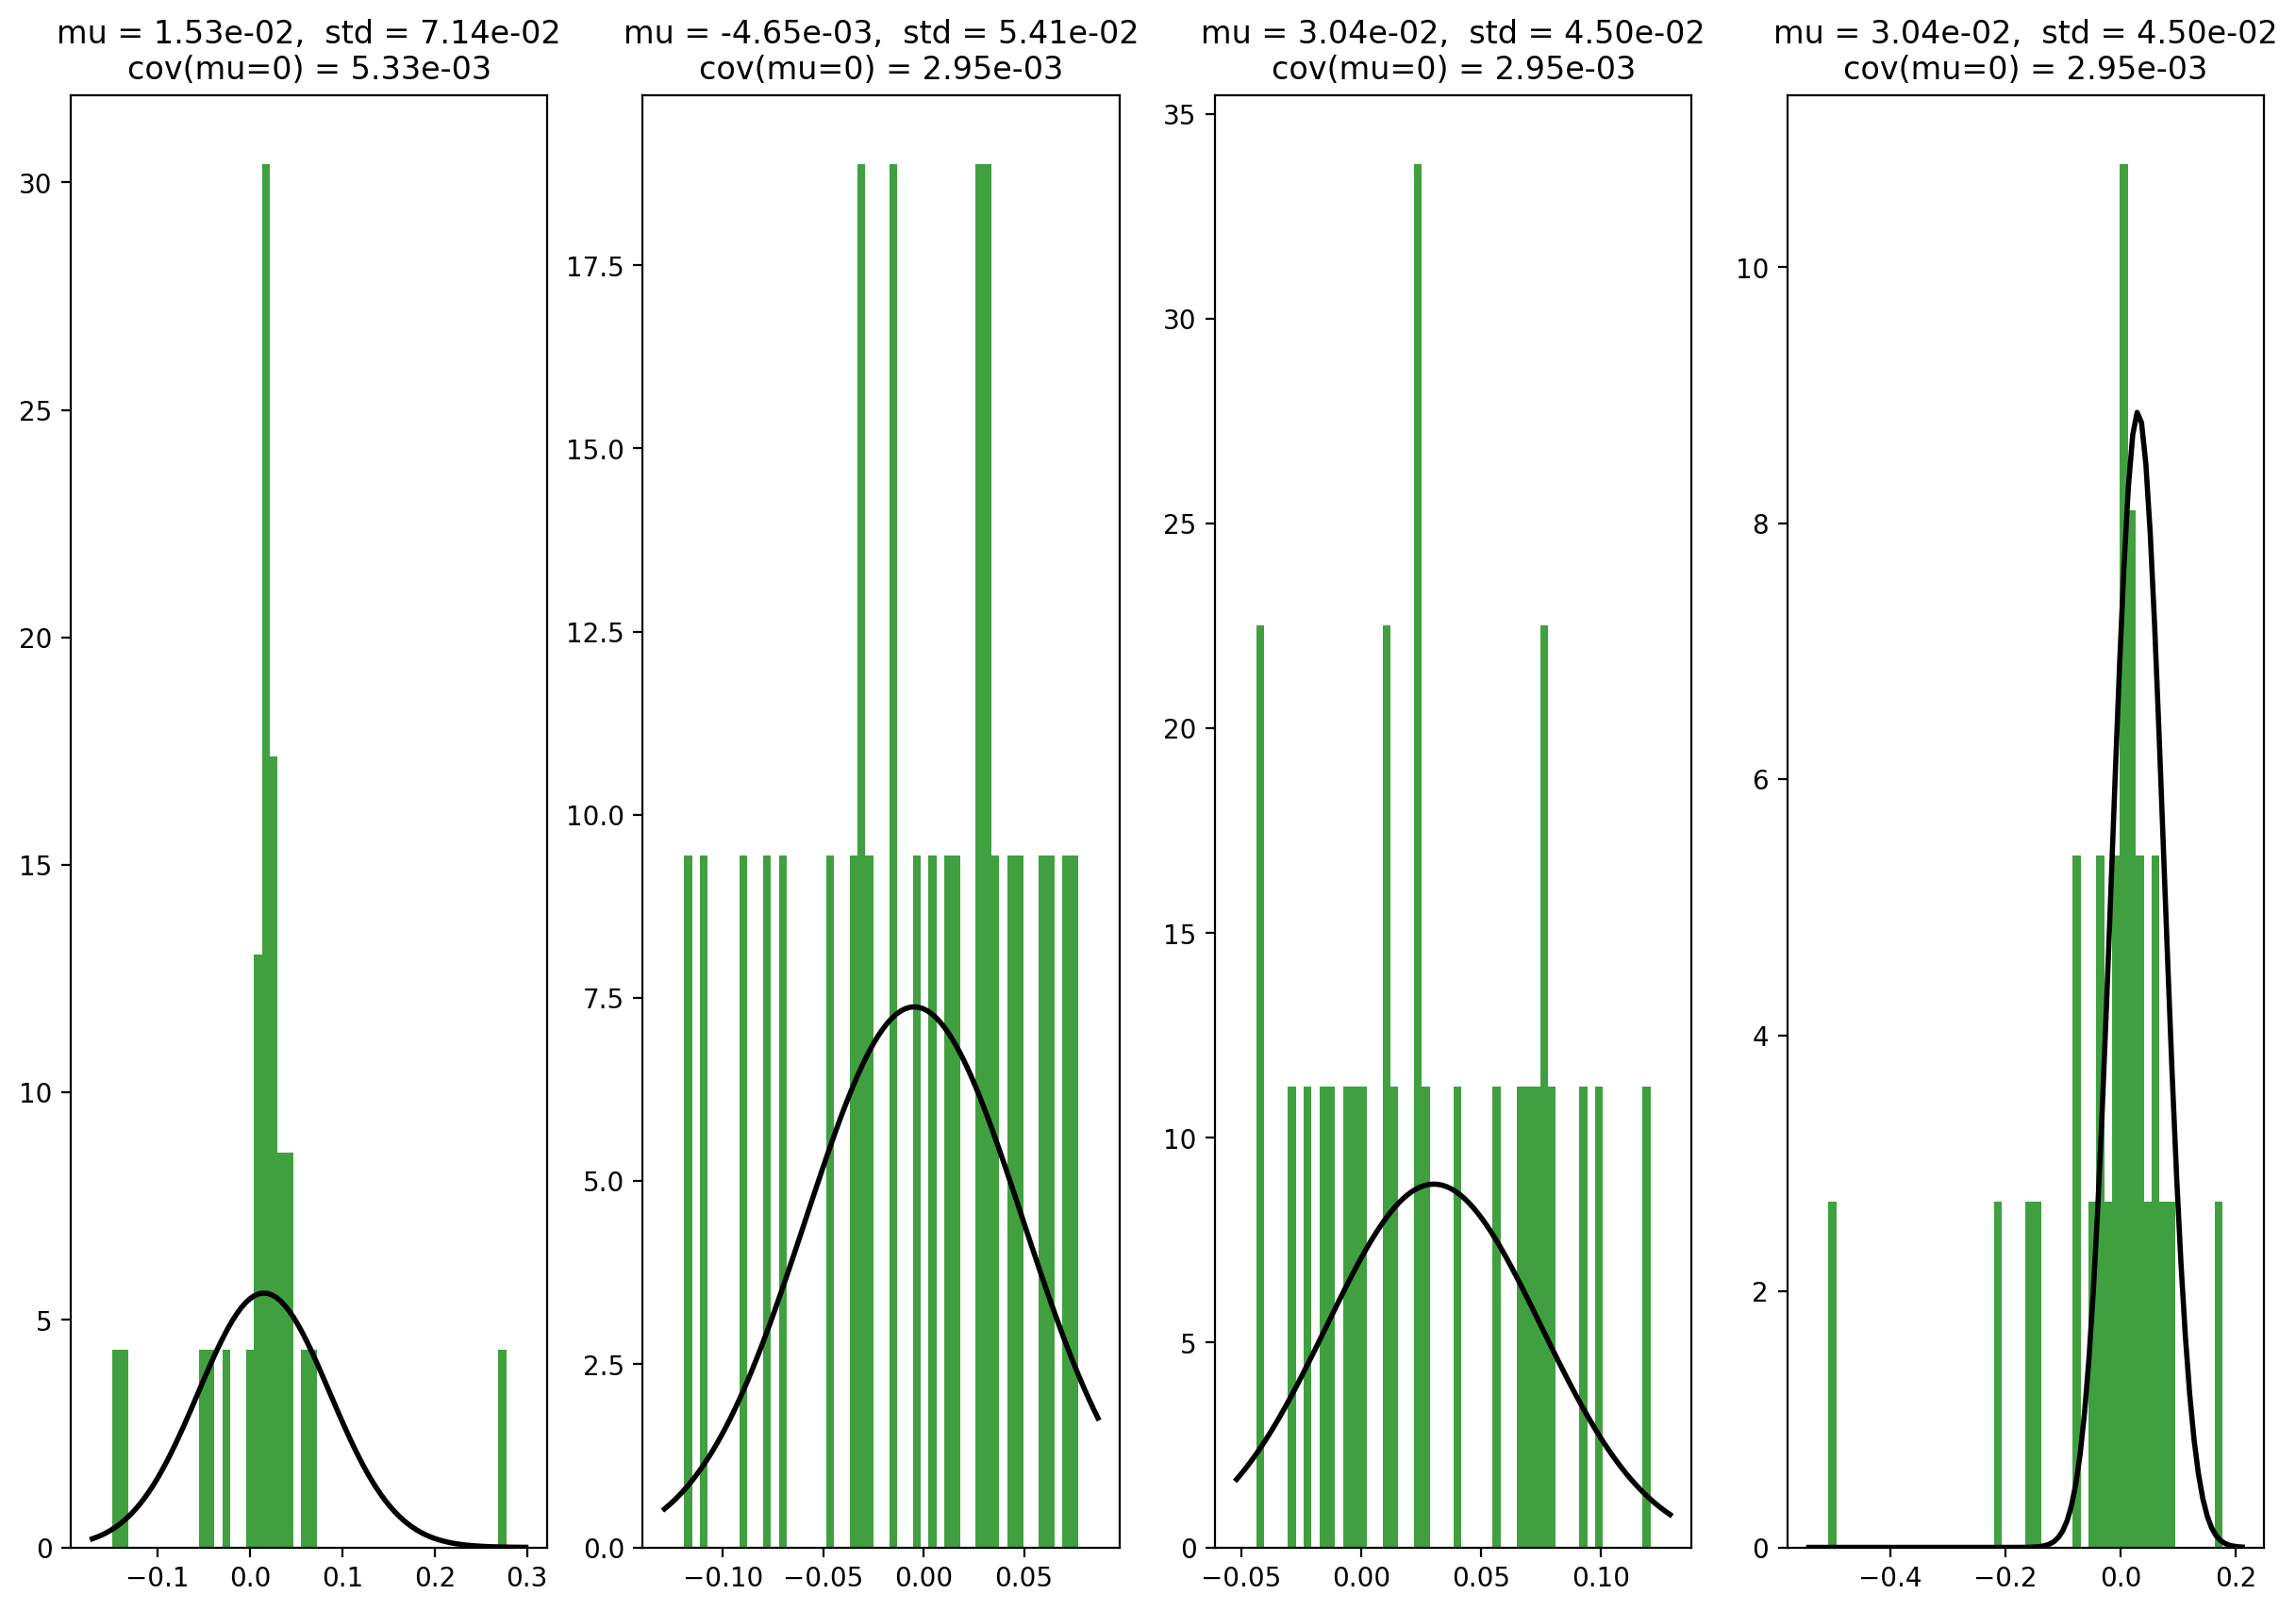

In [6]:
plt.close("all")
inliers = read_loop_inliers(bag, "/swarm_drones/loop_inliers")
detections = read_detections_6d(bag, t0, "/swarm_drones/node_detected_6d")
loops_error =  plot_loops_error(poses, detections, inliers[-1], outlier_show_thres=10)
# loops_error =  plot_loops_error(poses, detections, None)


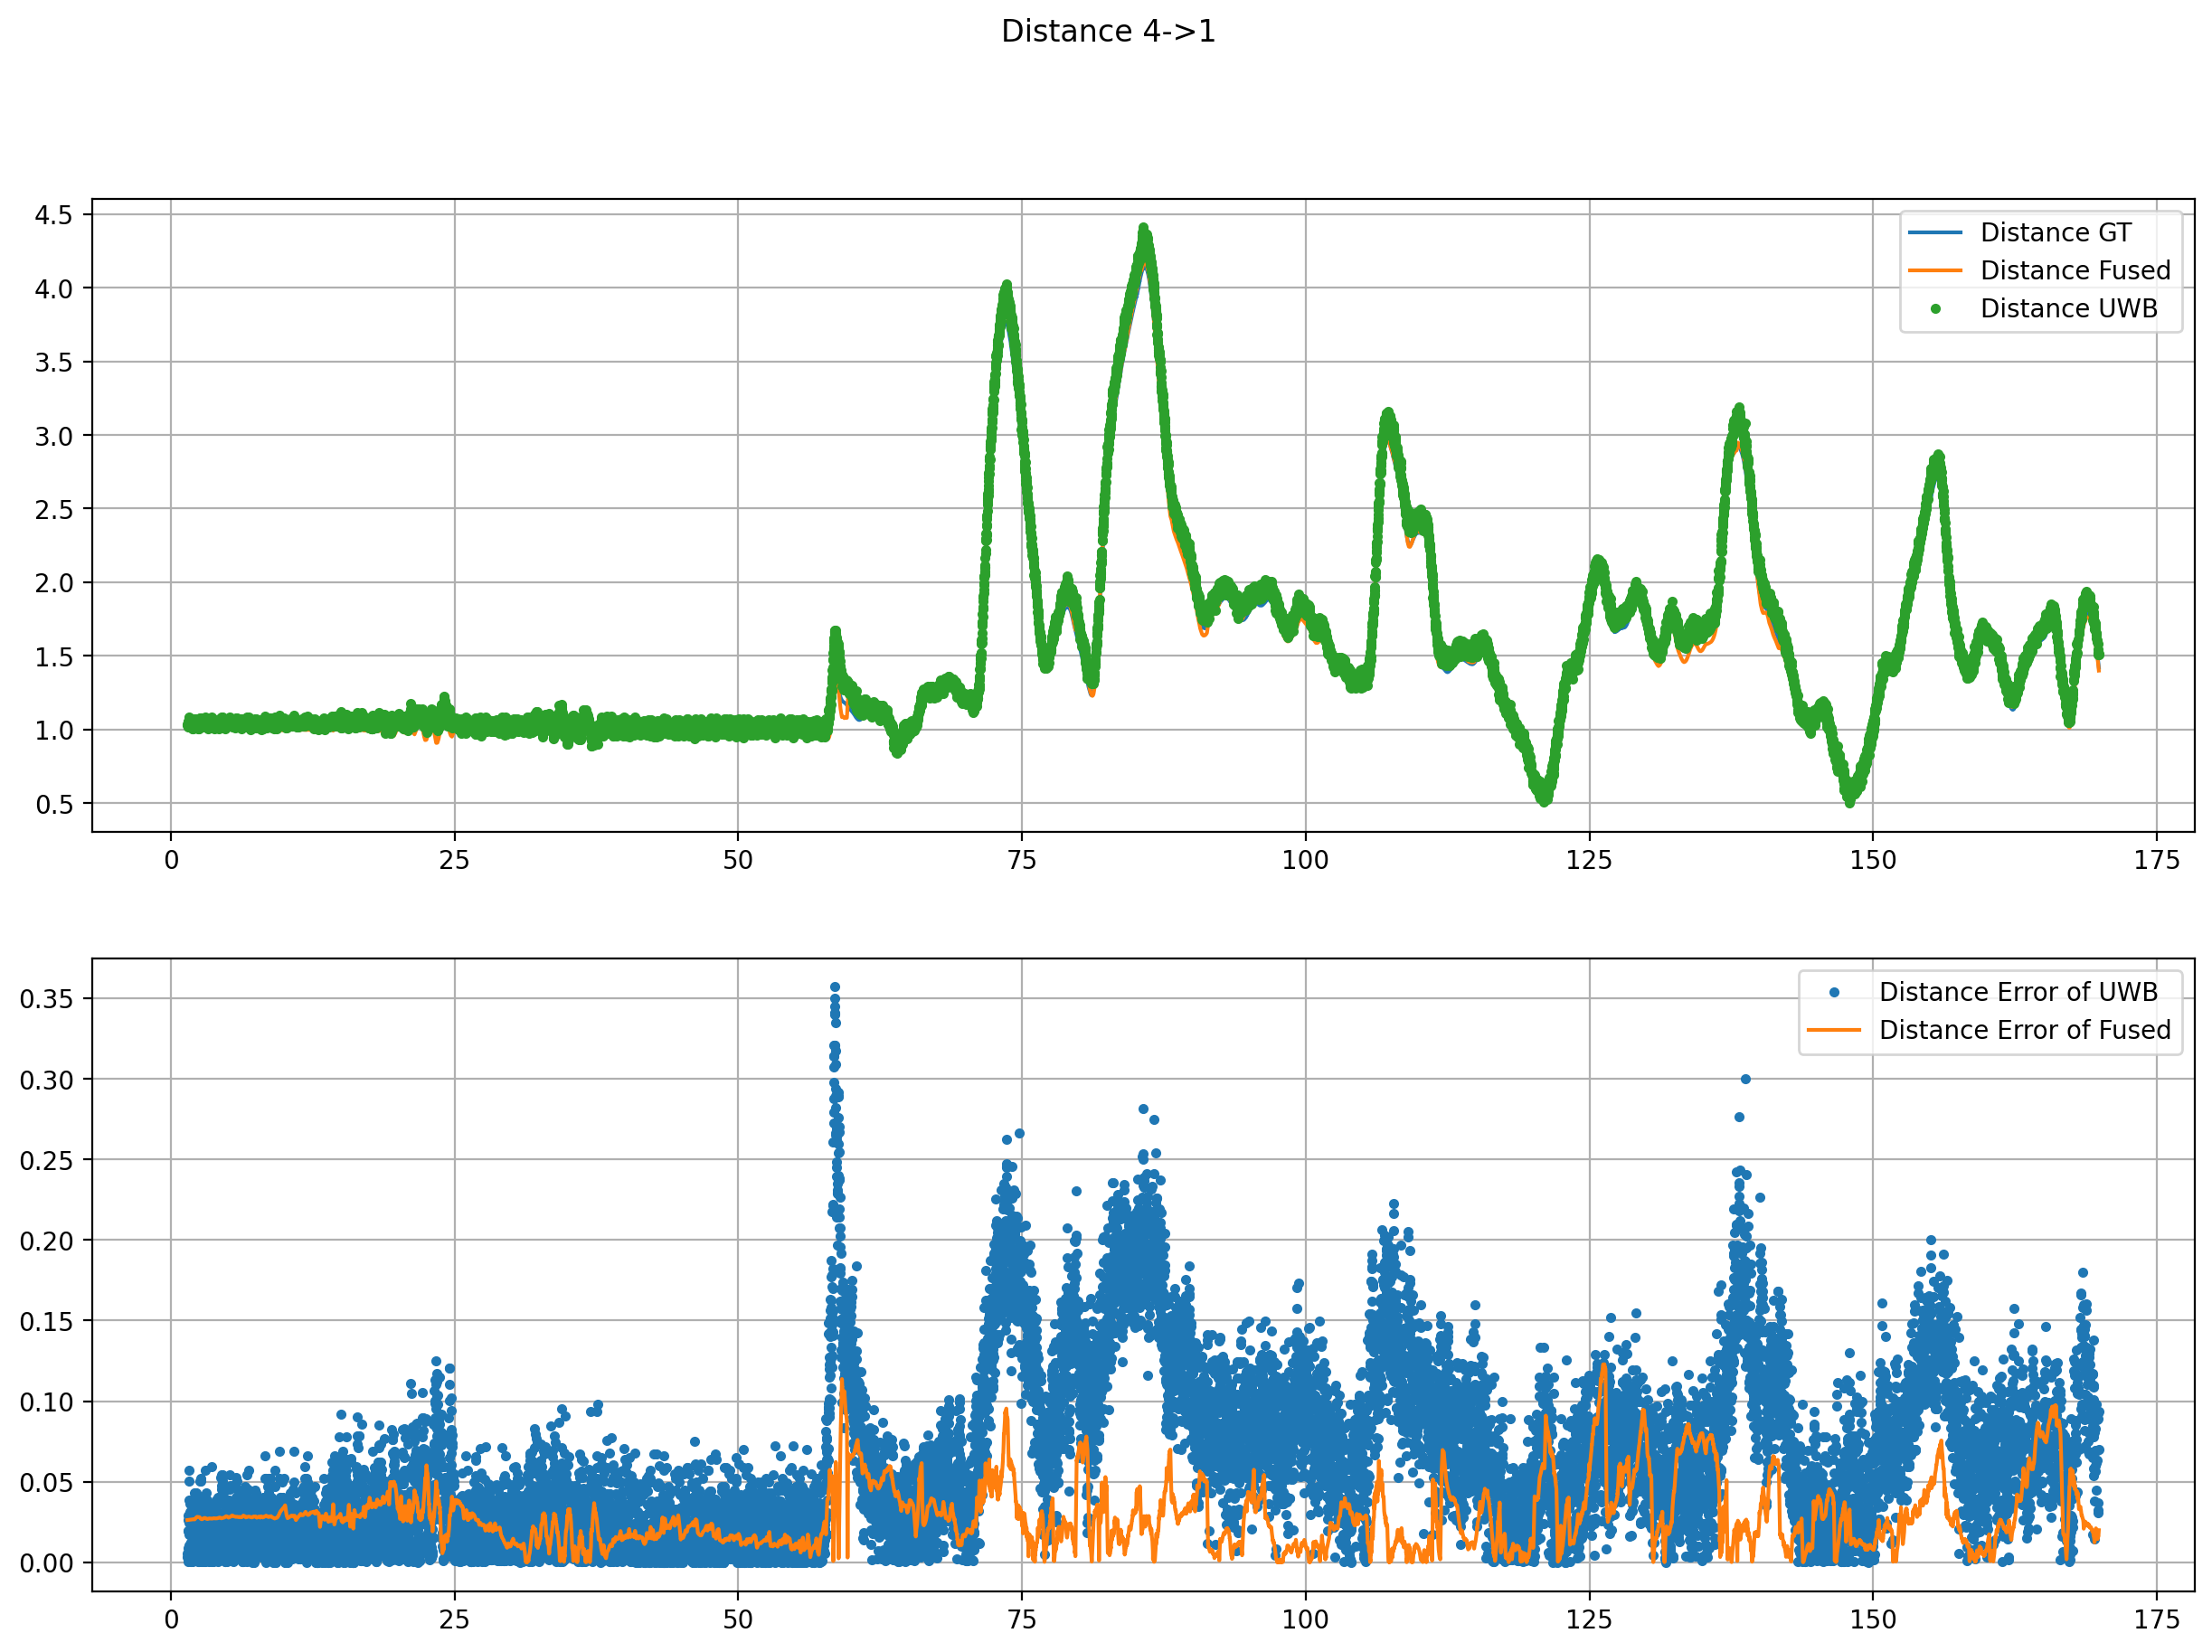

Distance 4->1 RMSE 0.08330713459709442
Use fit 0.9499422747931782, 0.002876024957717875
Cov Fitted 0.0014025205945797103
Cov Raw 0.0036305988421591567


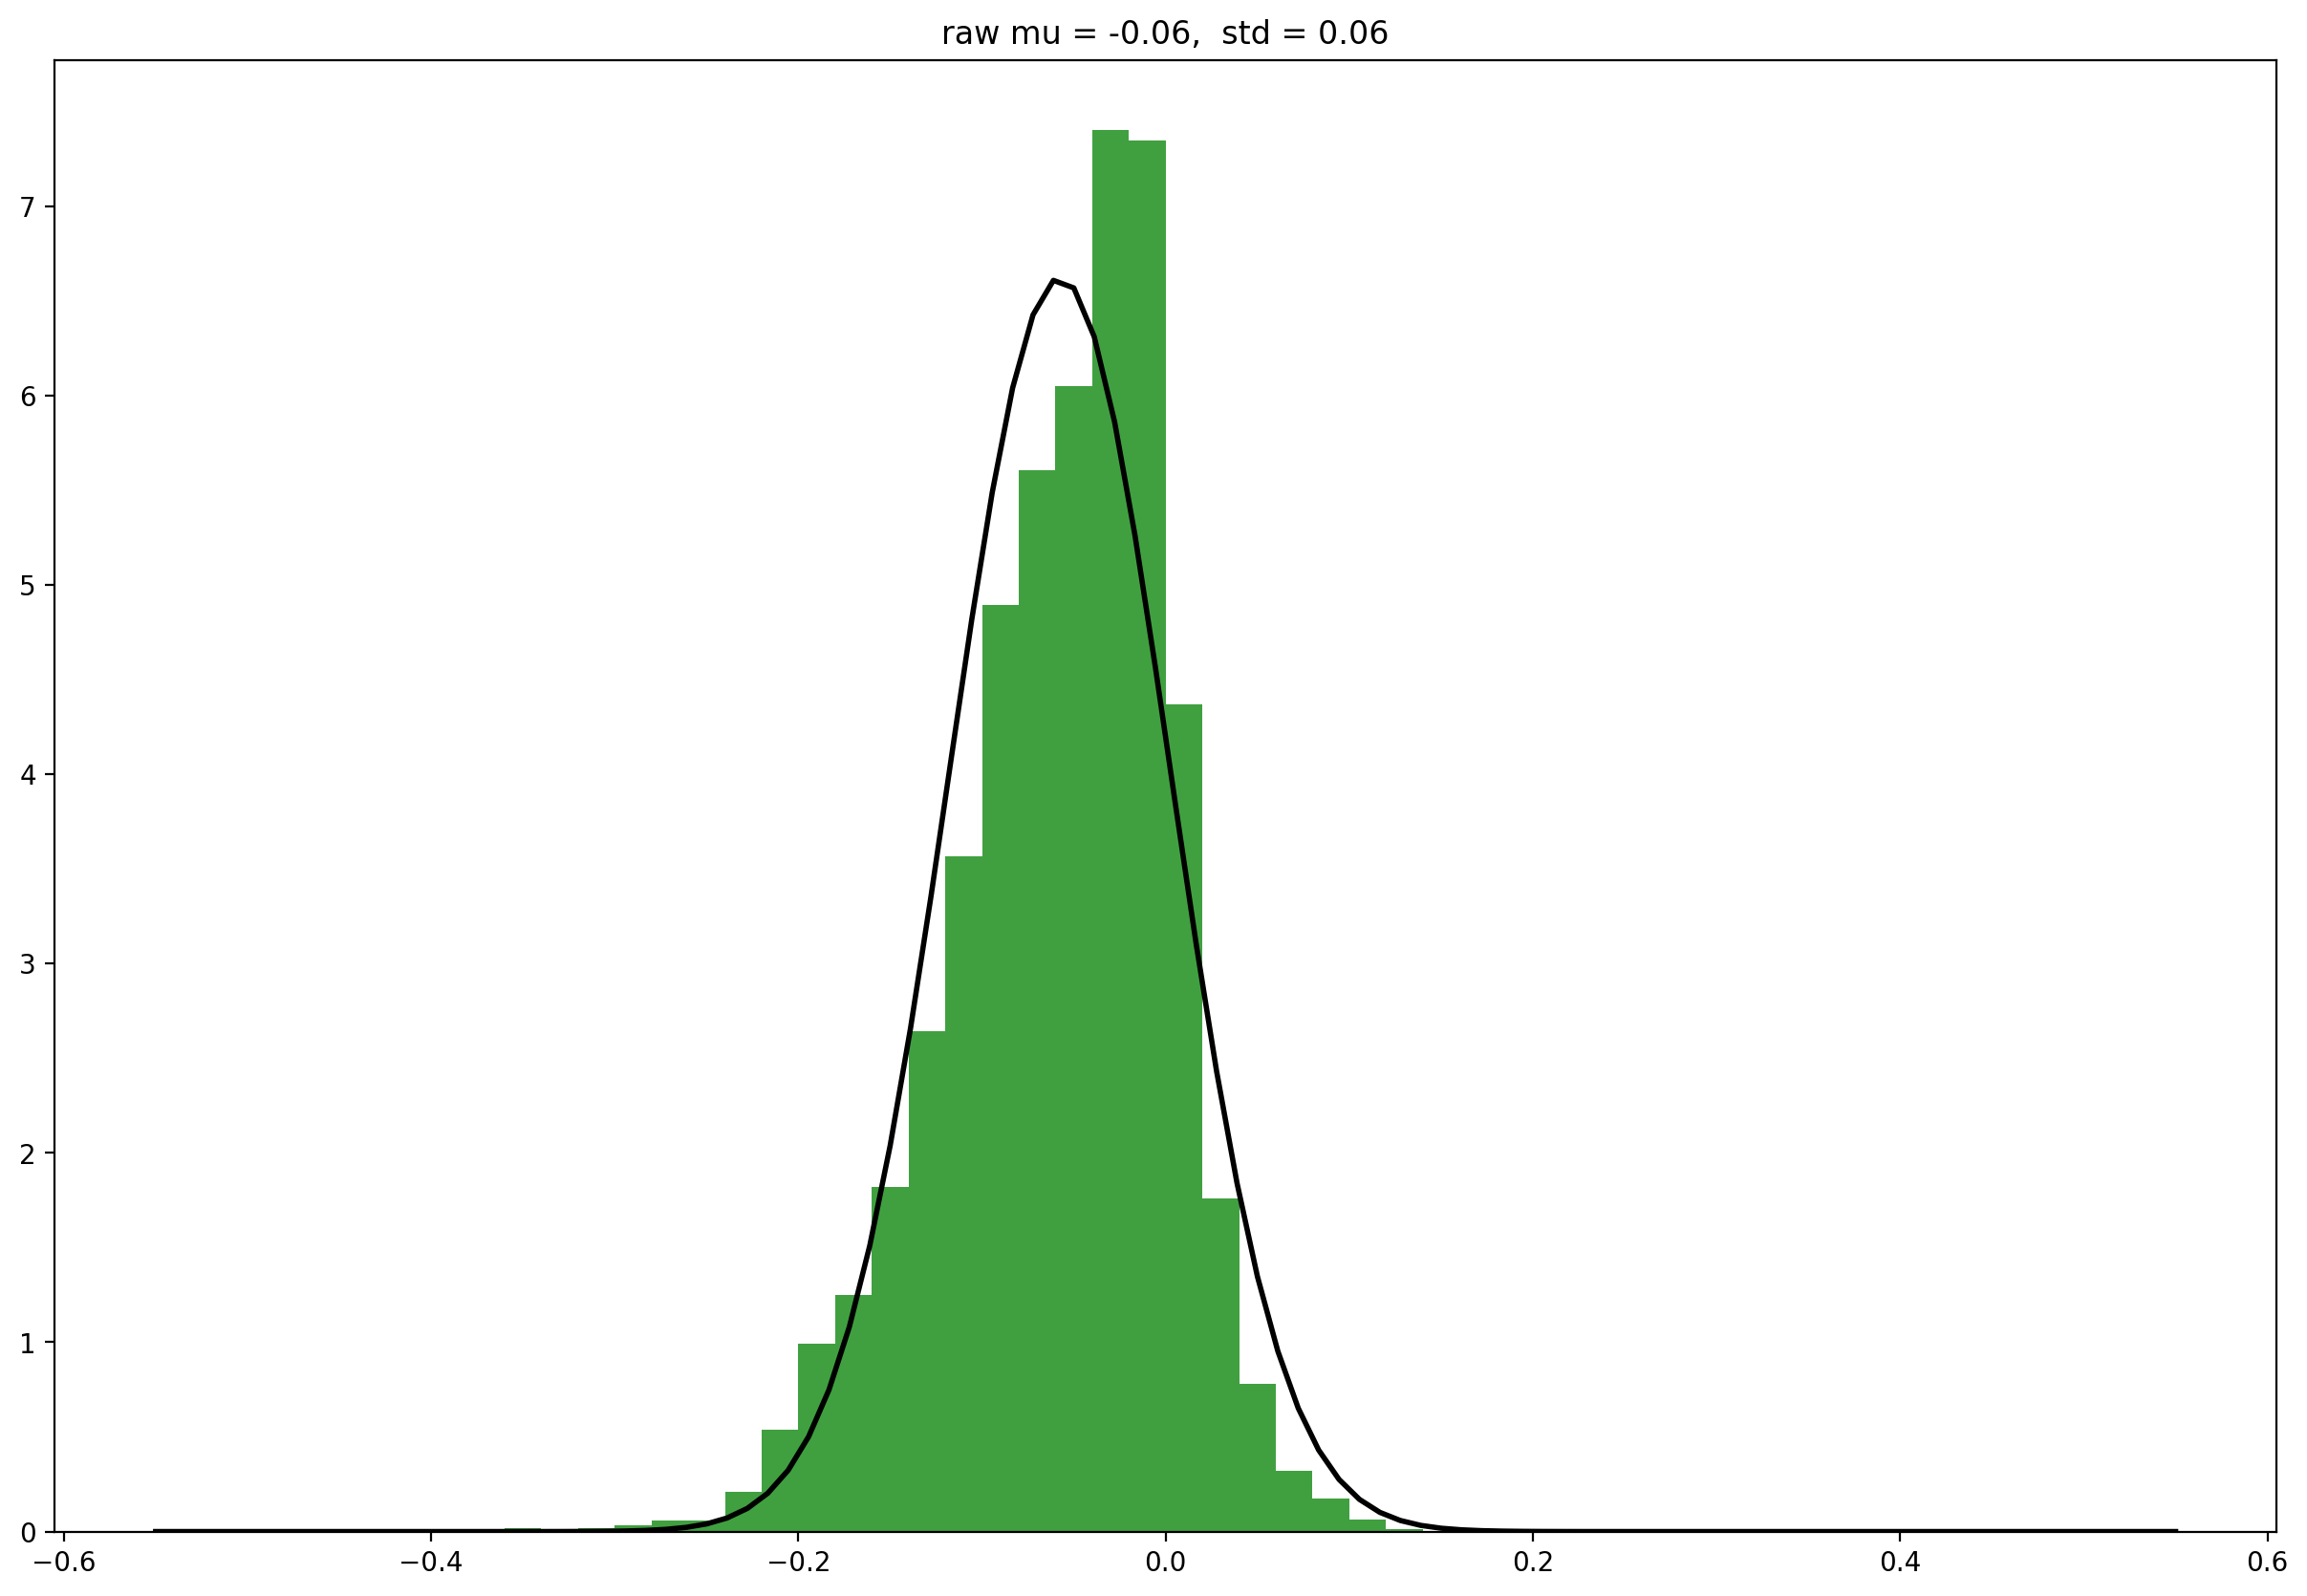

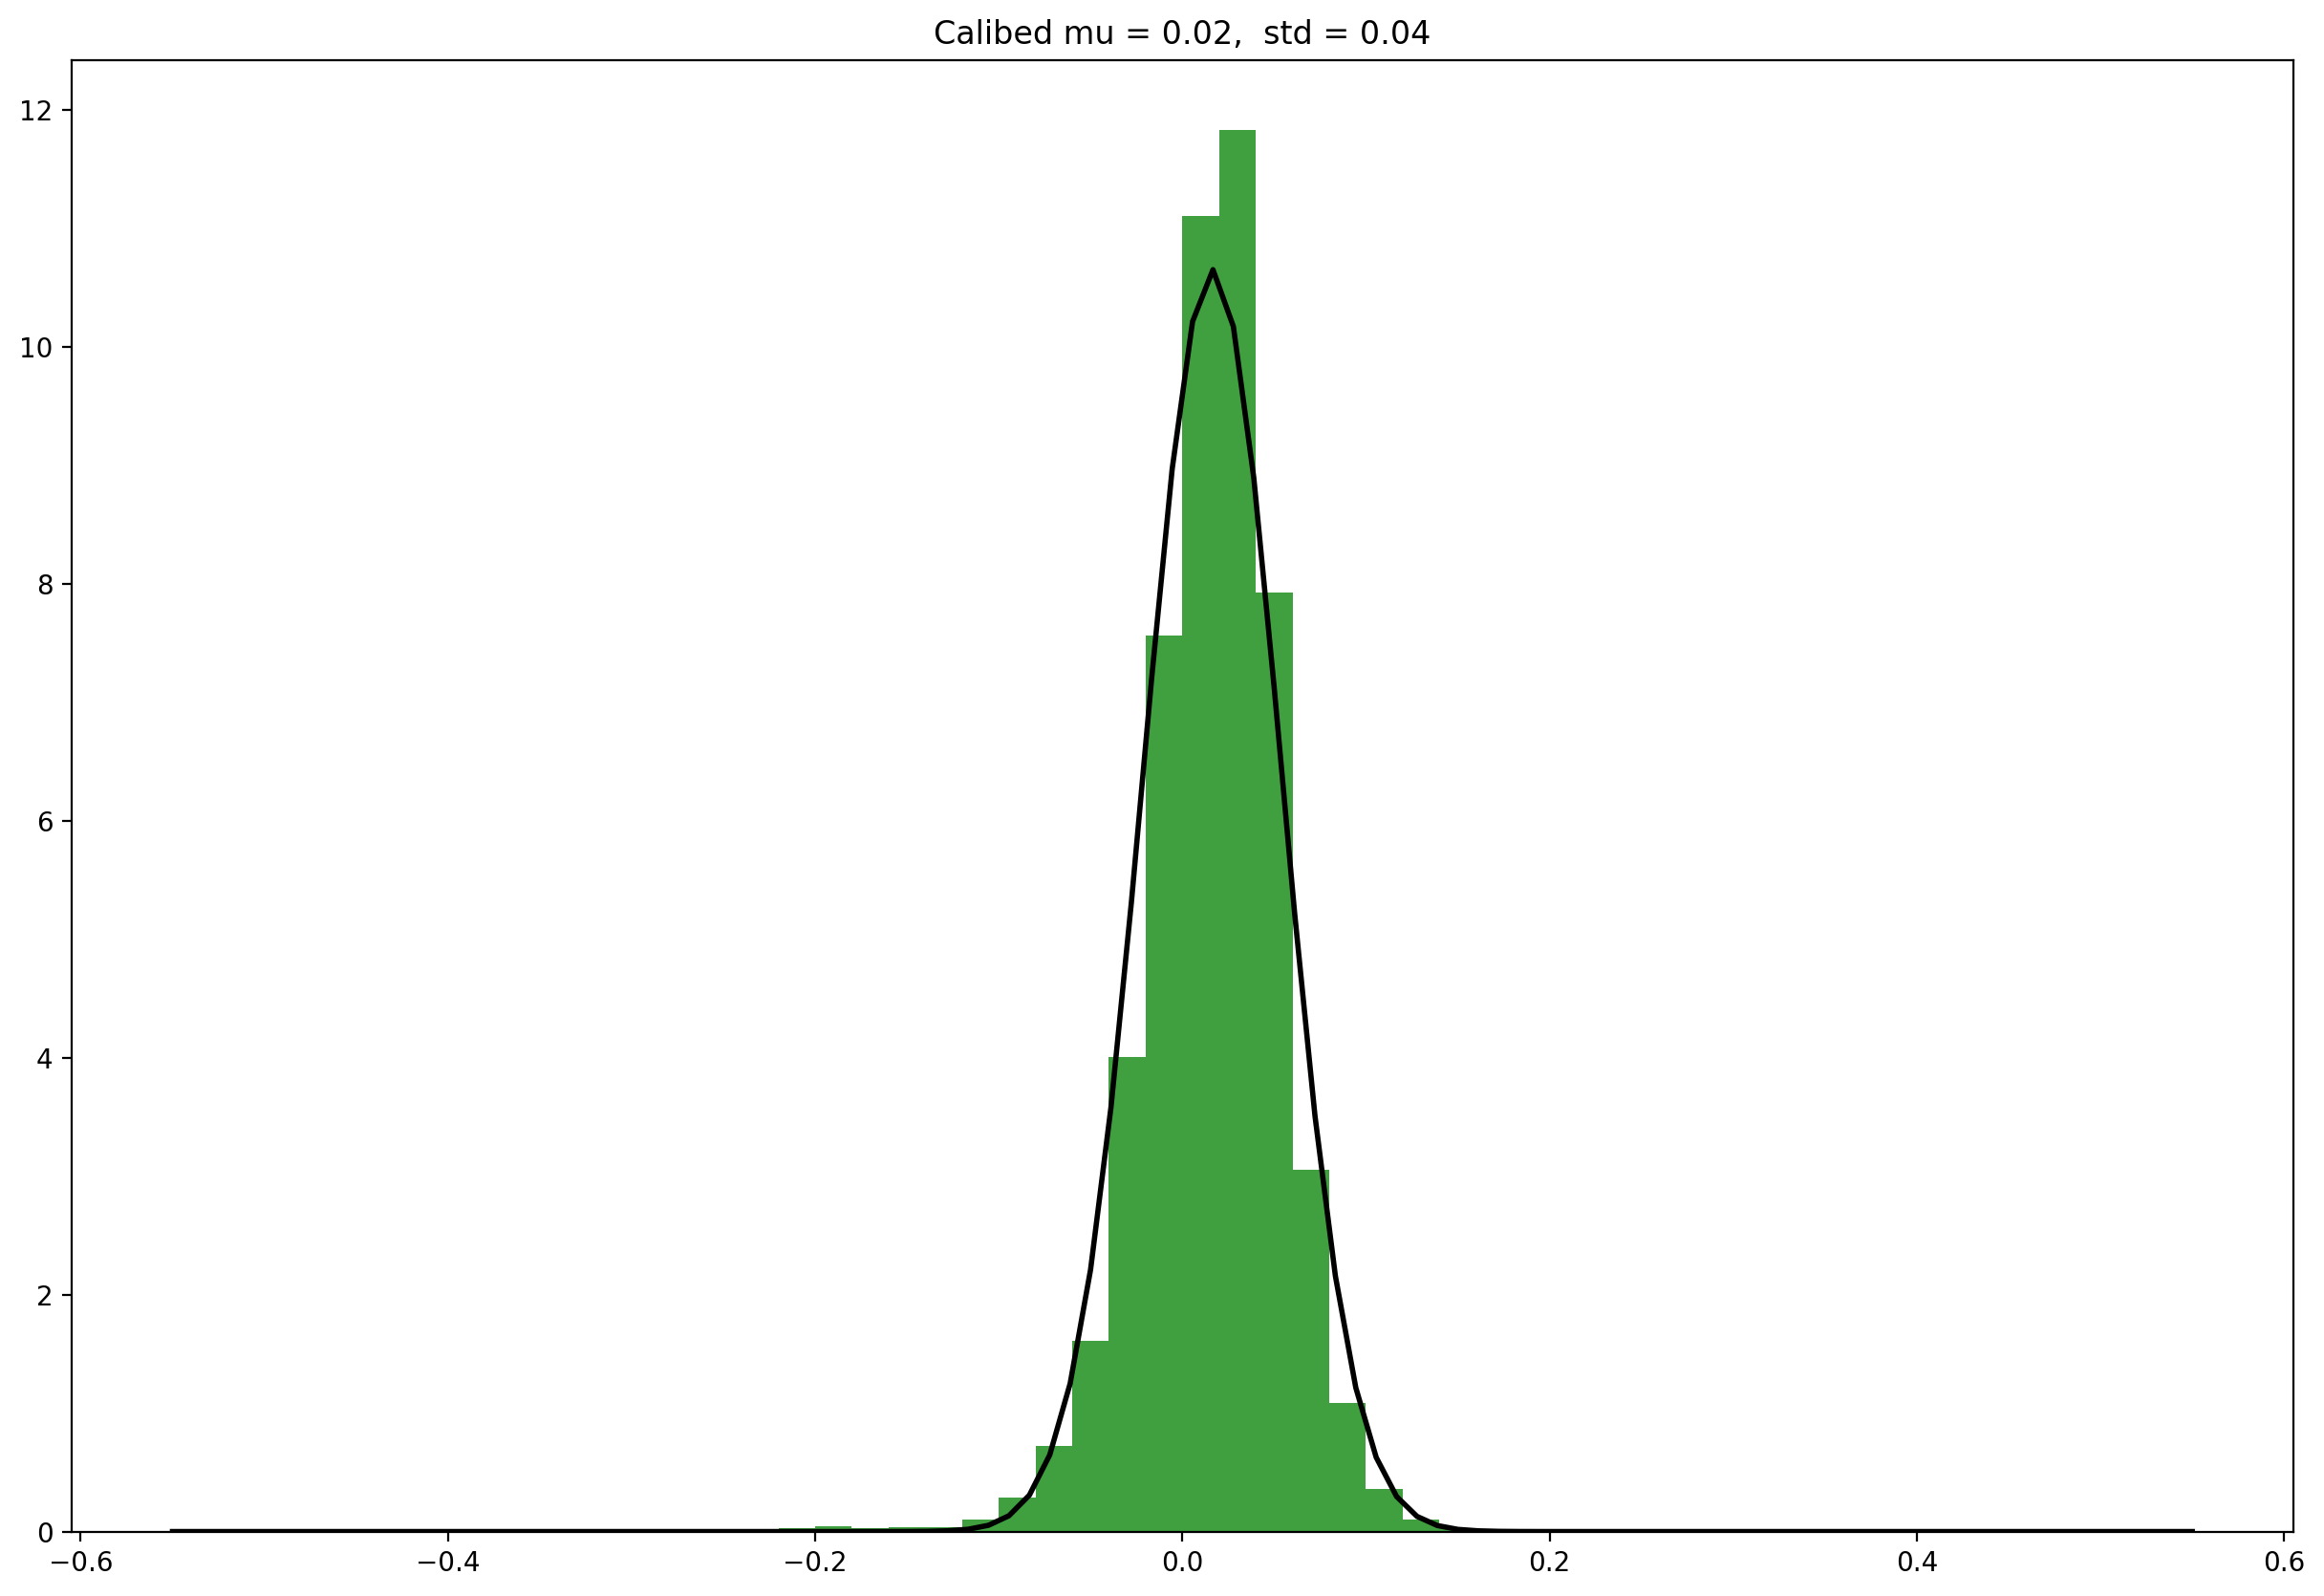

In [7]:
plt.close("all") 
distances = read_distances_swarm_frame(bag, "/swarm_drones/swarm_frame", t0)
calib = {
    4: [ 0.9499422747931782, 0.002876024957717875]
}
#plot_distance_err(poses, poses_fused, distances, main_id, nodes, is_show=True)
plot_distance_err(poses, poses_fused, distances, main_id, nodes,  calib=calib, is_show=True)


Final drift 1 VIO 1.99m 4.2% Fused 2.00m 4.2% total_len 47.8m
Final drift 4 VIO 1.31m 3.0% Fused 1.37m 3.1% total_len 44.1m
RMSE of pos: 0.0955225242221936
RMSE of rot: 2.434751953912051
RMSE of pos: 0.07164609093047959
RMSE of rot: 1.8138603364056691


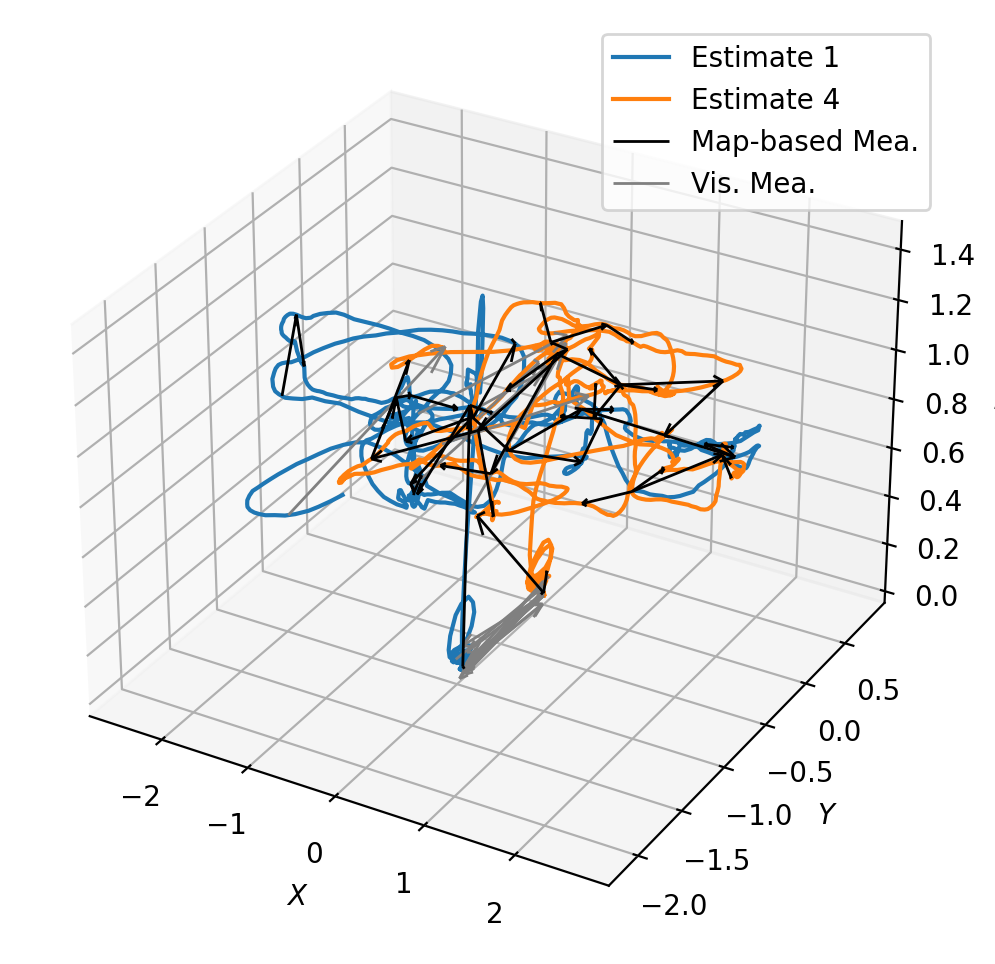

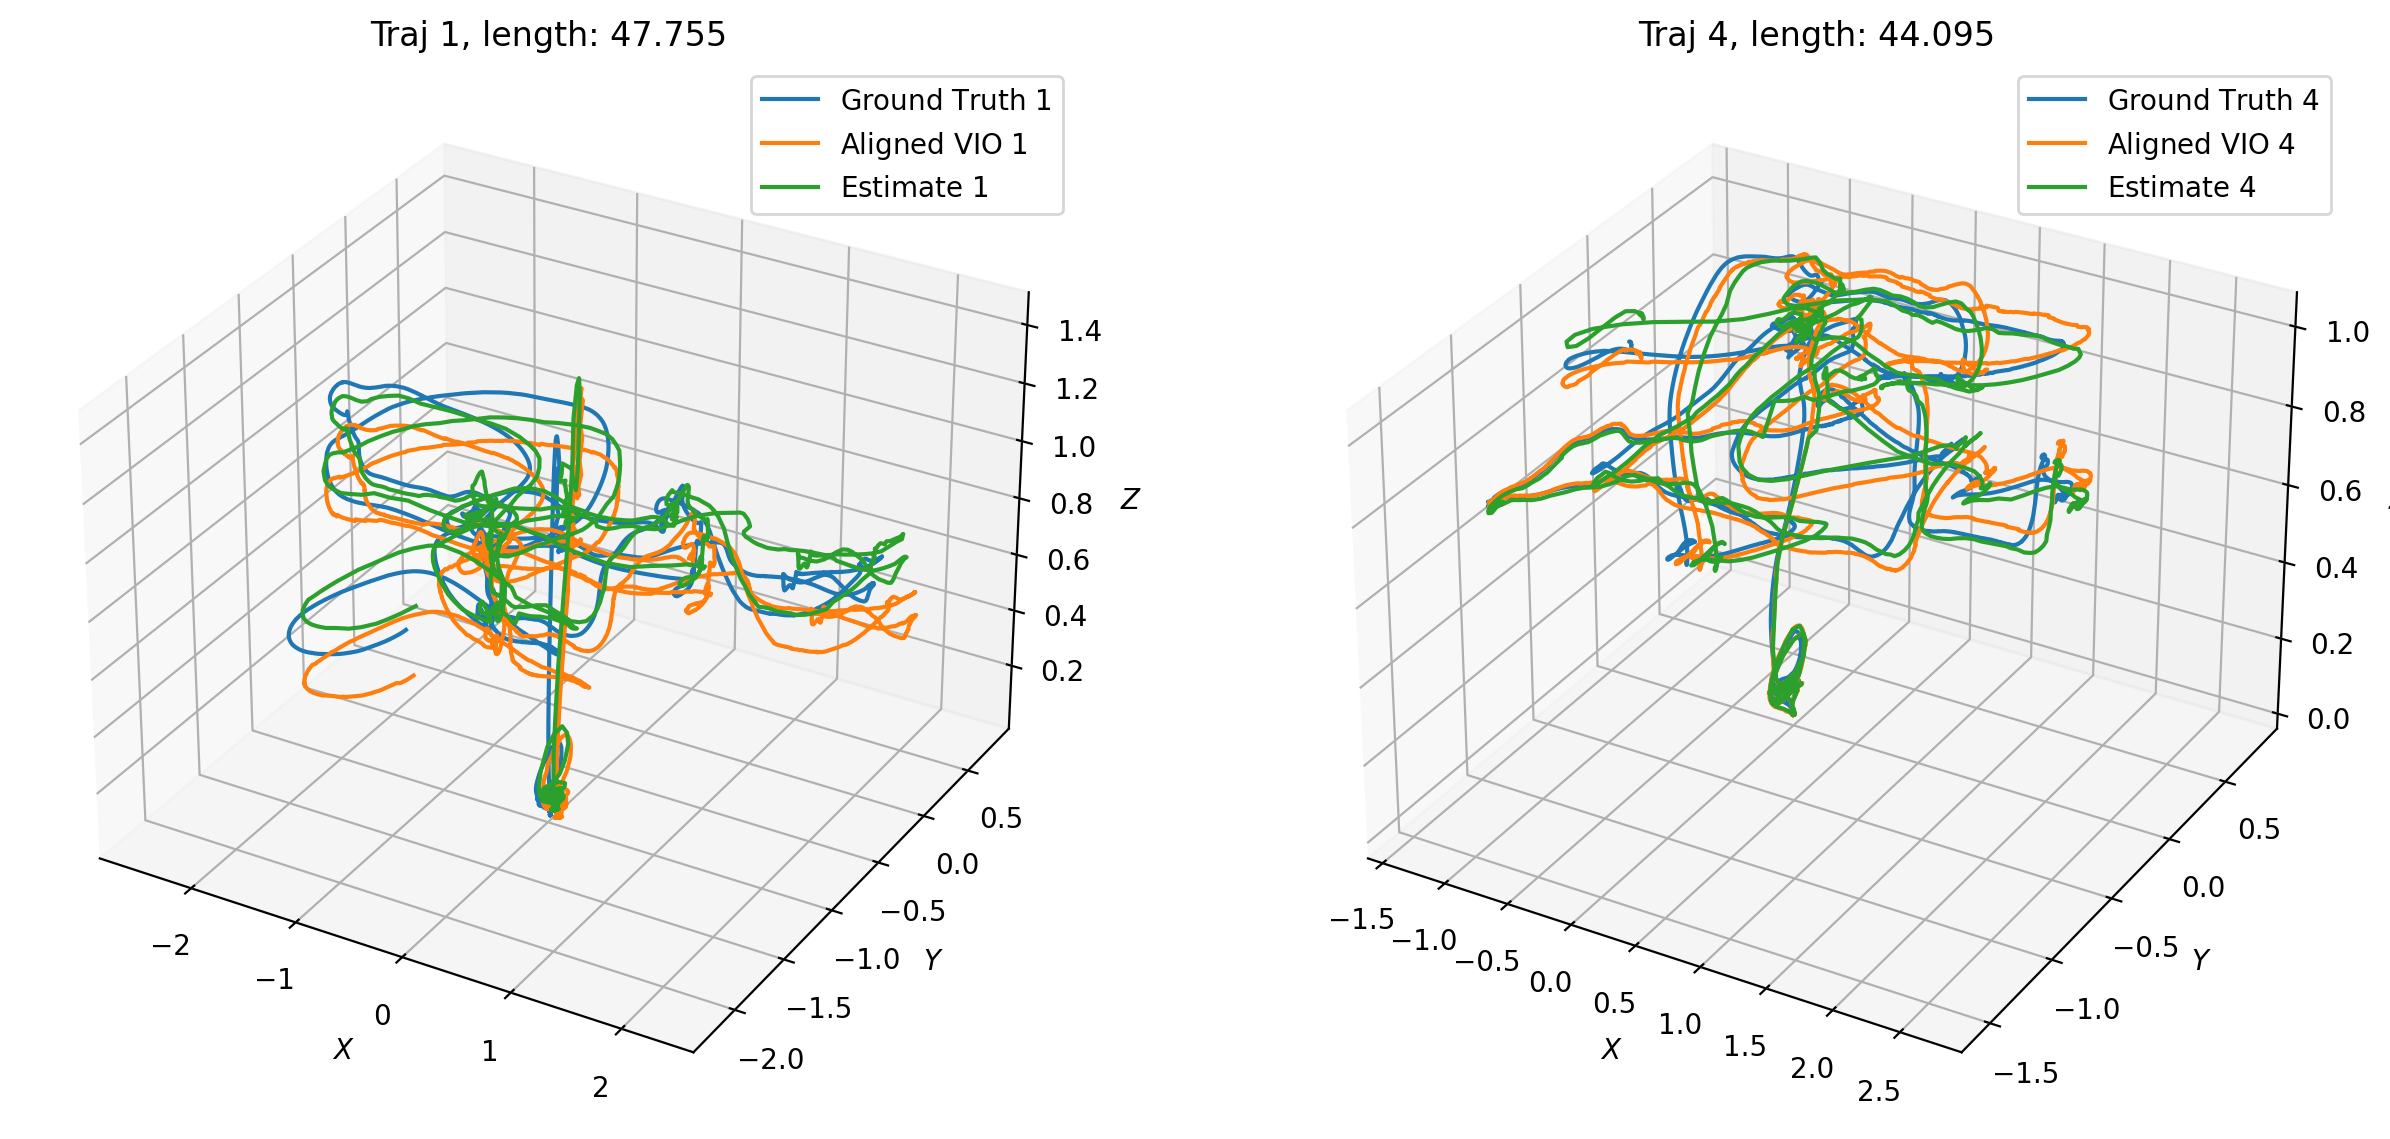

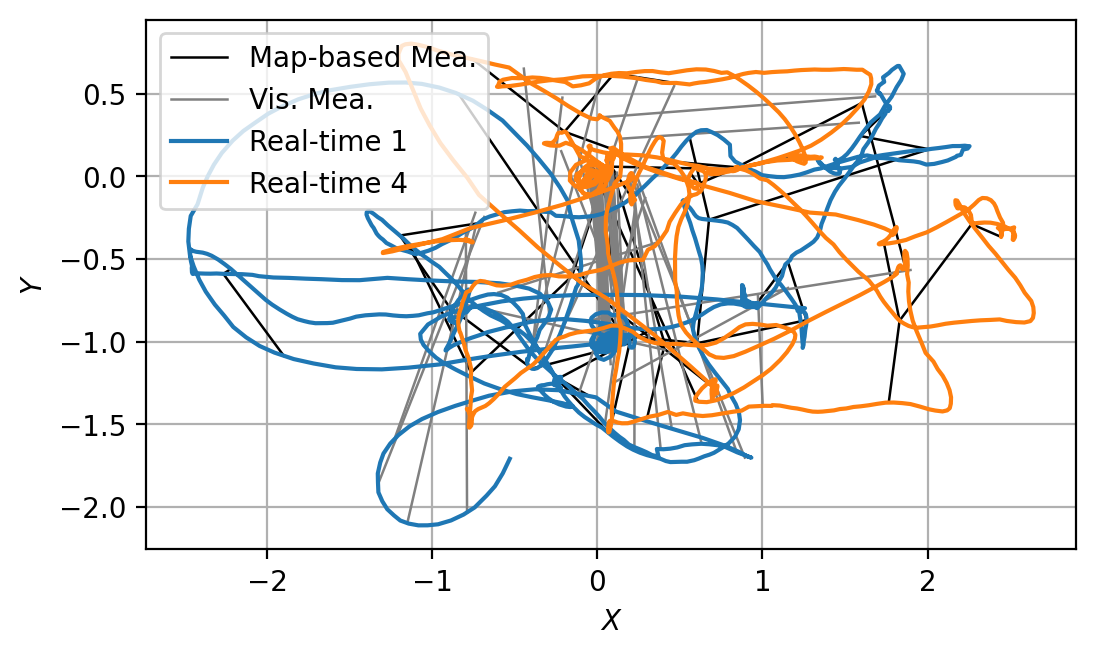

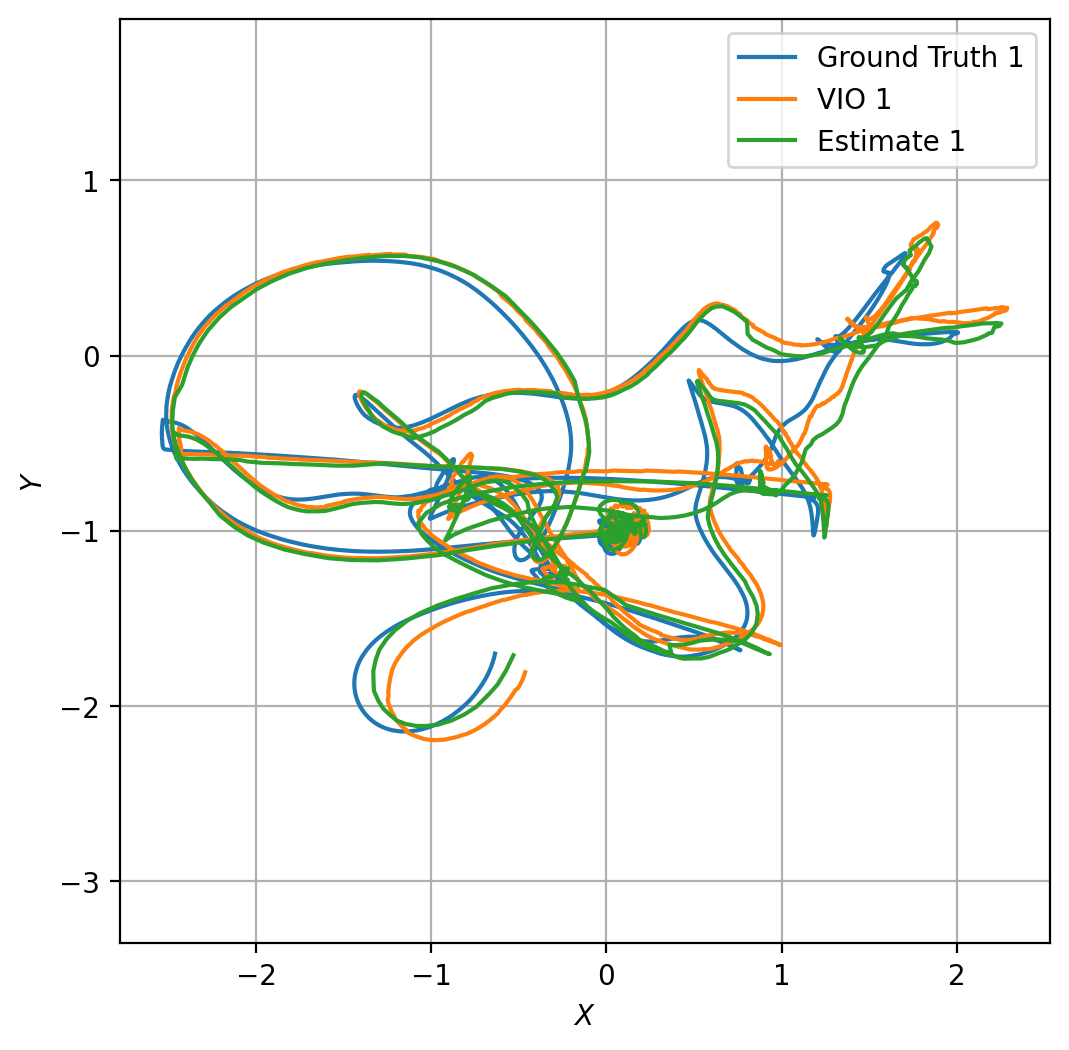

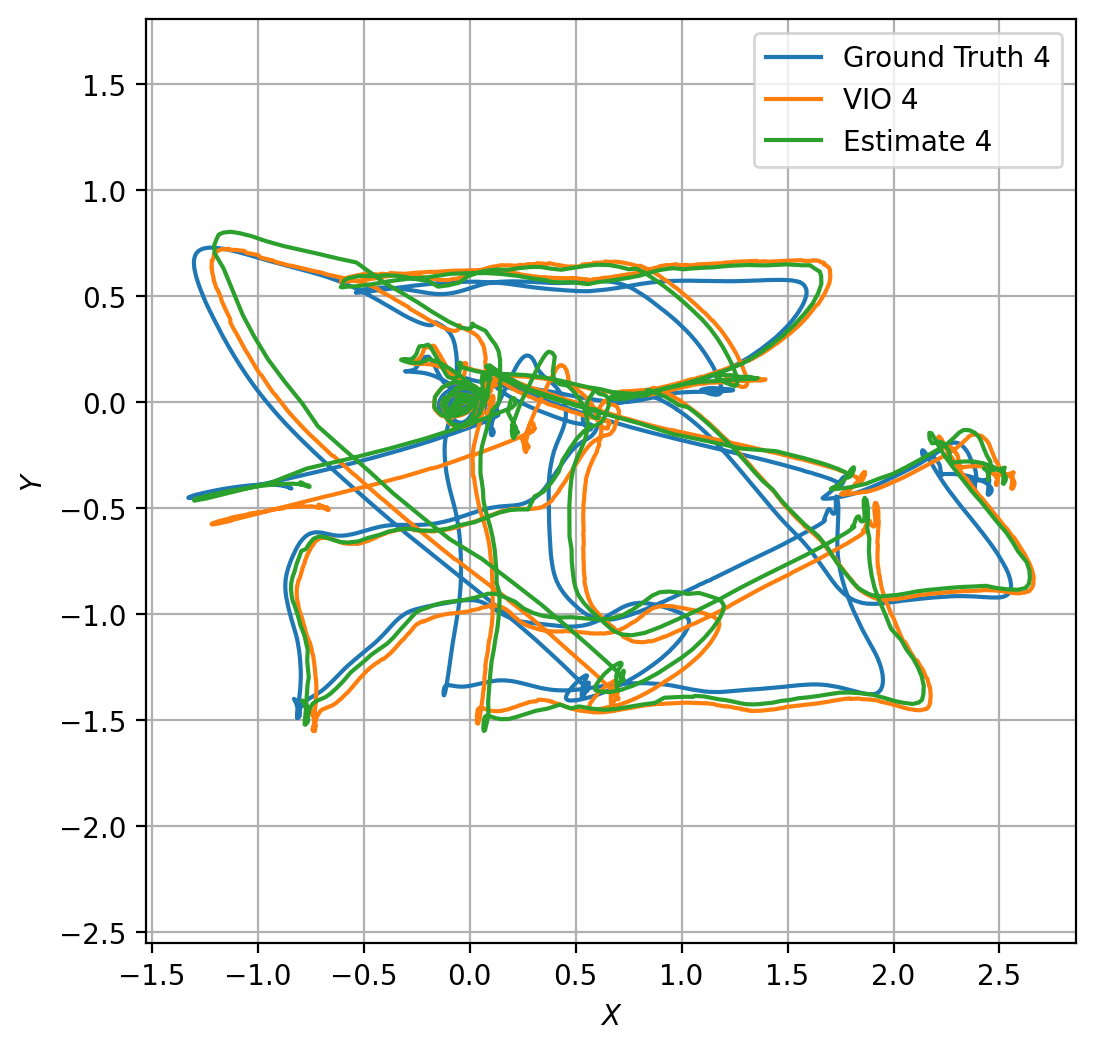

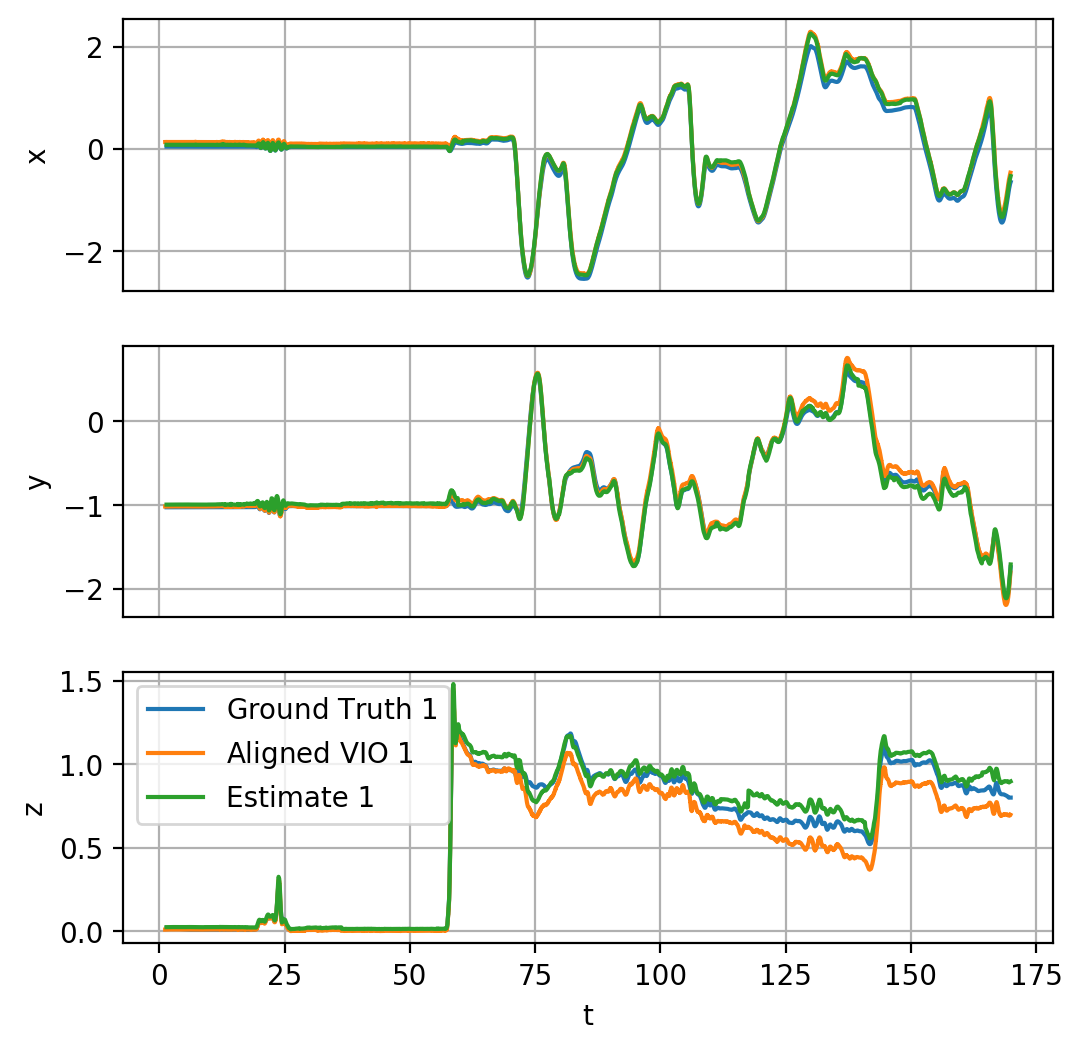

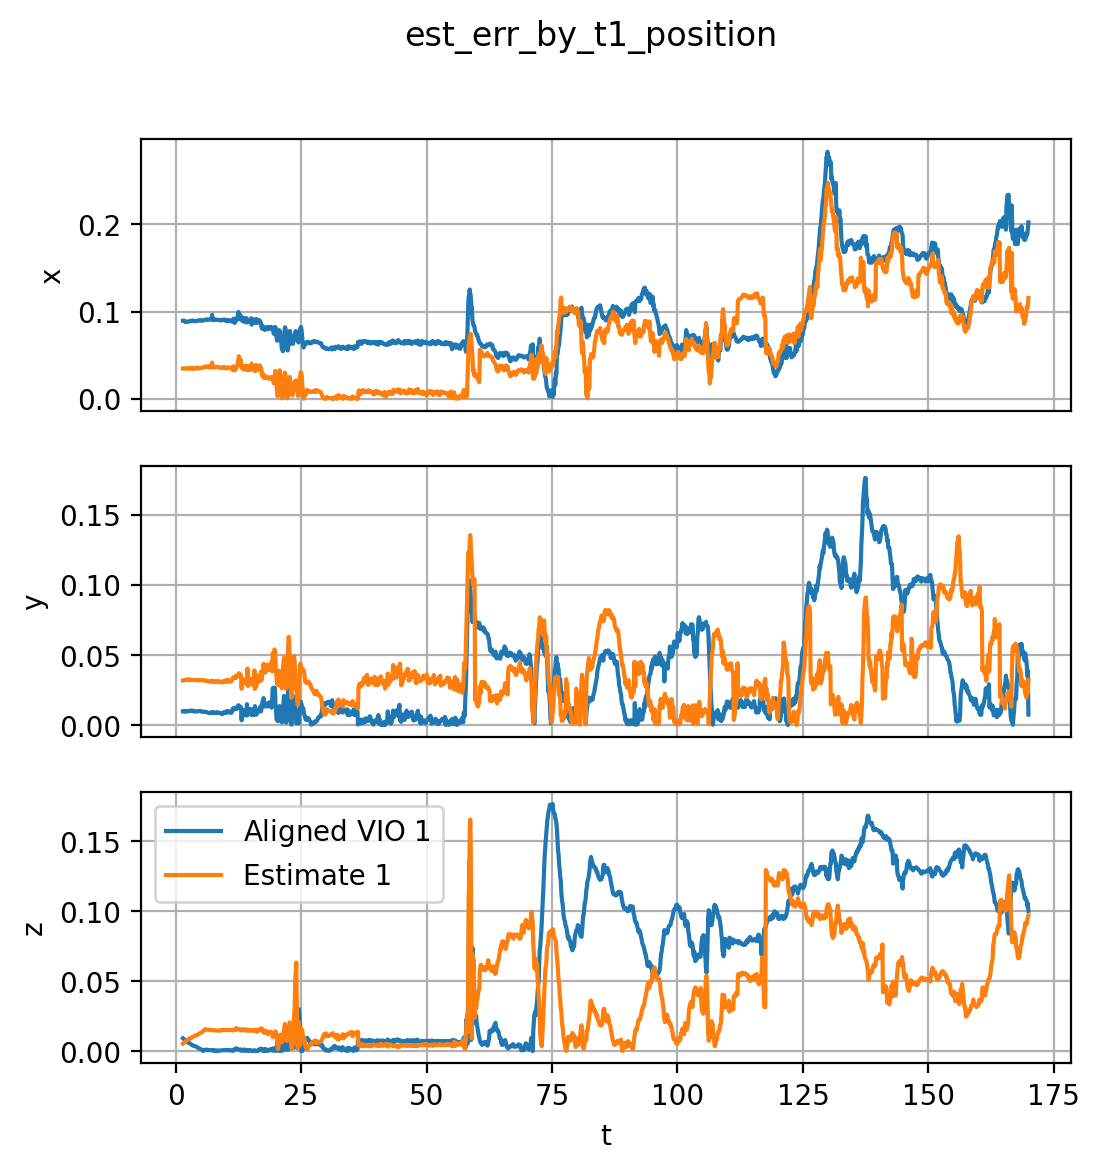

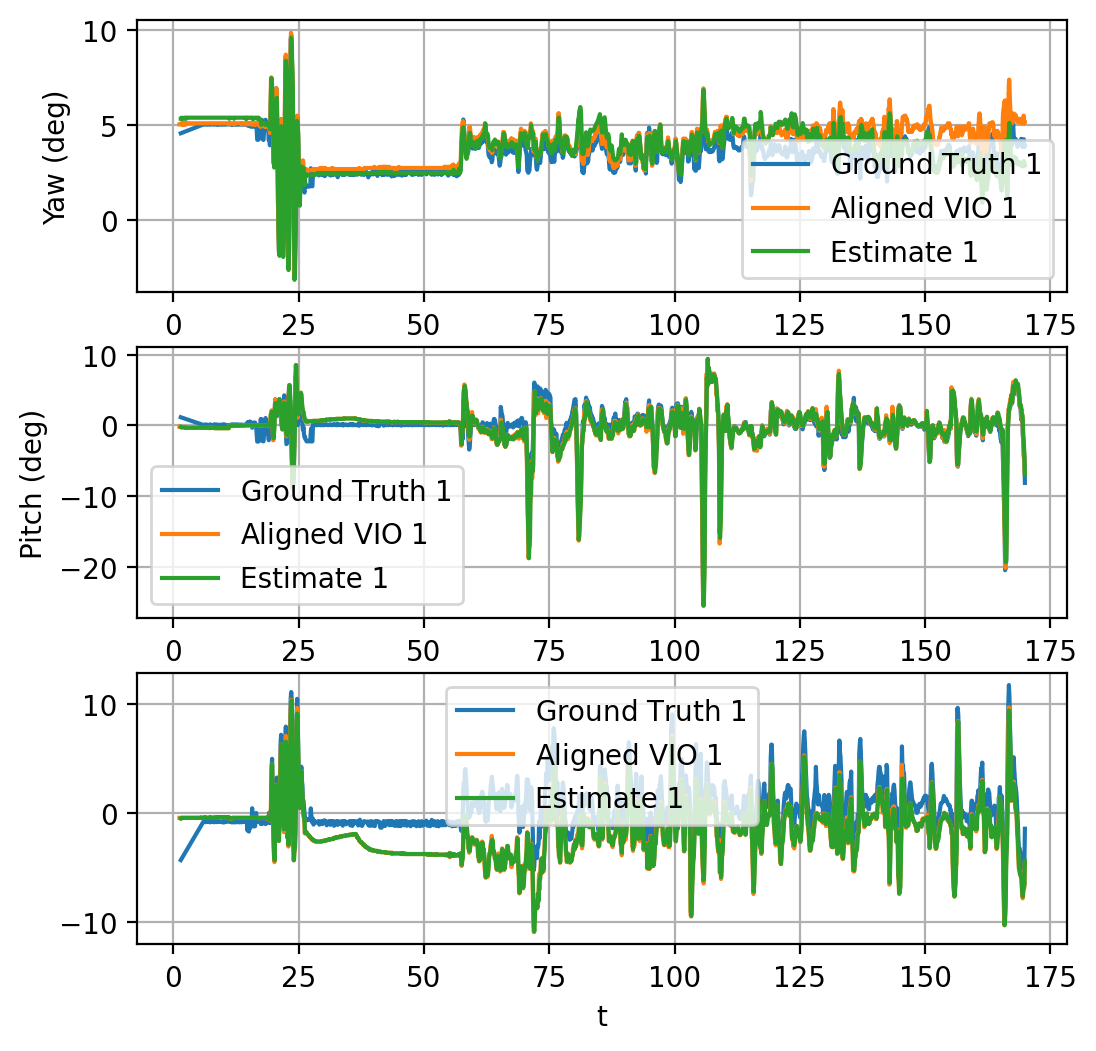

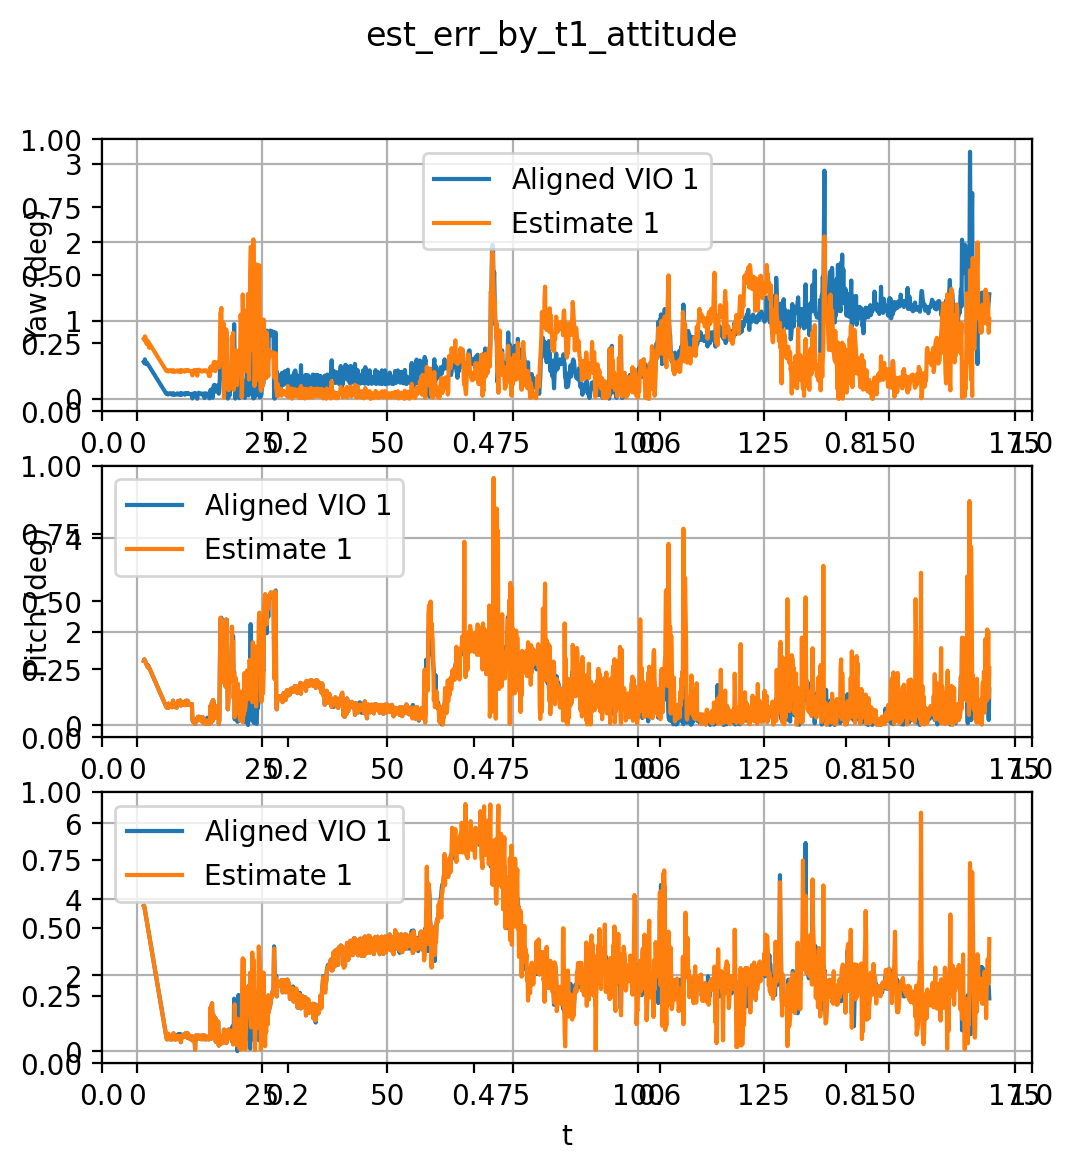

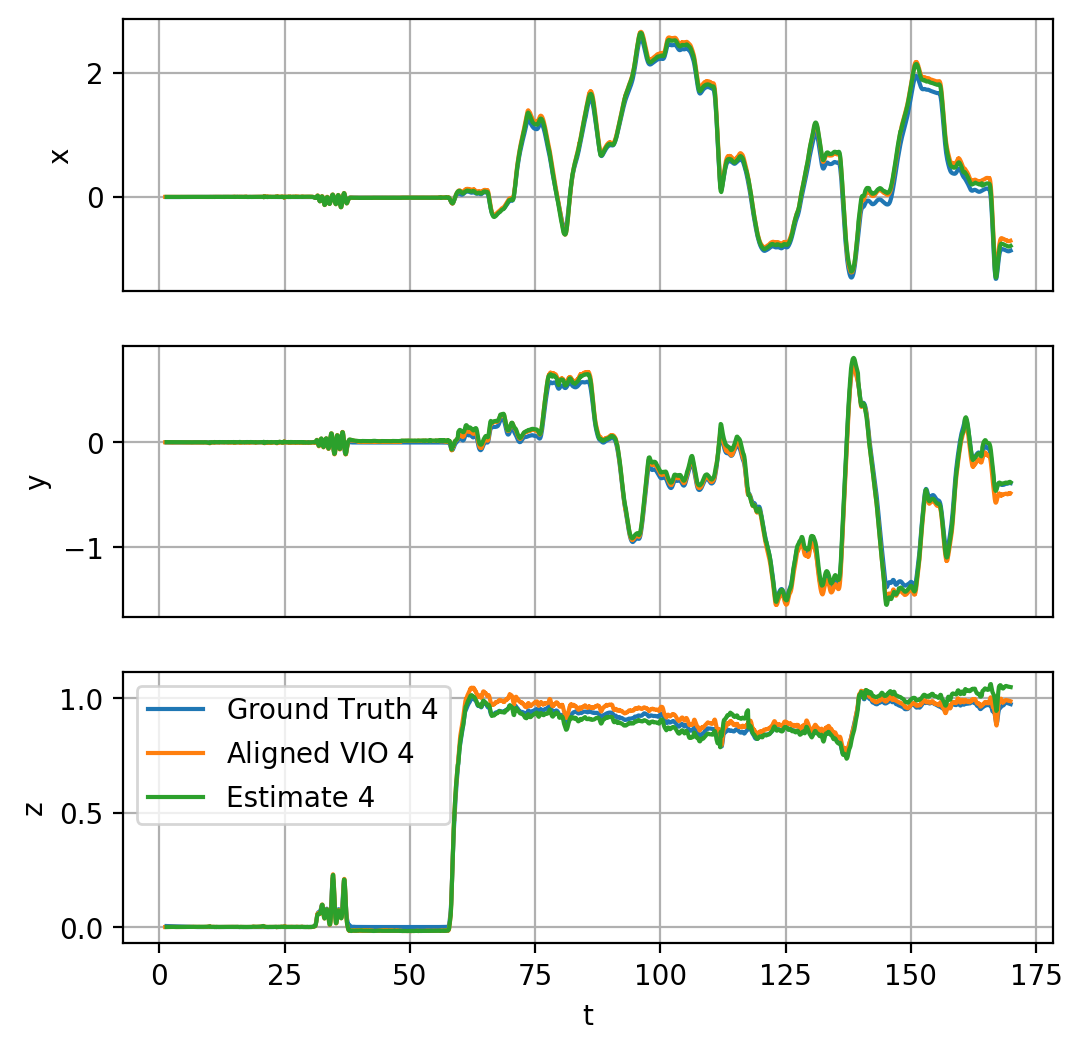

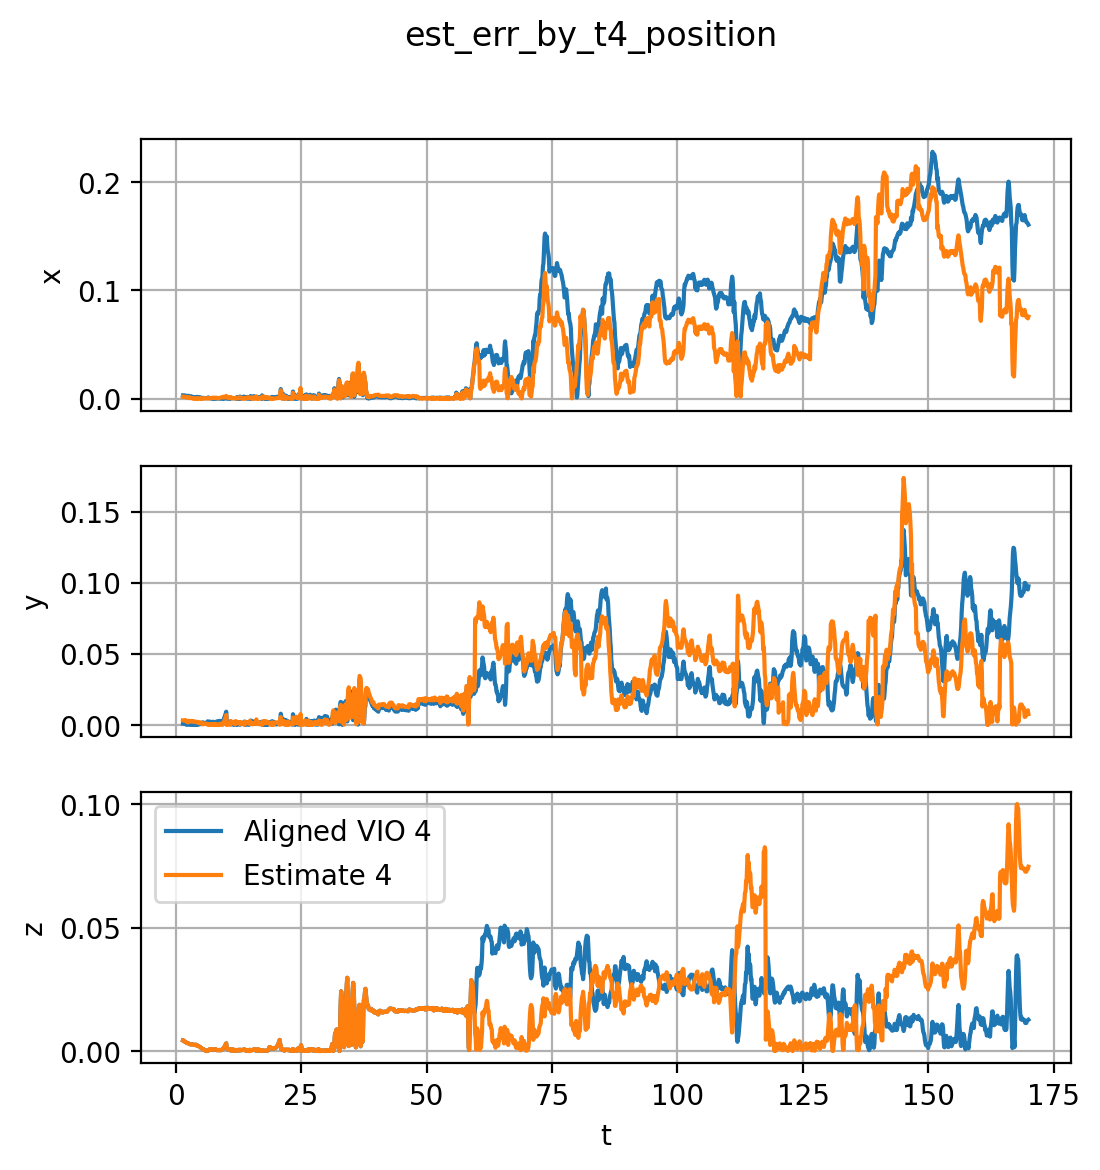

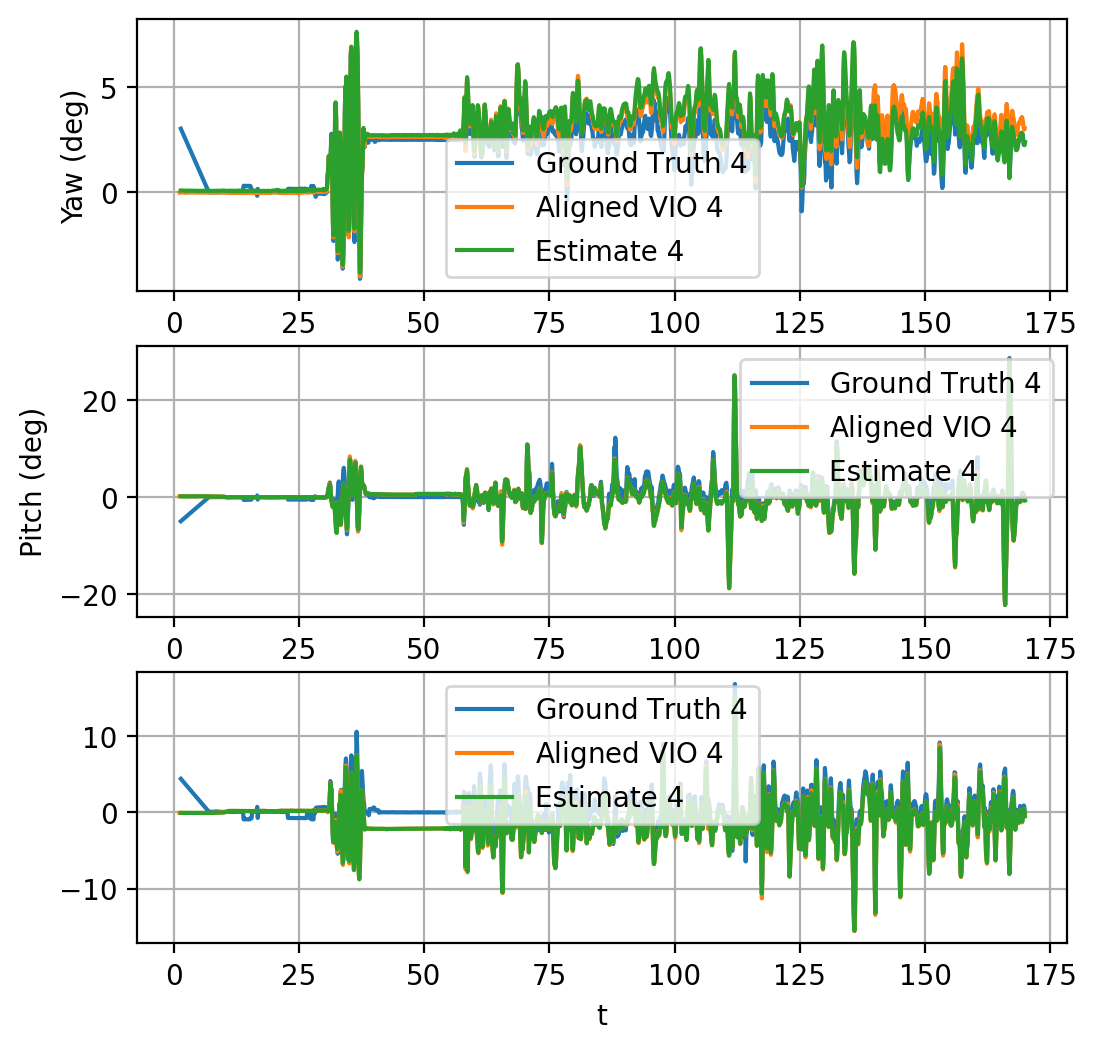

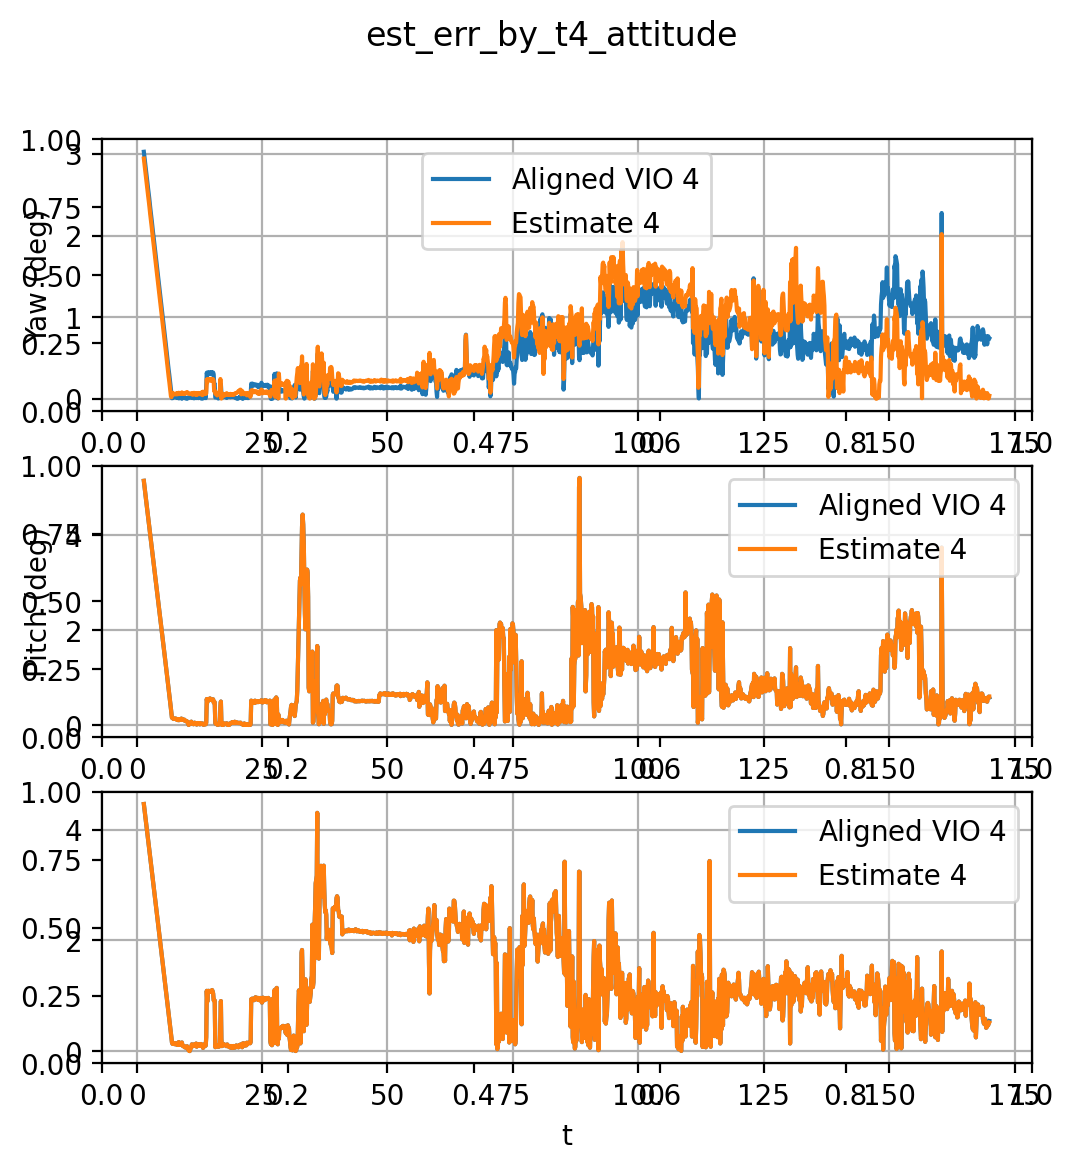

In [33]:
plt.close("all")
plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes, groundtruth = True, use_offline=False, output_path="/home/d/Workspace/Omni-swarm_ws/src/Omni-swarm-pinhole_compatiable/Omni-swarm/swarm_localization/DataAnalysis/", id_map = None, figsize=(6, 6), plot_each=True)

Relative Trajectory Statistics
EST RMSE:		POS		YAW	|	BIAS: POS			YAW	|VO	RMSE:	POS		YAW
1->1	0.000,0.000,0.000	0.00°	|0.000,+0.000,+0.000	+0.00°	|	0.000,0.000,0.000	0.0°
1->4	0.041,0.049,0.051	0.78°	|0.017,-0.017,+0.033	-0.19°	|	0.062,0.075,0.105	0.6°


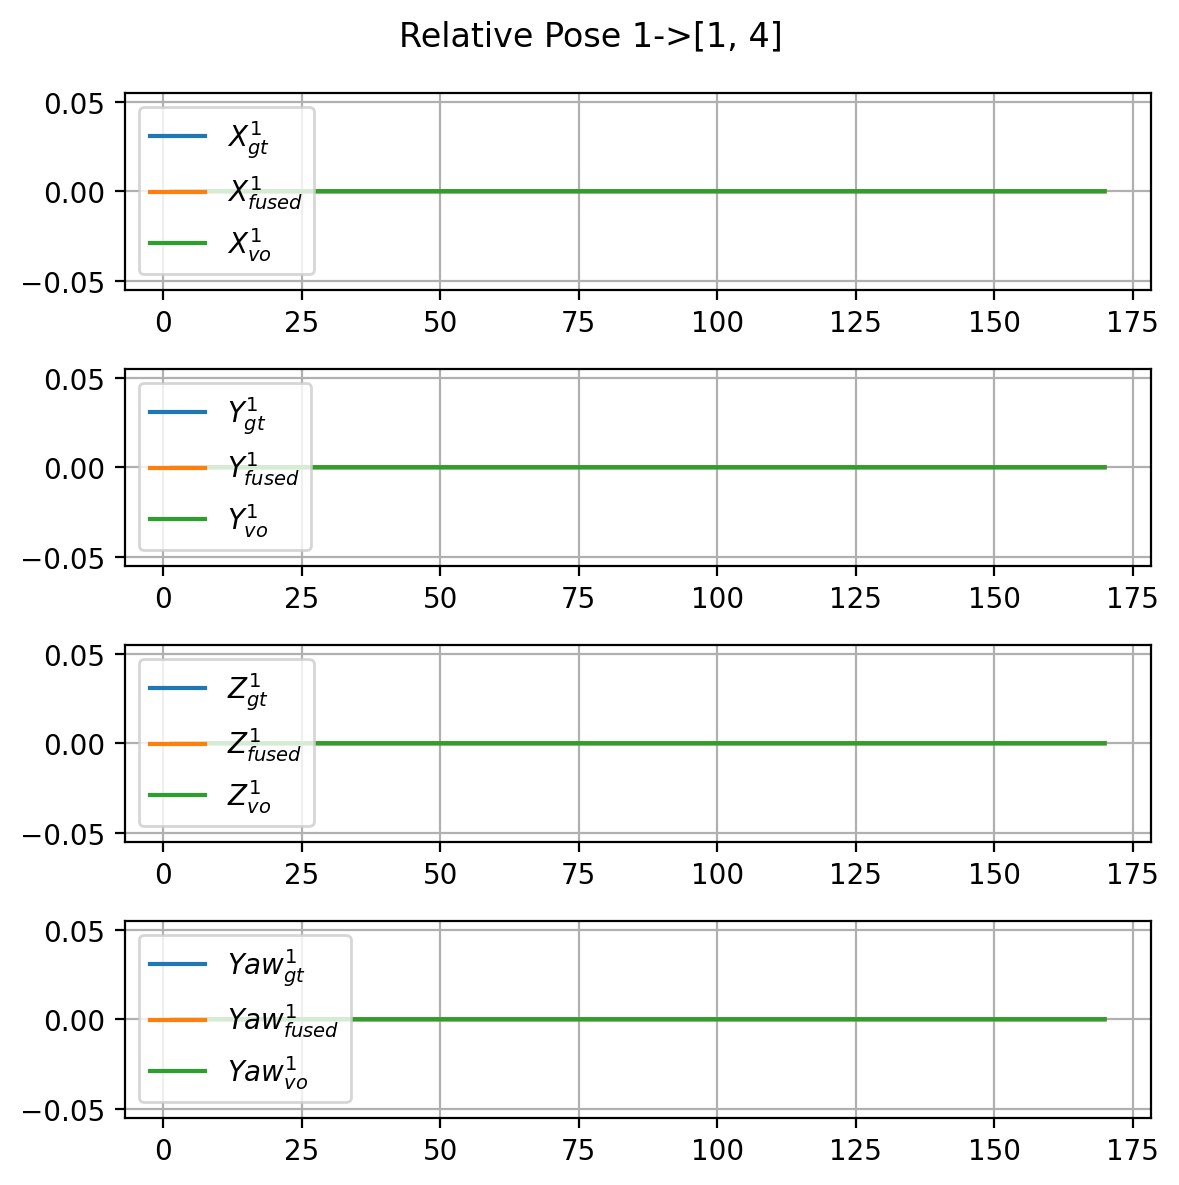

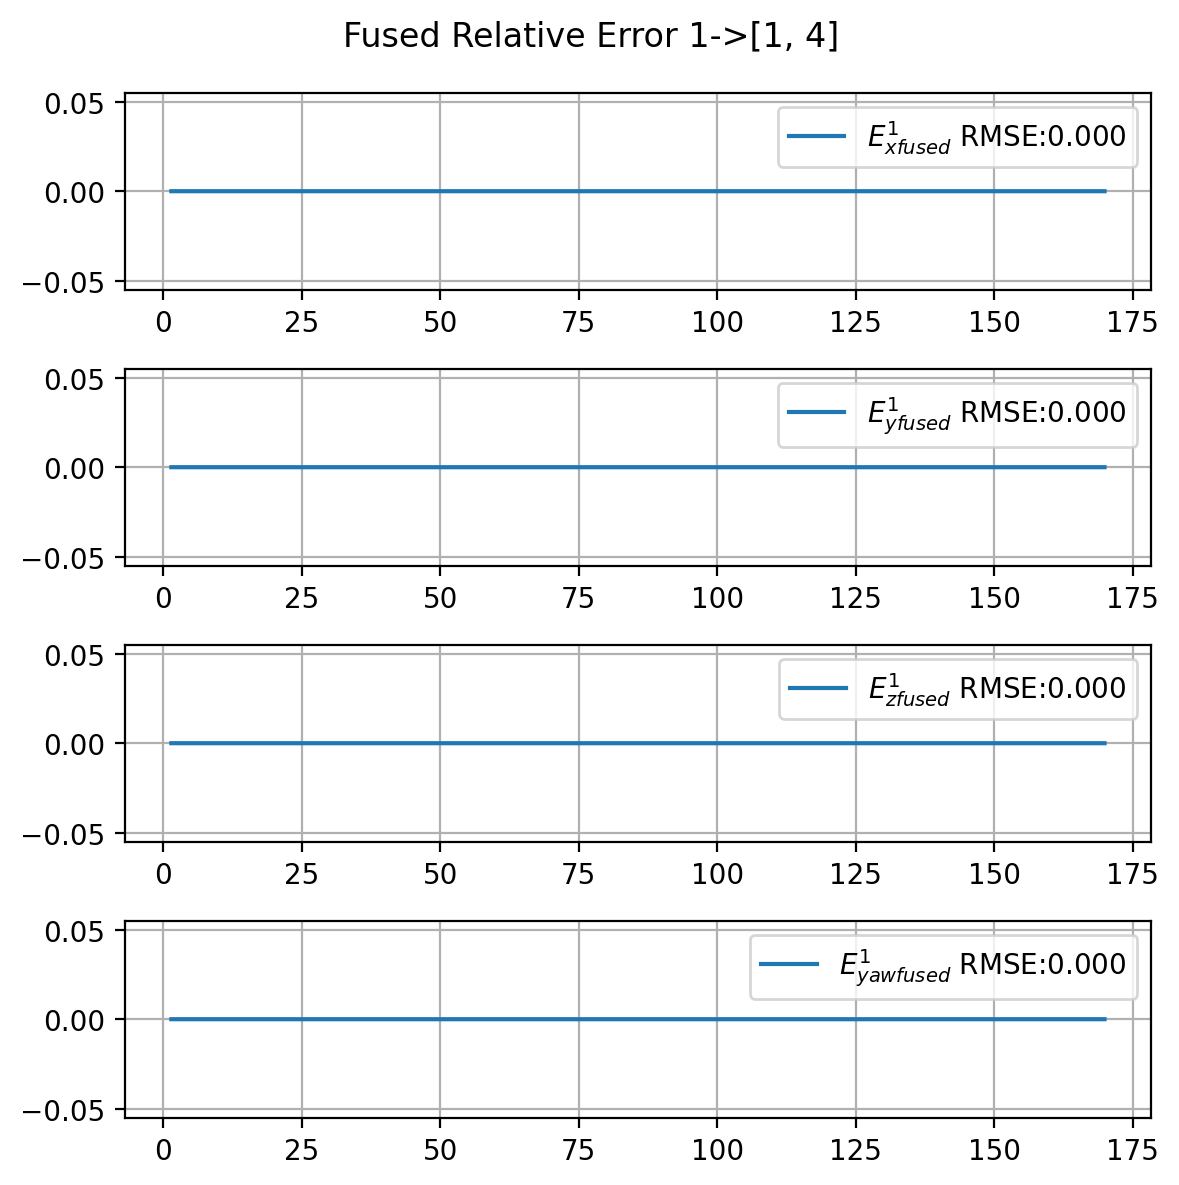

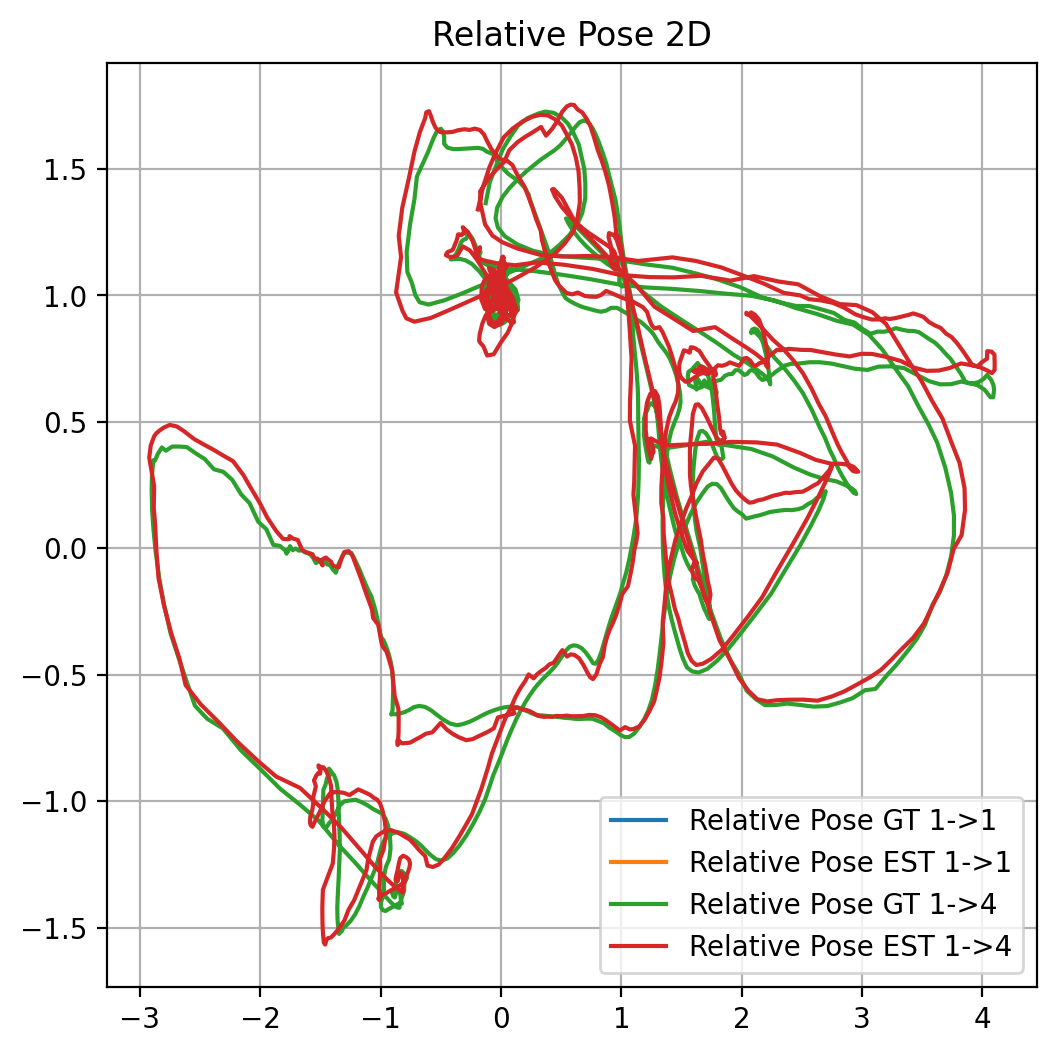

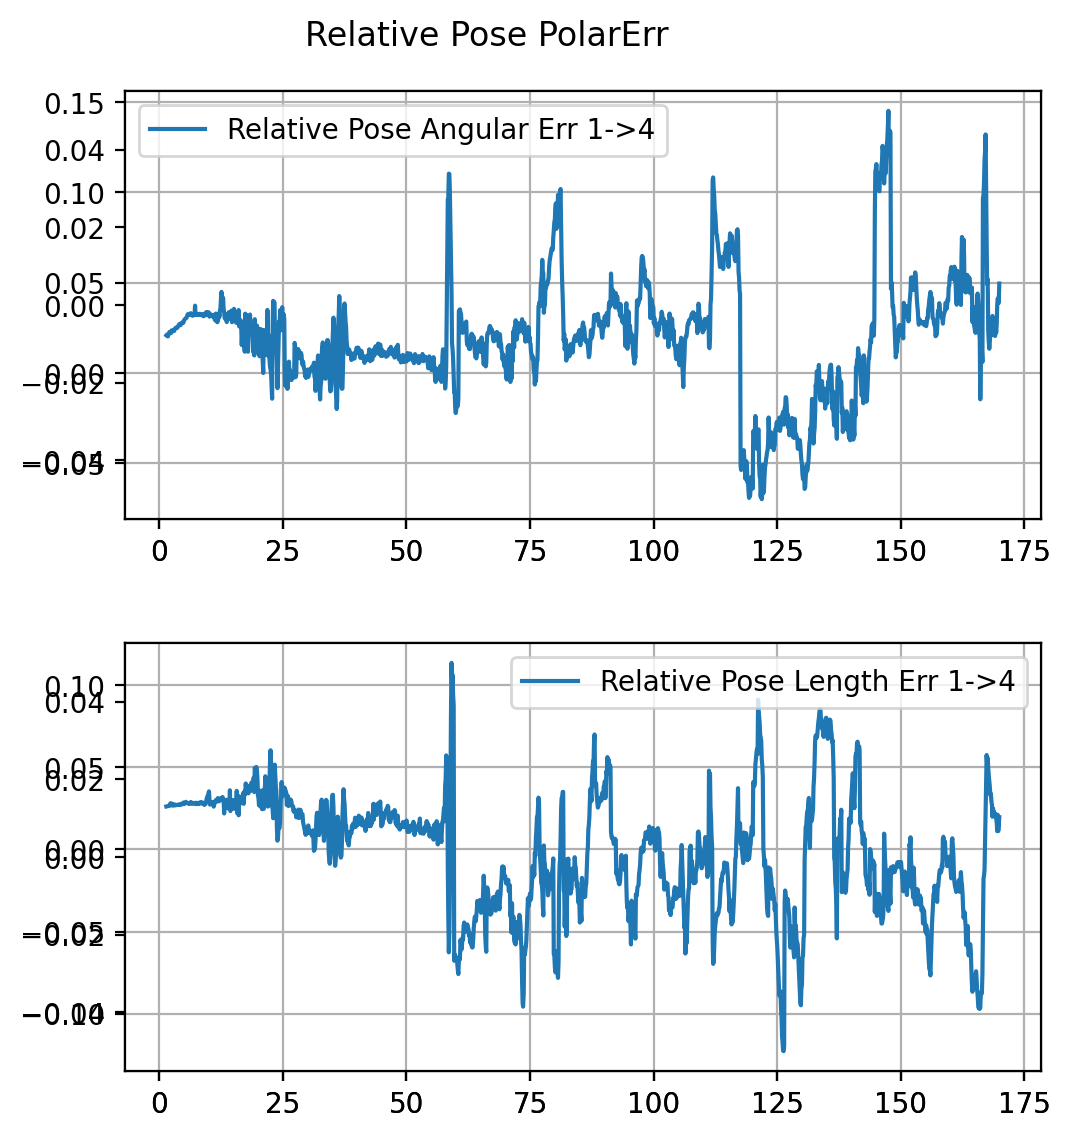

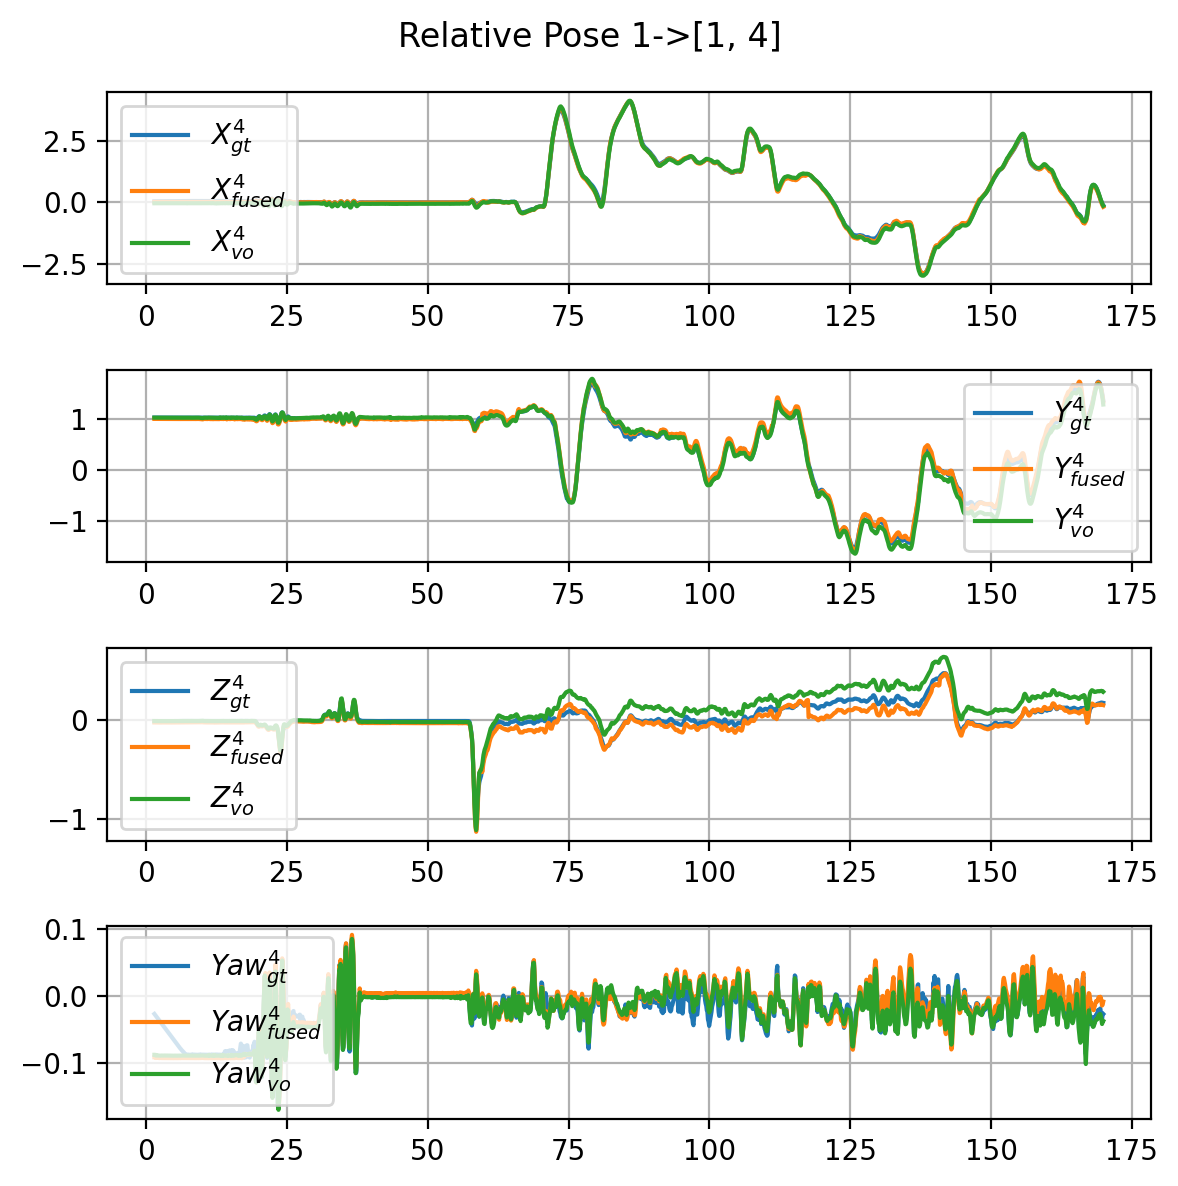

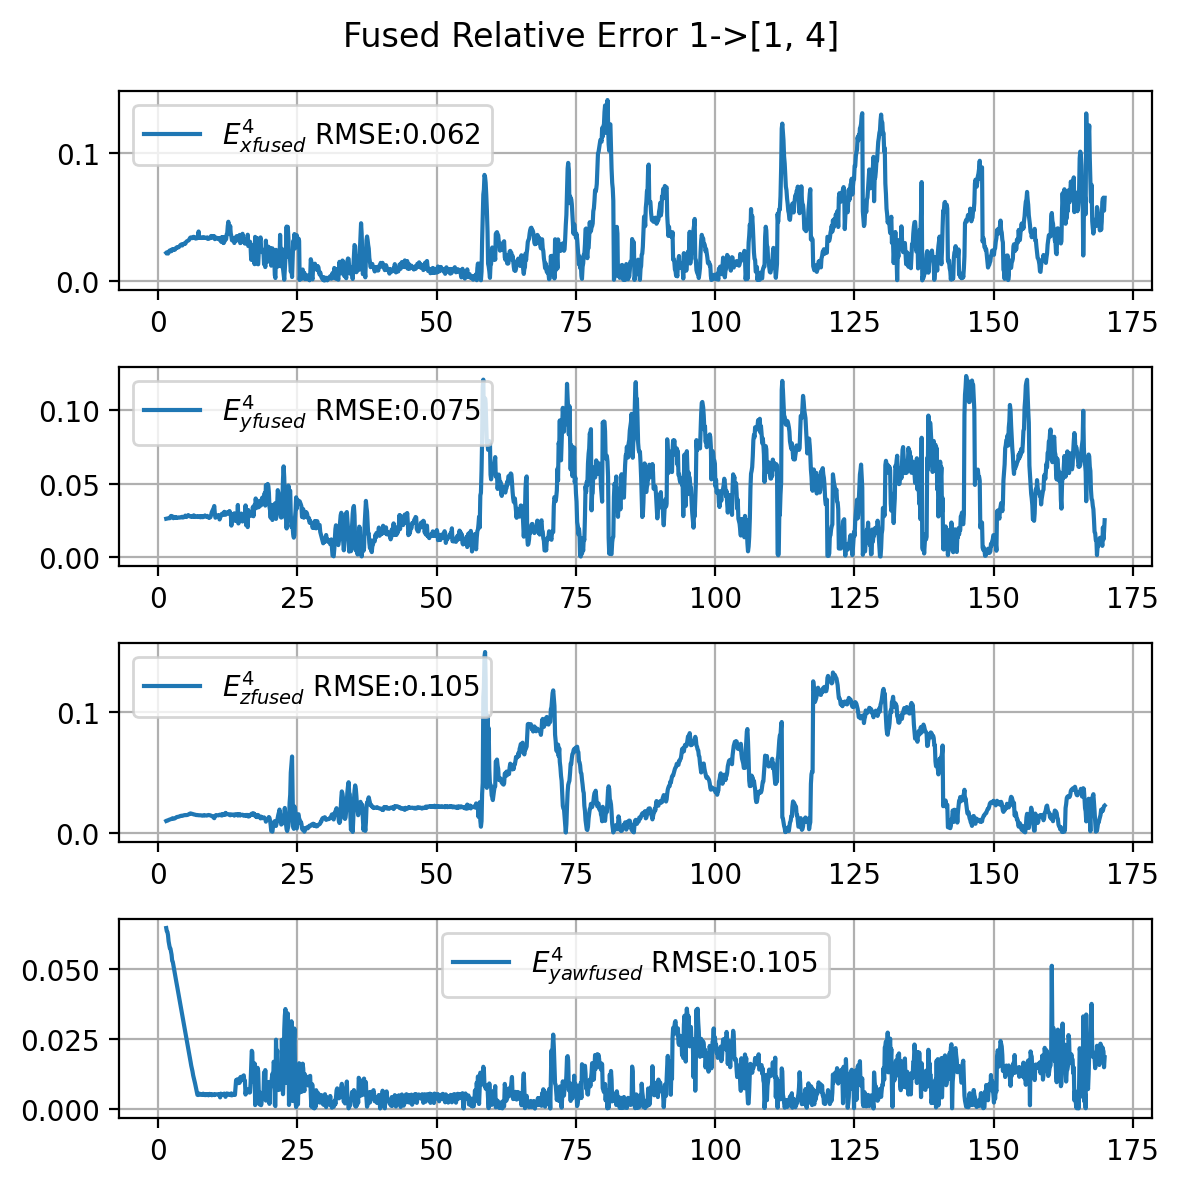

(0.04078374712058129,
 0.006843059520902283,
 0.07145092405961523,
 0.005373274472376162)

In [32]:
plt.close("all")
plot_relative_pose_err(poses, poses_fused, poses_vo, 1, nodes, outlier_thres=100, dte=1000000, groundtruth = True, show=True, figsize=(6, 6), verbose=True)